In [1]:
#--0.0---------------------  SETTINGS -----------------------------------------
"""
Data Settings & Importing Libraries
"""

import pandas as pd
import numpy as np
import pylab as pl
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
import sys
import os
#!conda install --yes --prefix {sys.prefix} plotly
#import plotly.graph_objects as go
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
#import plotly.io as pio
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D



%matplotlib inline 

pd.set_option('display.float_format', lambda x: '%.2f' % x)

plt.rcParams["figure.figsize"] = [30, 10]
plt.style.use('Solarize_Light2')

In [2]:
df_geo = pd.read_csv('./Data/geography.csv')
df_ram = pd.read_csv('./Data/ram.csv')
df_sales_ram = pd.read_csv('./Data/sales_ram.csv')
df_time = pd.read_csv('./Data/time.csv')
df_vendor = pd.read_csv('./Data/vendor.csv')

In [3]:
# conversion of some attributes before the join operation
df_sales_ram['ram_code'] = df_sales_ram['ram_code'].astype(int)
df_sales_ram['vendor_code'] = df_sales_ram['vendor_code'].astype(int)
df_sales_ram['geo_code'] = df_sales_ram['geo_code'].astype(int)
df_sales_ram['Id'] = df_sales_ram['Id'].astype(object)
# Some renaming
df_vendor = df_vendor.rename(columns={"name": "vendor"})
df_ram = df_ram.rename(columns={"name": "ram_model"})
df_ram = df_ram.rename(columns={"memory": "memory_dim"})
df_sales_ram = df_sales_ram.rename(columns={"Id": "id_ram"})
df_sales_ram = df_sales_ram.rename(columns={"sales_uds": "sales_usd"})

# Some dropping  
df_vendor = df_vendor.drop(columns=['Unnamed: 0'])
df_time = df_time.drop(columns=['Unnamed: 0'])
df_geo = df_geo.drop(columns=['Unnamed: 0'])
df_sales_ram = df_sales_ram.drop(columns=['Unnamed: 0'])
# Join operations
df_join = df_sales_ram.join(df_ram.set_index('ram_code'), on='ram_code')
df_join = df_join.join(df_vendor.set_index('vendor_code'), on='vendor_code')
df_join = df_join.join(df_geo.set_index('geo_code'), on='geo_code')
df_join = df_join.join(df_time.set_index('time_code'), on='time_code')


# Post operations
df_join['time_code'] = pd.to_datetime(df_join['time_code'], format='%Y%m%d')
#-----Reduction of attributes, Some removal
#df_join.drop(['geo_code', 'ram_code', 'month', 'year', 'day', 'vendor_code'], inplace=True, axis=1)
df_join.drop(['geo_code', 'ram_code', 'day', 'year','vendor_code'], inplace=True, axis=1)

In [4]:
df_join.head(10)

id_ram  time_code  sales_usd  sales_currency  brand ram_model  memory_dim  \
0   3719 2013-03-22      13.75           10.65  ADATA     Adata        0.50   
1   3719 2013-03-23      13.83           10.65  ADATA     Adata        0.50   
2   3719 2013-03-26      13.69           10.65  ADATA     Adata        0.50   
3   3719 2013-03-27      13.69           10.65  ADATA     Adata        0.50   
4   3719 2013-03-28      13.61           10.65  ADATA     Adata        0.50   
5   3719 2013-03-29      13.65           10.65  ADATA     Adata        0.50   
6   3719 2013-03-30      13.65           10.65  ADATA     Adata        0.50   
7   3719 2013-03-31      13.66           10.65  ADATA     Adata        0.50   
8   3719 2013-04-01      13.66           10.65  ADATA     Adata        0.50   
9   3719 2013-04-02      13.69           10.65  ADATA     Adata        0.50   

  memory_type  clock            vendor continent  country  \
0         DDR    400  geizhals_unknown    Europe  Germany   
1         DDR    400  geizhals_unknown    Europe  Germany   
2         DDR    400  geizhals_unknown    Europe  Germany   
3         DDR    400  geizhals_unknown    Europe  Germany   
4         DDR    400  geizhals_unknown    Europe  Germany   
5         DDR    400  geizhals_unknown    Europe  Germany   
6         DDR    400  geizhals_unknown    Europe  Germany   
7         DDR    400  geizhals_unknown    Europe  Germany   
8         DDR    400  geizhals_unknown    Europe  Germany   
9         DDR    400  geizhals_unknown    Europe  Germany   

                   region currency  month  week  
0  north rhine-westphalla      EUR      3    12  
1                  berlin      EUR      3    12  
2                  saxony      EUR      3    13  
3  north rhine-westphalla      EUR      3    13  
4                saarland      EUR      3    13  
5                  hessen      EUR      3    13  
6                  bremen      EUR      3    13  
7  mecklenburg-vorpommern      EUR      3    13  
8                 bavaria      EUR      4    14  
9           saxony-anhalt      EUR      4    14

Text(0, 0.5, 'Rams bought')

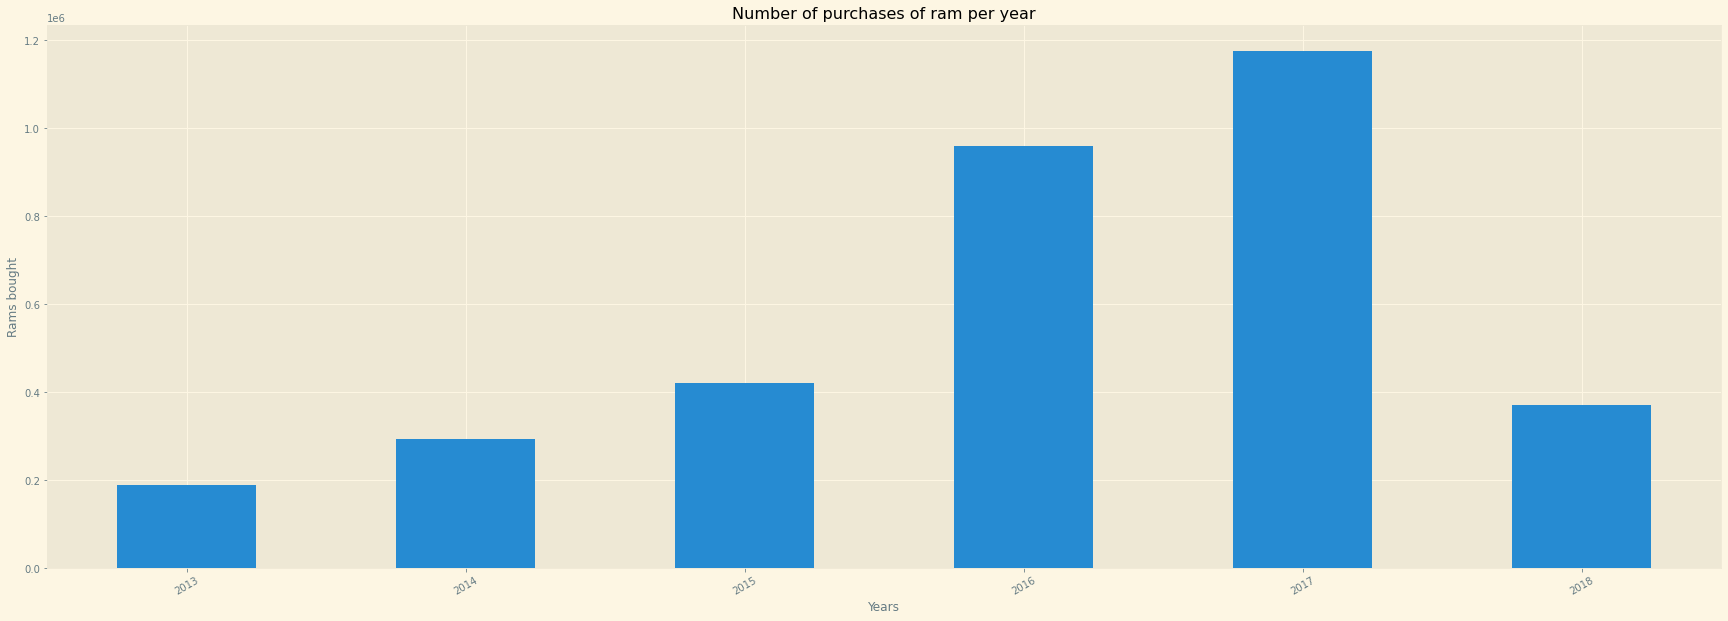

In [5]:
#----------bar charts

df_join.groupby(df_join.time_code.dt.year)['id_ram'].count().plot(kind="bar", title="test")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Number of purchases of ram per year")
plt.xlabel("Years")
plt.ylabel("Rams bought")

In [6]:
df_join['time_code'].min()

Timestamp('2013-03-22 00:00:00')

In [7]:
df_join['time_code'].max()

Timestamp('2018-04-12 00:00:00')

Nel 2013 la partenza dei dati è a Marzo e copre 8 mesi mentre nel 2018 i dati finiscono ad aprile e la colonna copre solo i primi 4 mesi circa


Text(0, 0.5, 'Rams bought')

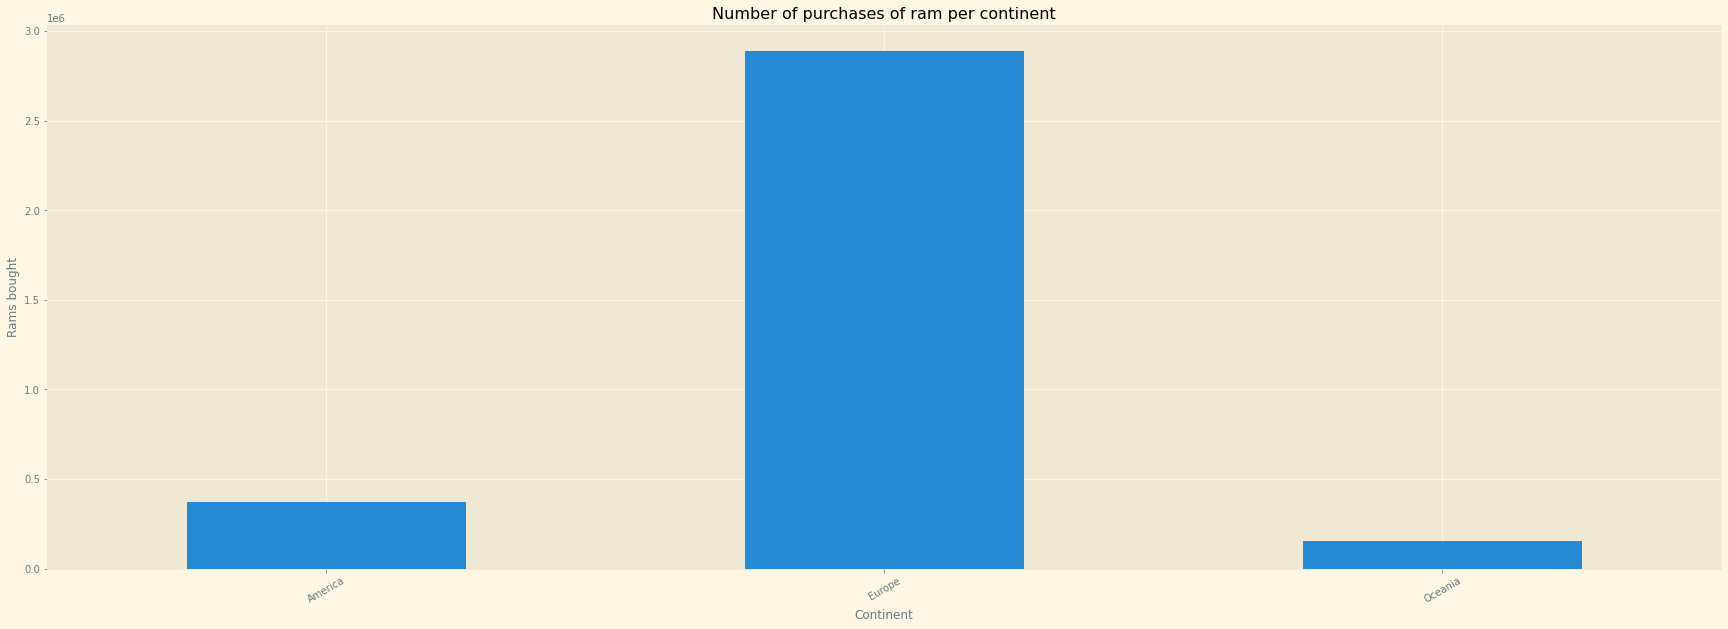

In [8]:
df_join.groupby('continent')['id_ram'].count().plot(kind="bar", title="test")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Number of purchases of ram per continent")
plt.xlabel("Continent")
plt.ylabel("Rams bought")

Text(0.5, 0, 'Rams bought')

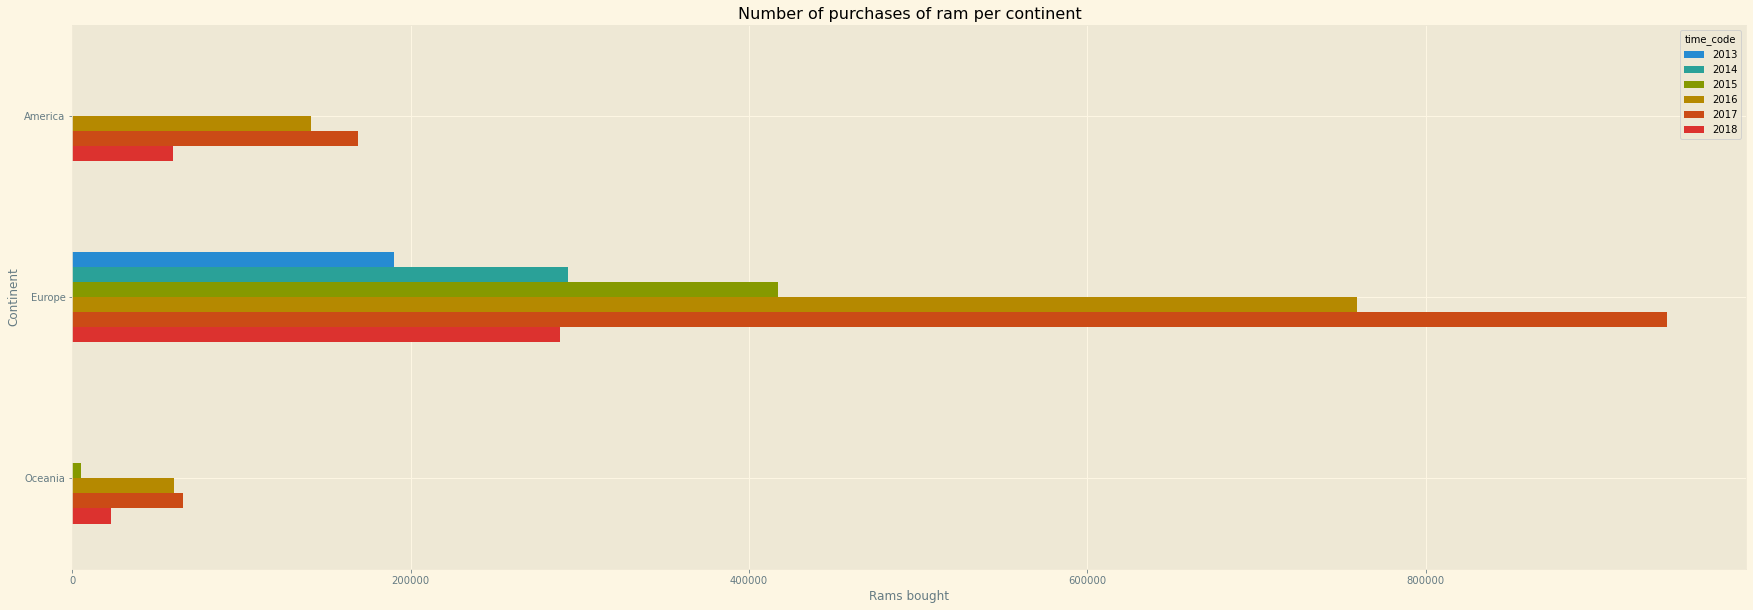

In [9]:
df_join.groupby(df_join.time_code.dt.year).continent.value_counts().unstack(0).plot.barh()

plt.gca().invert_yaxis()
plt.title("Number of purchases of ram per continent")
plt.ylabel("Continent")
plt.xlabel("Rams bought")

Text(0.5, 0, 'Rams bought')

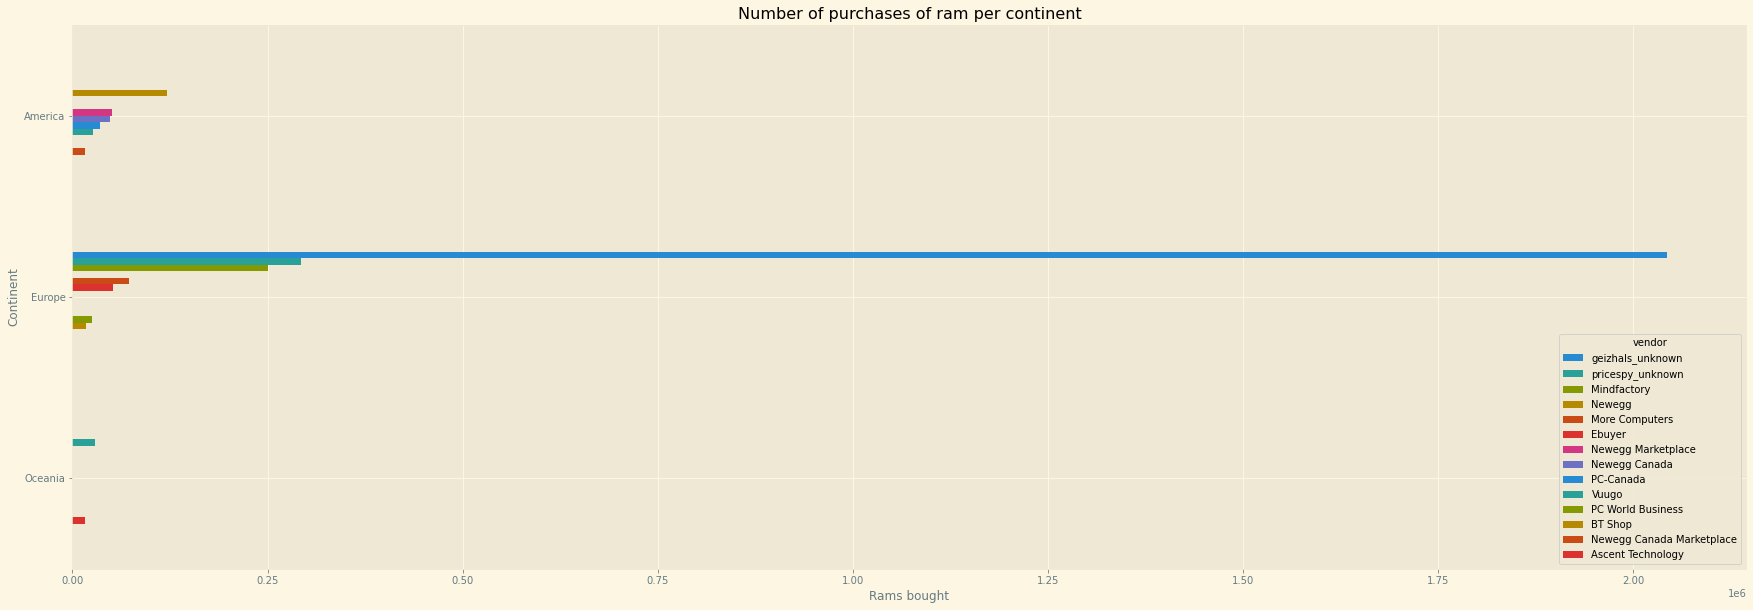

In [10]:
tmp=df_join.groupby('vendor').continent.value_counts().sort_values(ascending=False)
tmp=tmp.head(15).unstack(0).plot.barh()
# plt.style.use('ggplot')
plt.gca().invert_yaxis()
plt.title("Number of purchases of ram per continent")
plt.ylabel("Continent")
plt.xlabel("Rams bought")

In [11]:
#df_join.groupby([df_join.time_code.dt.year,'month'])['id_ram'].count()

In [12]:
s_temp = df_join.groupby('vendor')['time_code'].count()
s_temp

vendor
1stWave Technologies        778
ARLT                       1072
AWD-IT                       97
AX86 Gaming Systems         133
Adorama                    3950
                         ...   
Vuugo                     30864
YoYoTech                     34
geizhals_unknown        2043095
pricespy_unknown         321753
shopRBC                   13628
Name: time_code, Length: 78, dtype: int64

In [13]:
tmp=df_join.groupby('brand')['time_code'].count().sort_values(ascending=False)
tmp.head(10)


brand
G.SKILL       833668
KINGSTON      798365
CORSAIR       565002
CRUCIAL       453464
MUSHKIN       161020
ADATA         156734
GEIL           77954
GOODRAM        44748
PATRIOT        42504
TEAM GROUP     32597
Name: time_code, dtype: int64

Text(0.5, 0, 'Rams sold')

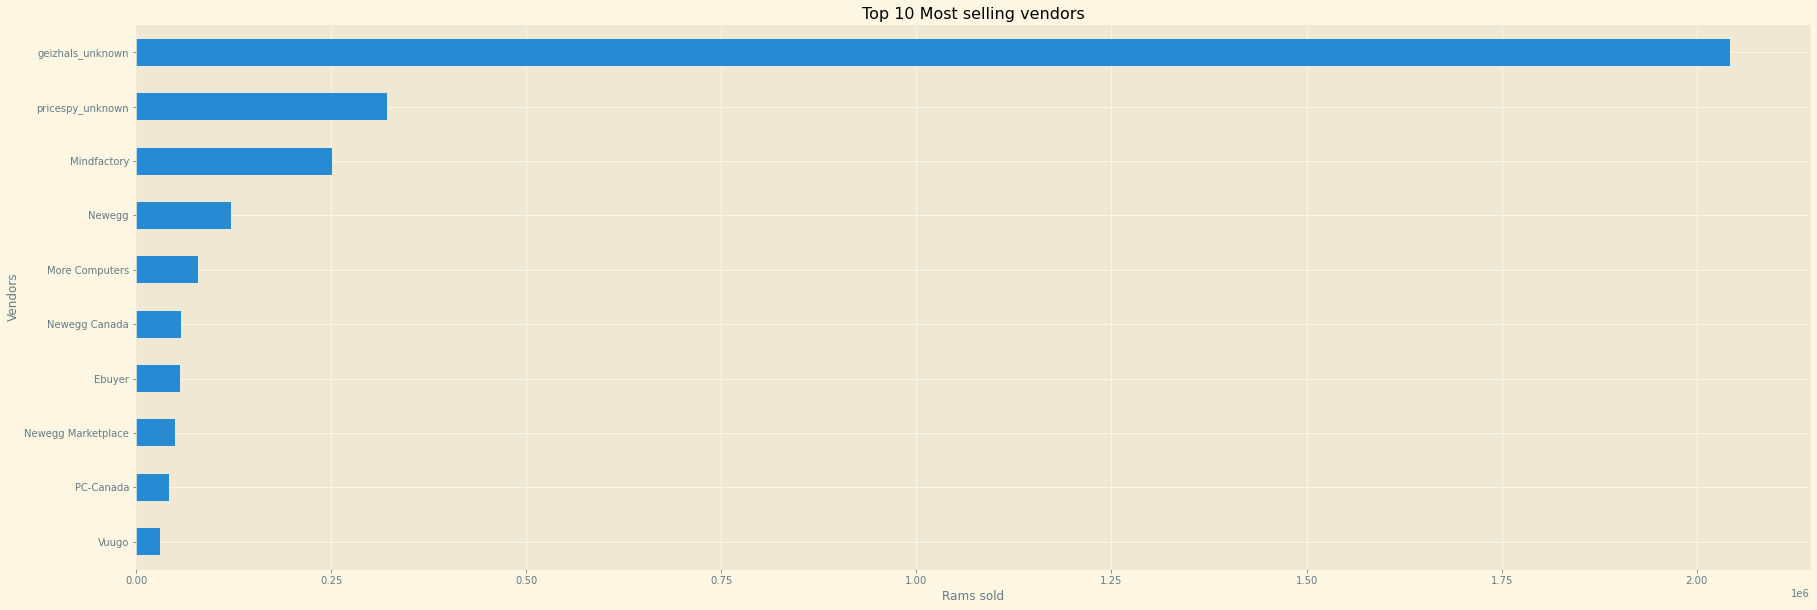

In [14]:
tmp=df_join.groupby('vendor')['id_ram'].count().sort_values(ascending=False)
tmp=tmp.head(10)
tmp.plot.barh()

plt.gca().invert_yaxis()
plt.title("Top 10 Most selling vendors")
plt.ylabel("Vendors")
plt.xlabel("Rams sold")

Text(0.5, 0, 'Rams sold')

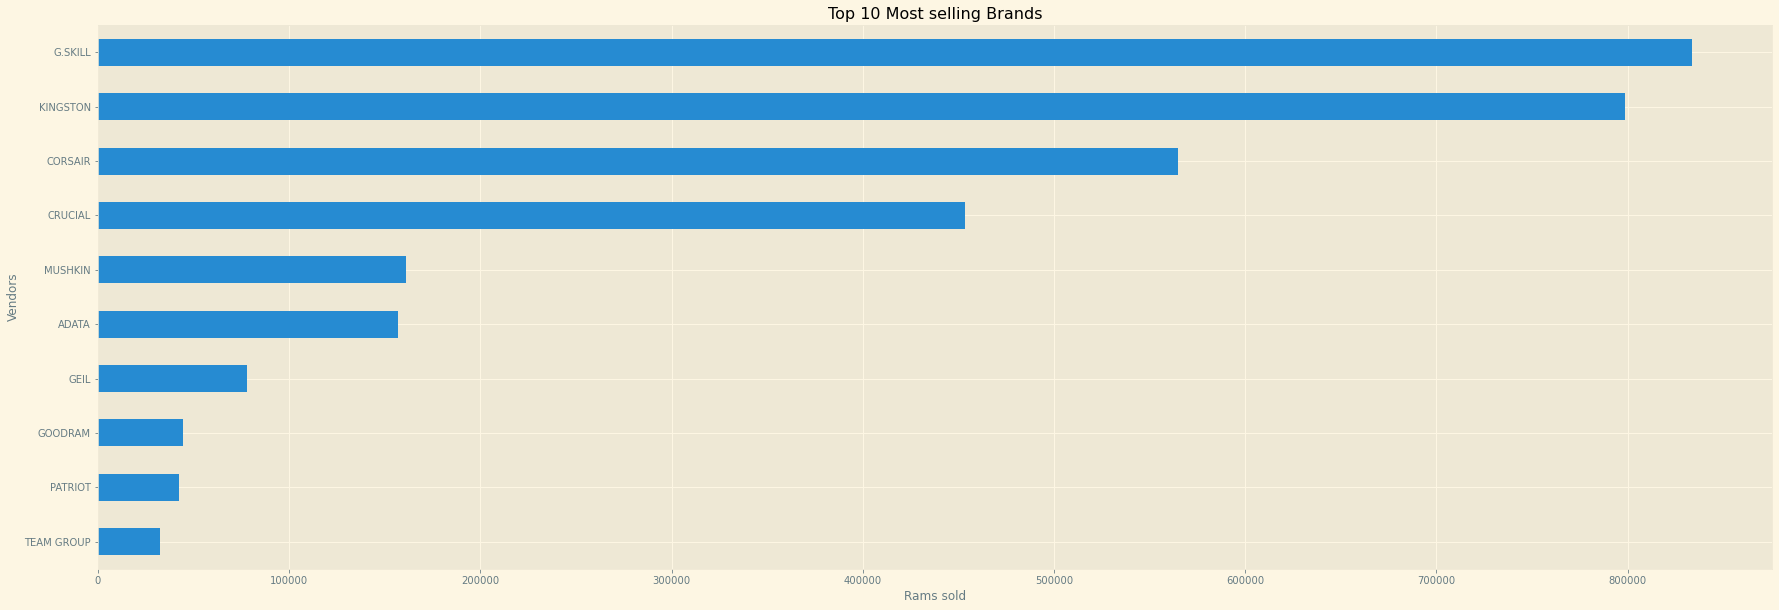

In [15]:
tmp=df_join.groupby('brand')['time_code'].count().sort_values(ascending=False)
tmp=tmp.head(10)
tmp.plot.barh()
plt.gca().invert_yaxis()
plt.title("Top 10 Most selling Brands")
plt.ylabel("Vendors")
plt.xlabel("Rams sold")

Text(0.5, 0, 'Rams sold')

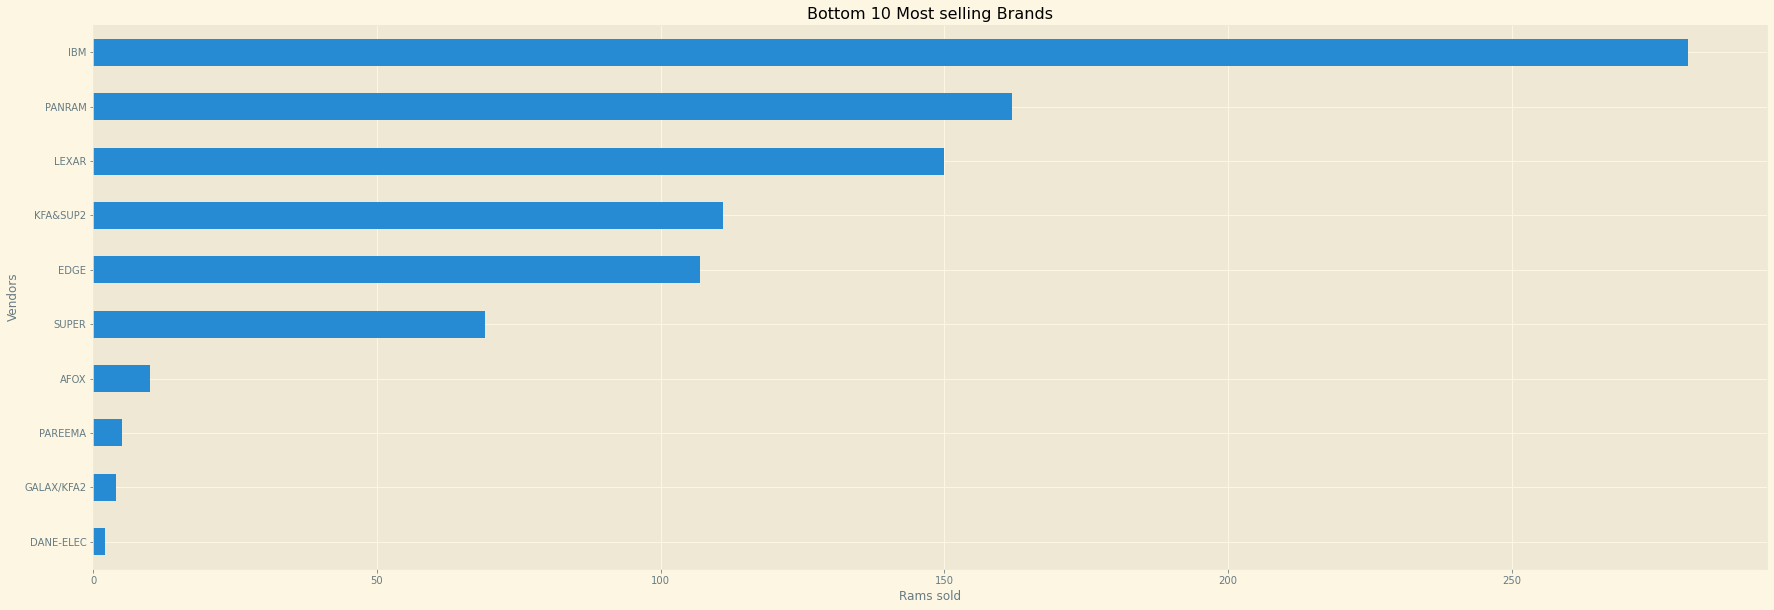

In [16]:
tmp=df_join.groupby('brand')['time_code'].count().sort_values(ascending=False)
tmp=tmp.tail(10)
tmp.plot.barh()
plt.gca().invert_yaxis()
plt.title("Bottom 10 Most selling Brands")
plt.ylabel("Vendors")
plt.xlabel("Rams sold")

Text(0.5, 0, 'Rams sold')

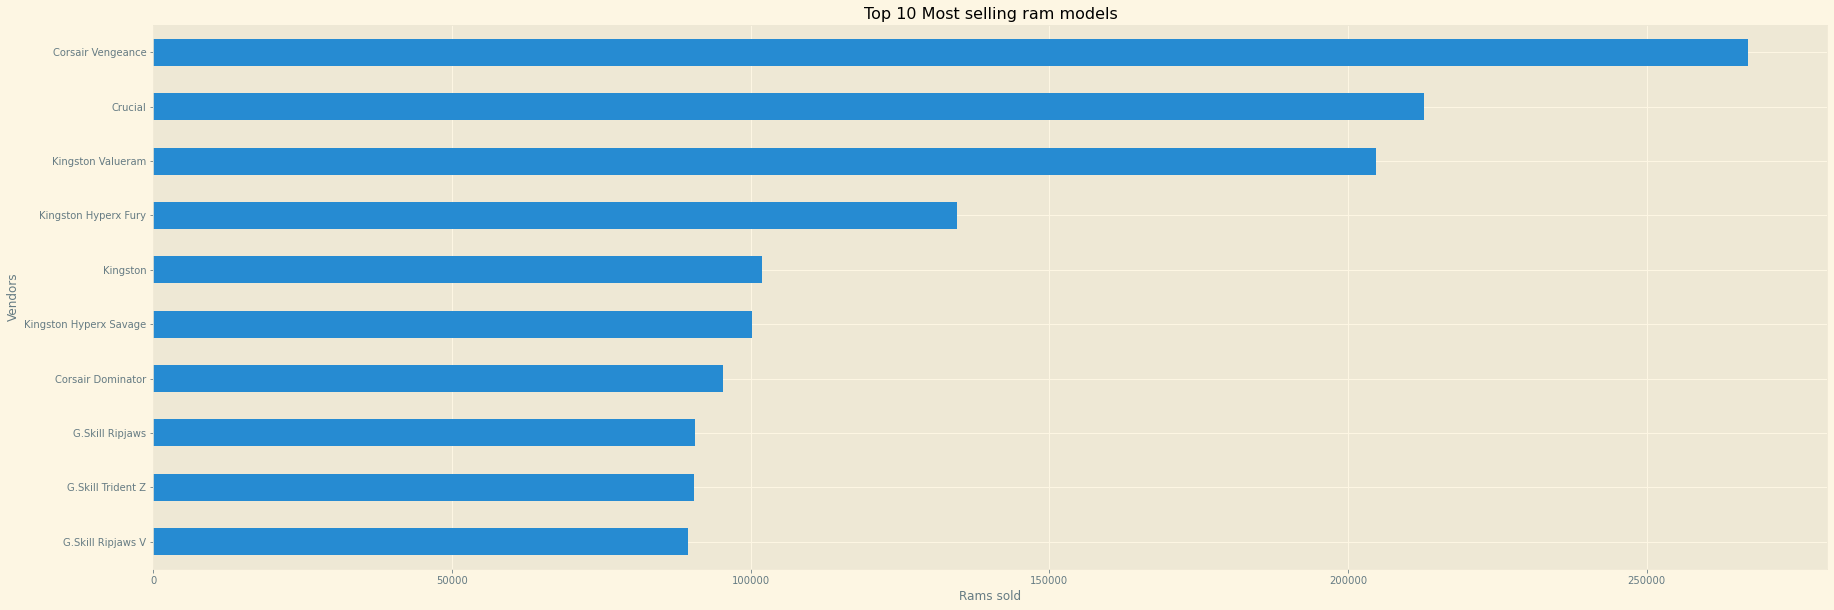

In [17]:
tmp=df_join.groupby('ram_model')['time_code'].count().sort_values(ascending=False)
tmp=tmp.head(10)
tmp.plot.barh()
plt.gca().invert_yaxis()
plt.title("Top 10 Most selling ram models")
plt.ylabel("Vendors")
plt.xlabel("Rams sold")

Text(0.5, 0, 'Rams sold')

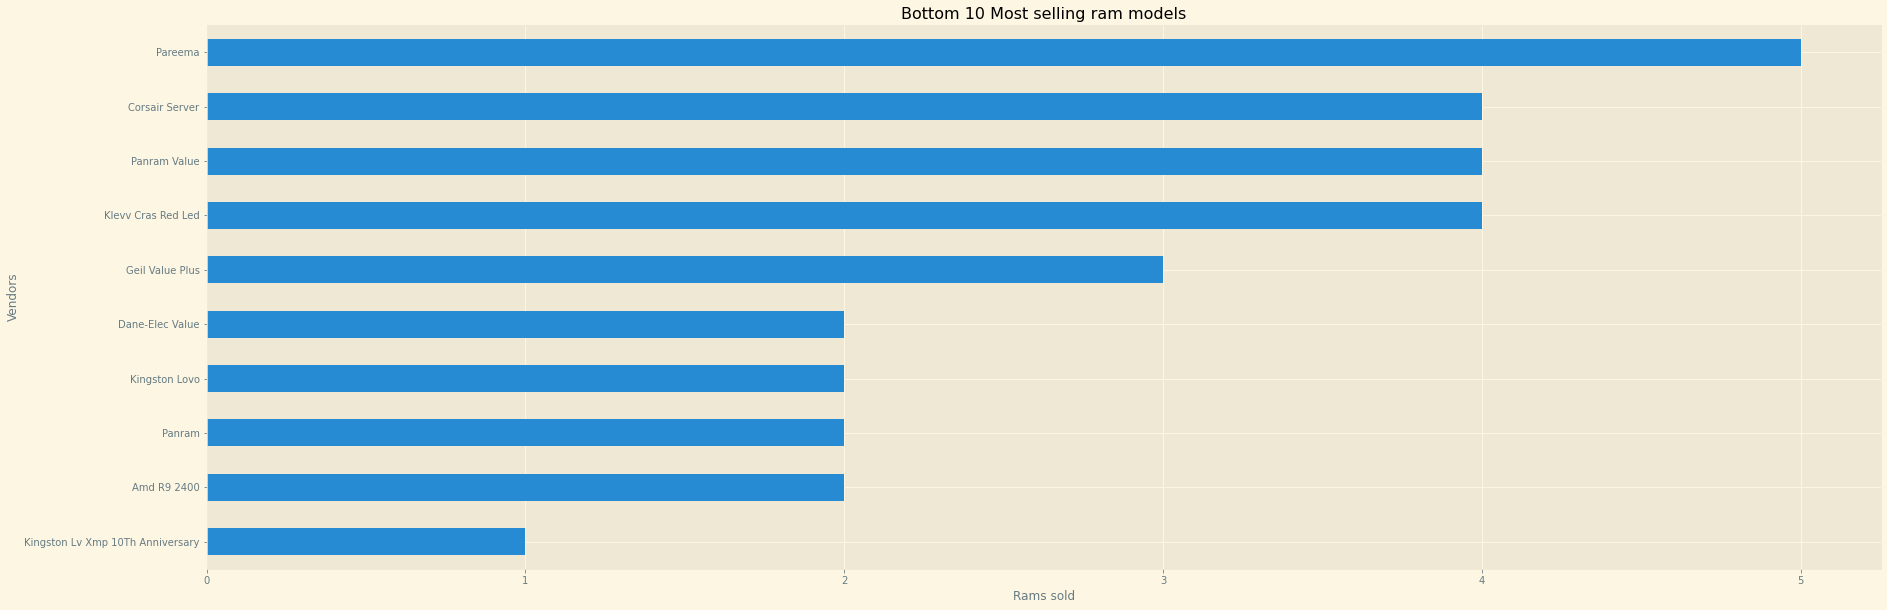

In [18]:
tmp=df_join.groupby('ram_model')['time_code'].count().sort_values(ascending=False)
tmp=tmp.tail(10)
tmp.plot.barh()
plt.gca().invert_yaxis()
plt.title("Bottom 10 Most selling ram models")
plt.ylabel("Vendors")
plt.xlabel("Rams sold")

Text(0.5, 0, 'Rams sold')

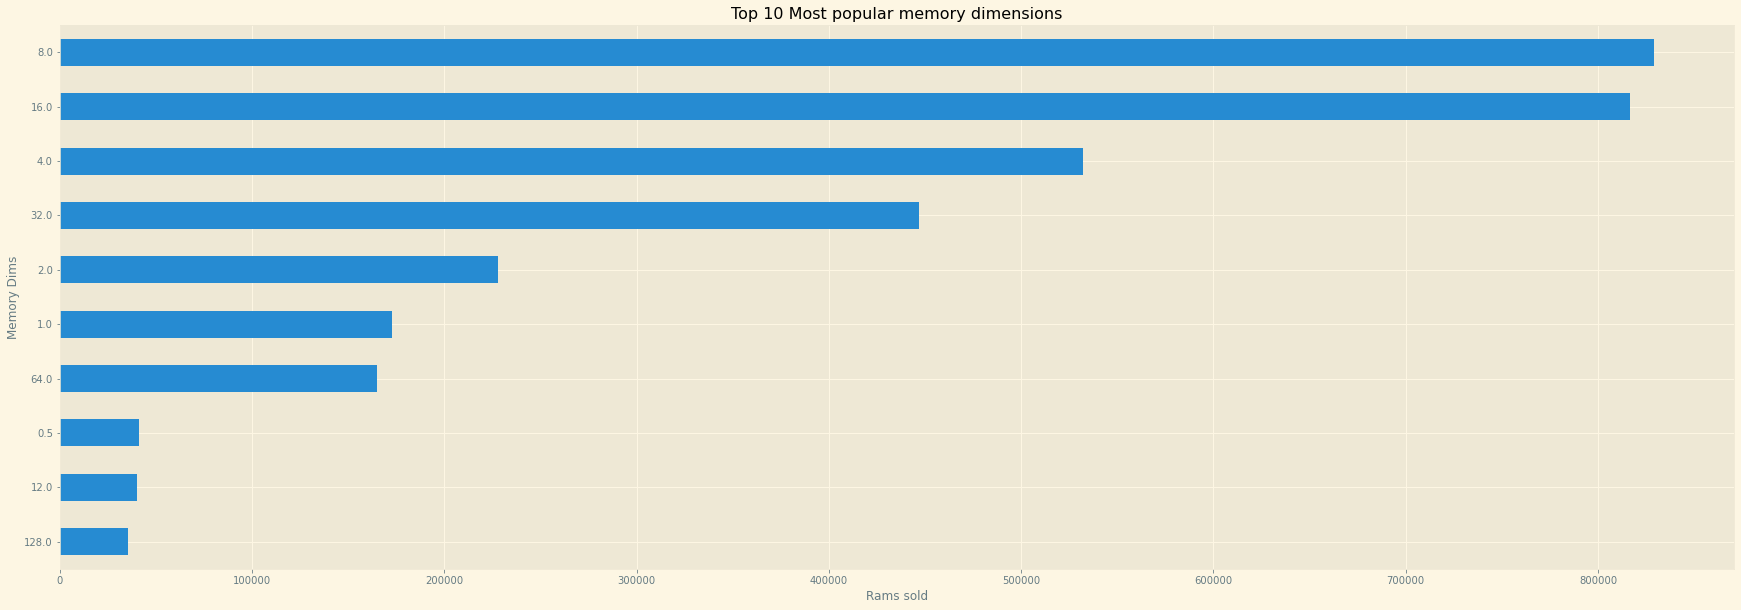

In [19]:
tmp=df_join.groupby('memory_dim')['time_code'].count().sort_values(ascending=False)
tmp=tmp.head(10)
tmp.plot.barh()
plt.gca().invert_yaxis()
plt.title("Top 10 Most popular memory dimensions")
plt.ylabel("Memory Dims")
plt.xlabel("Rams sold")

Text(0.5, 0, 'Rams sold')

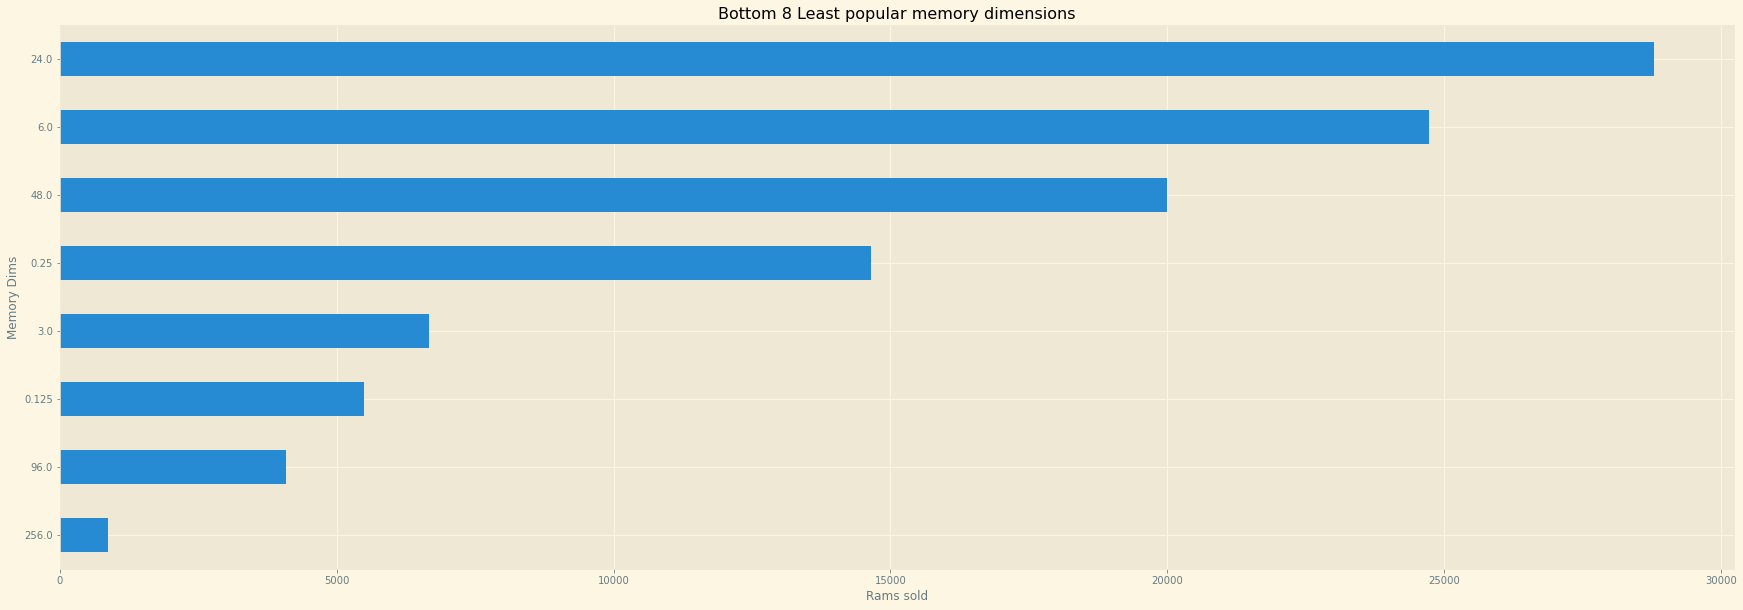

In [20]:
tmp=df_join.groupby('memory_dim')['time_code'].count().sort_values(ascending=False)
tmp=tmp.tail(8)
tmp.plot.barh()
plt.gca().invert_yaxis()
plt.title("Bottom 8 Least popular memory dimensions")
plt.ylabel("Memory Dims")
plt.xlabel("Rams sold")

Text(0.5, 0, 'Rams sold')

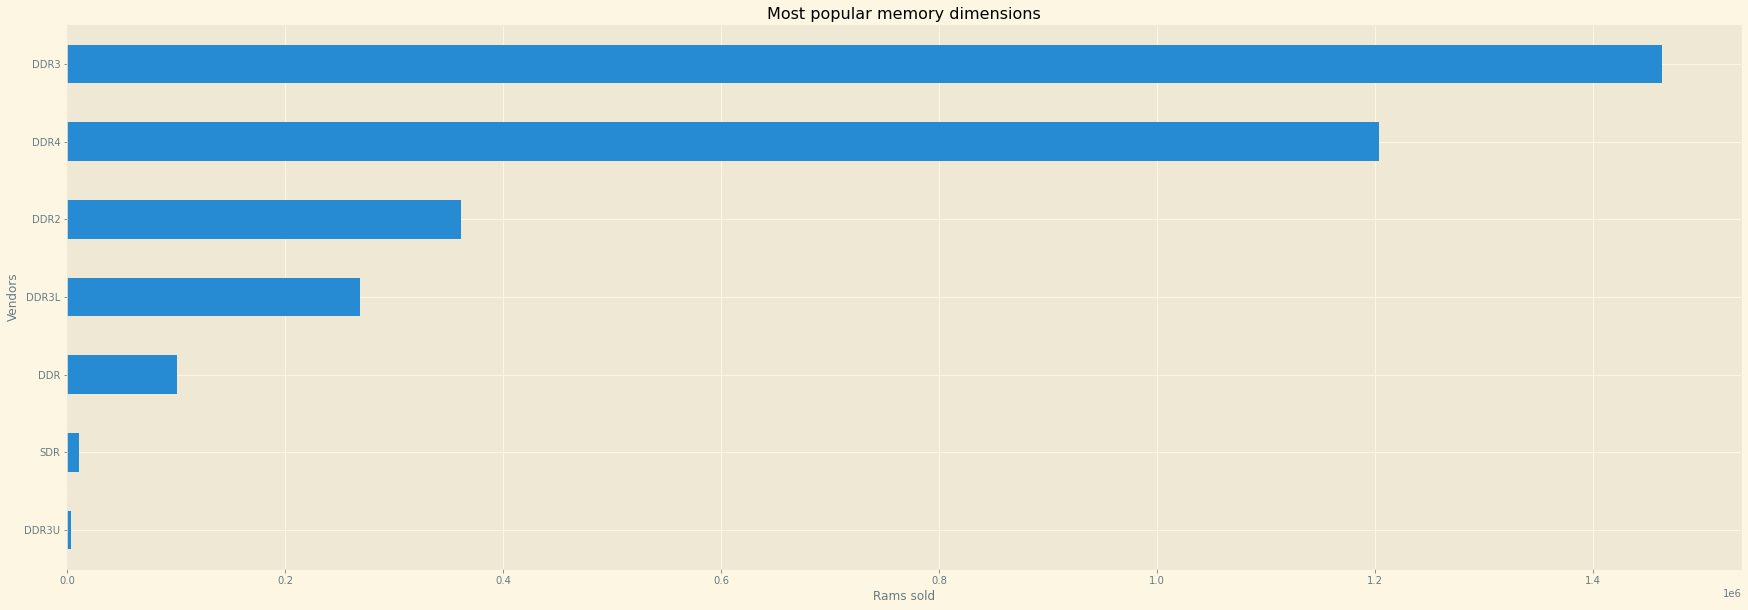

In [21]:
tmp=df_join.groupby('memory_type')['time_code'].count().sort_values(ascending=False)
#tmp=tmp.head(10)
tmp.plot.barh()
plt.gca().invert_yaxis()
plt.title("Most popular memory dimensions")
plt.ylabel("Vendors")
plt.xlabel("Rams sold")

Text(0.5, 0, 'Rams sold')

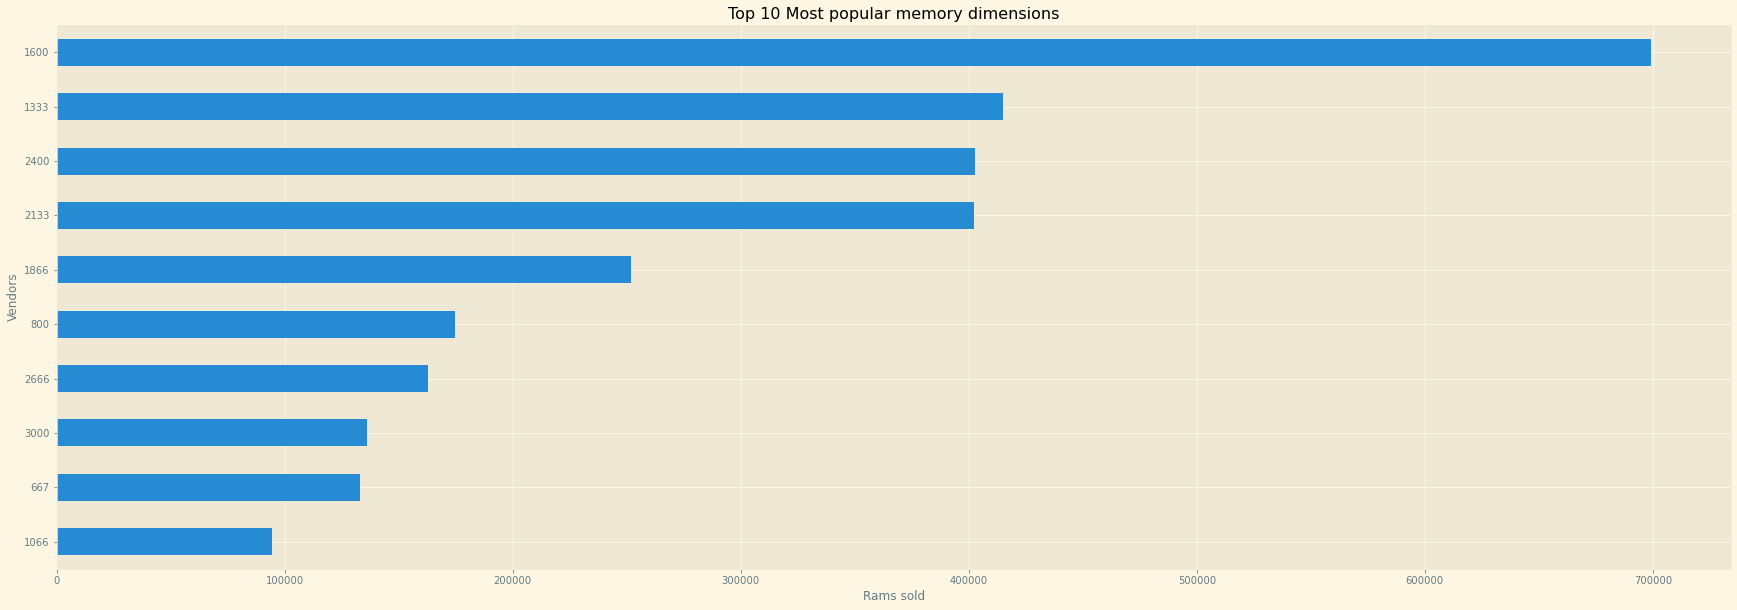

In [22]:
tmp=df_join.groupby('clock')['time_code'].count().sort_values(ascending=False)
tmp=tmp.head(10)
tmp.plot.barh()
plt.gca().invert_yaxis()
plt.title("Top 10 Most popular memory dimensions")
plt.ylabel("Vendors")
plt.xlabel("Rams sold")

<Figure size 1800x360 with 0 Axes>

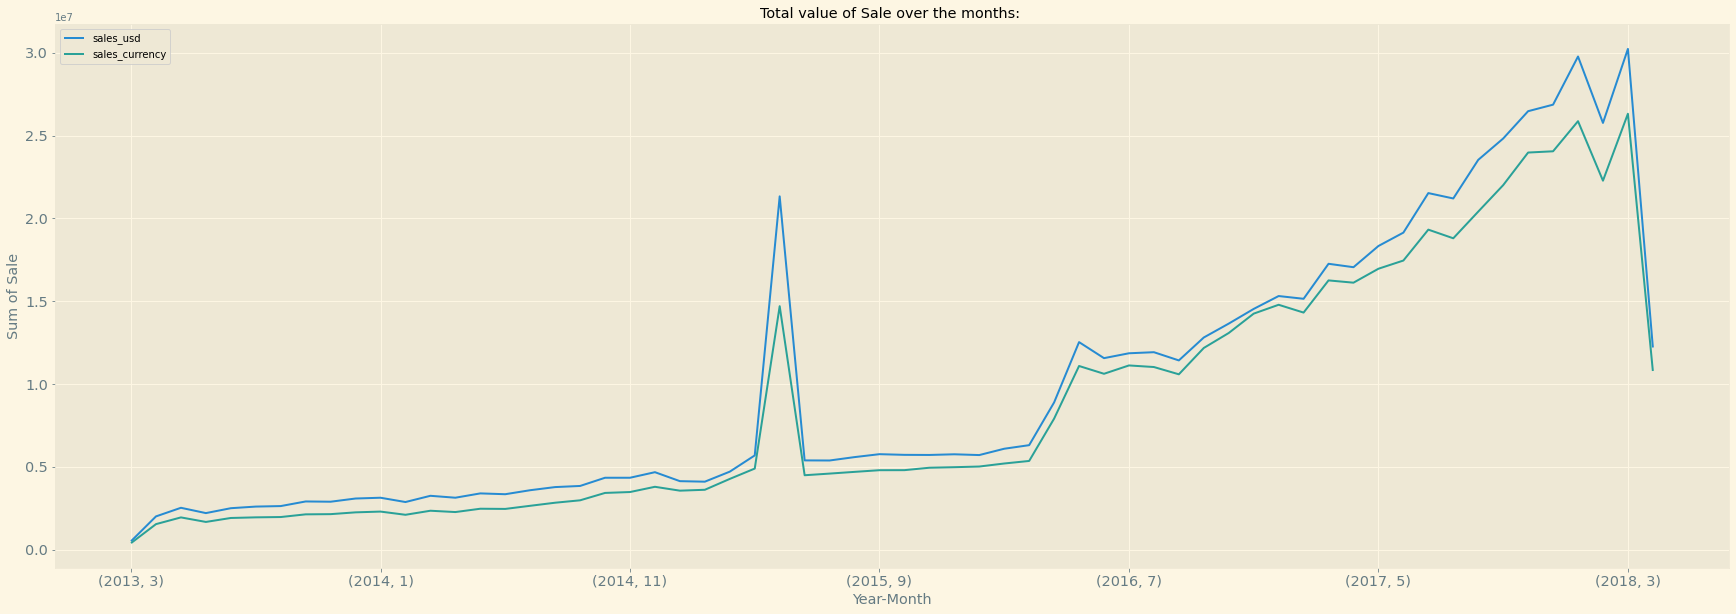

In [23]:
# Set up a grid of plots:
fig = plt.figure(figsize=(25, 5))
#fig_dims = (2, 1)
fig.subplots_adjust(hspace=0.7)

# # Plot mean sales 
# plt.subplot2grid(fig_dims, (0, 0))
# monthly_sales_mean = df_join.groupby([df_join.year, df_join.month]).mean().plot()
# plt.title('Mean value of Sale over the months: ', fontsize='x-large')
# plt.xlabel('Year-Month', fontsize='x-large')
# plt.ylabel('Mean Sale', fontsize='x-large')
# plt.tick_params(labelsize='x-large')

# Plot total sales
#plt.subplot2grid(fig_dims, (1, 0))
monthly_sales_total = df_join[['sales_usd','sales_currency']].groupby([df_join.time_code.dt.year,df_join.month]).sum().plot()
plt.title('Total value of Sale over the months: ', fontsize='x-large')
plt.xlabel('Year-Month', fontsize='x-large')
plt.ylabel('Sum of Sale', fontsize='x-large')
plt.tick_params(labelsize='x-large')

plt.show()

[1600, 1333, 2400, 2133, 1866]


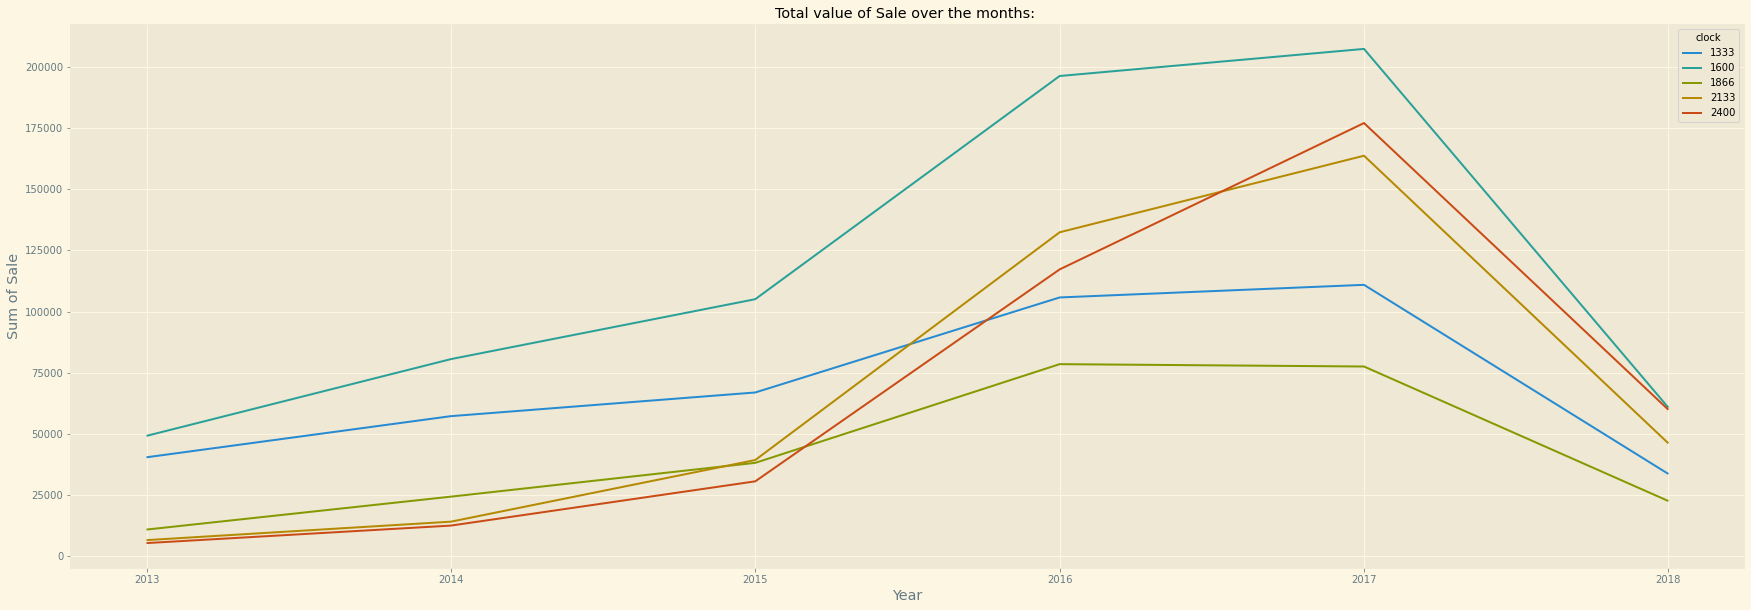

In [24]:
legend=[]
focus='clock'
tmp1=df_join.groupby(focus).clock.count()
tmp1=tmp1.sort_values(ascending=False)
test=tmp1.index.values.tolist()
print(test[0:5])

toshow=df_join[(df_join[focus]==test[0])|(df_join[focus]==test[1])|(df_join[focus]==test[2])|(df_join[focus]==test[3])|(df_join[focus]==test[4])]
tmp=toshow.groupby([toshow.time_code.dt.year,toshow[focus]])[focus].count().sort_values(ascending=False).head(100)
# print(tmp.head())
monthly_sales_total = tmp.unstack().plot()
   
    
plt.title('Total value of Sale over the months: ', fontsize='x-large')
plt.xlabel('Year', fontsize='x-large')
plt.ylabel('Sum of Sale', fontsize='x-large')

#plt.legend(legend)
plt.show()

['G.SKILL', 'KINGSTON', 'CORSAIR', 'CRUCIAL', 'MUSHKIN']


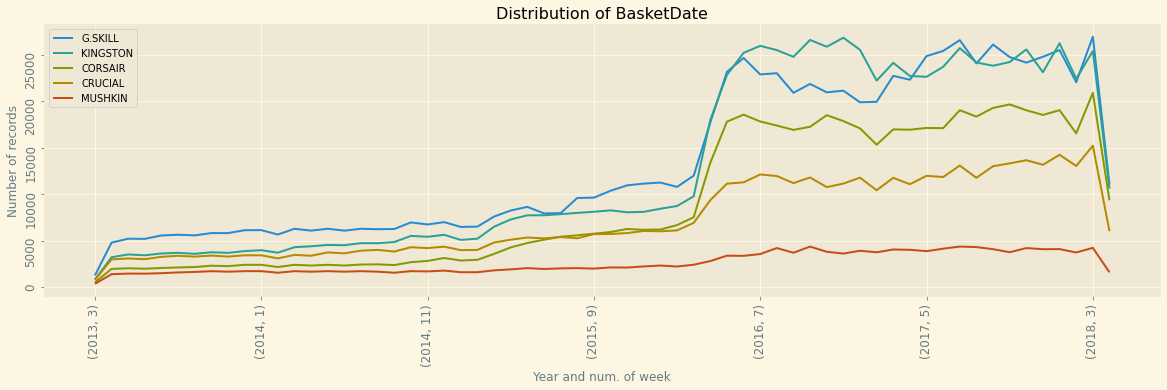

In [25]:
legend=[]
focus='brand'
max_val=5
plt.figure(figsize=(20, 5))
tmp1=df_join.groupby(focus)[focus].count()
tmp1=tmp1.sort_values(ascending=False)
test=tmp1.index.values.tolist()
print(test[0:max_val])

for x in test[0:max_val]:
    tmp=df_join[df_join[focus]==x]
    tmp[focus].groupby([df_join.time_code.dt.year, df_join.month]).agg('count').plot()

plt.title("Distribution of BasketDate")
plt.xlabel("Year and num. of week")
plt.ylabel("Number of records")
plt.tick_params(labelrotation=90, labelsize='large')
plt.legend(test[0:max_val])
plt.show()

['G.SKILL', 'KINGSTON', 'CORSAIR', 'CRUCIAL', 'MUSHKIN']


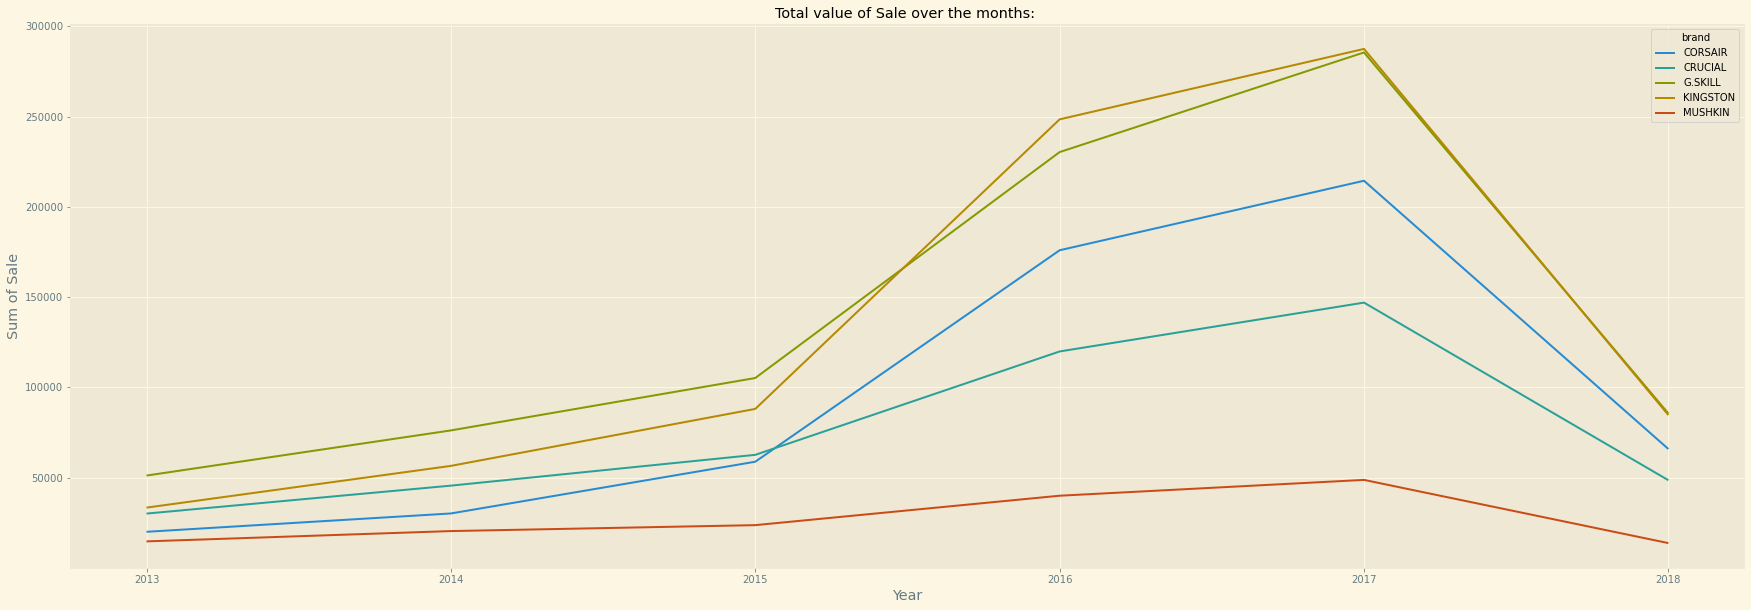

In [26]:
legend=[]
focus='brand'
tmp1=df_join.groupby(focus)[focus].count()
tmp1=tmp1.sort_values(ascending=False)
test=tmp1.index.values.tolist()
print(test[0:5])

toshow=df_join[(df_join[focus]==test[0])|(df_join[focus]==test[1])|(df_join[focus]==test[2])|(df_join[focus]==test[3])|(df_join[focus]==test[4])]
tmp=toshow.groupby([toshow.time_code.dt.year,toshow[focus]])[focus].count().sort_values(ascending=False).head(100)
# print(tmp.head())
monthly_sales_total = tmp.unstack().plot()
   
    
plt.title('Total value of Sale over the months: ', fontsize='x-large')
plt.xlabel('Year', fontsize='x-large')
plt.ylabel('Sum of Sale', fontsize='x-large')

#plt.legend(legend)
plt.show()

In [27]:
# legend=[]
# years=df_join['year'].unique().tolist()
# print(years)
# plt.style.use('ggplot')
# focus='brand'
# tmp1=df_join.groupby(focus)[focus].count()
# tmp1=tmp1.sort_values(ascending=False)
# test=tmp1.index.values.tolist()
# for x in years:
#     tmp2=df_join[df_join['year']==x]


#     toshow=tmp2[(tmp2[focus]==test[0])|(tmp2[focus]==test[1])|(tmp2[focus]==test[2])|(tmp2[focus]==test[3])|(tmp2[focus]==test[4])]
#     tmp=toshow.groupby([toshow.month,toshow[focus]])[focus].count().sort_values(ascending=False).head(100)
#     # print(tmp.head())
#     monthly_sales_total = tmp.unstack().plot()


#     plt.title('Total value of Sale over the months of year '+str(x)+': ', fontsize='x-large')
#     plt.xlabel('Month', fontsize='x-large')
#     plt.ylabel('Sum of Sale', fontsize='x-large')

#     #plt.legend(legend)
#     plt.show()

[(2013, 3), (2013, 4), (2013, 5), (2013, 6), (2013, 7), (2013, 8), (2013, 9), (2013, 10), (2013, 11), (2013, 12), (2014, 1), (2014, 2), (2014, 3), (2014, 4), (2014, 5), (2014, 6), (2014, 7), (2014, 8), (2014, 9), (2014, 10), (2014, 11), (2014, 12), (2015, 1), (2015, 2), (2015, 3), (2015, 4), (2015, 5), (2015, 6), (2015, 7), (2015, 8), (2015, 9), (2015, 10), (2015, 11), (2015, 12), (2016, 1), (2016, 2), (2016, 3), (2016, 4), (2016, 5), (2016, 6), (2016, 7), (2016, 8), (2016, 9), (2016, 10), (2016, 11), (2016, 12), (2017, 1), (2017, 2), (2017, 3), (2017, 4), (2017, 5), (2017, 6), (2017, 7), (2017, 8), (2017, 9), (2017, 10), (2017, 11), (2017, 12), (2018, 1), (2018, 2), (2018, 3), (2018, 4)]
PLOTTING FOR: sales_usd


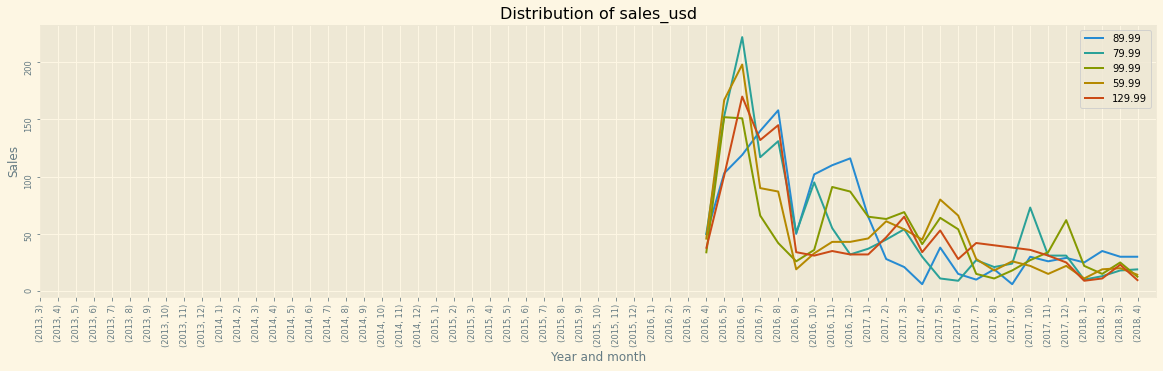

PLOTTING FOR: sales_currency


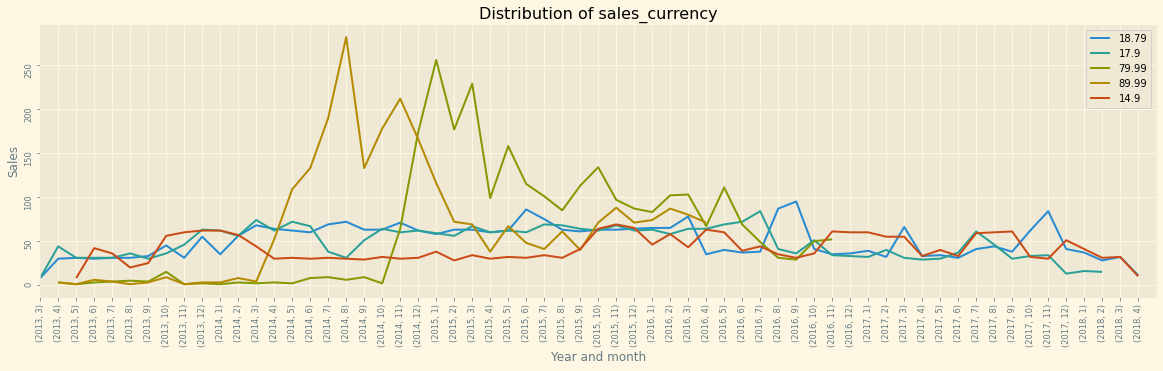

PLOTTING FOR: brand


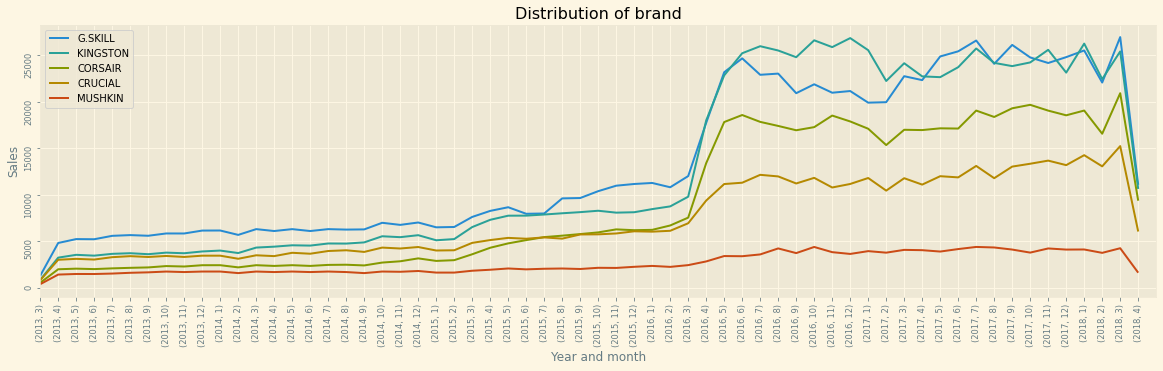

PLOTTING FOR: ram_model


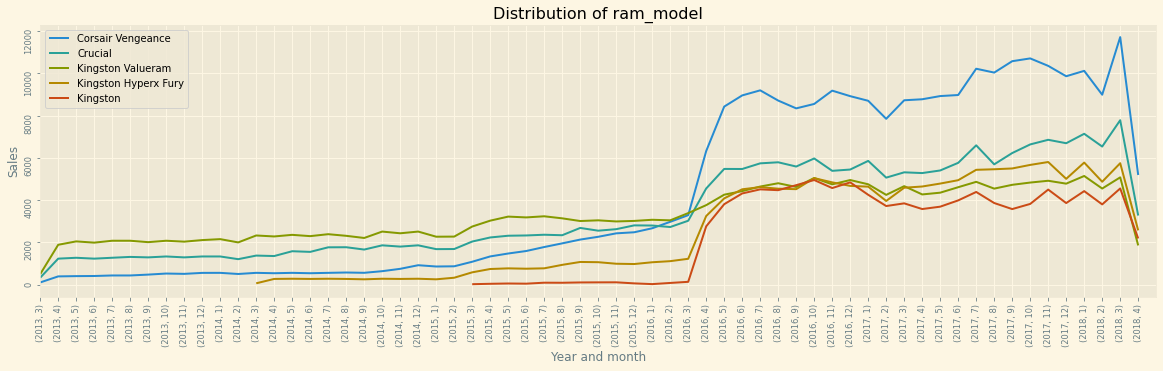

PLOTTING FOR: memory_dim


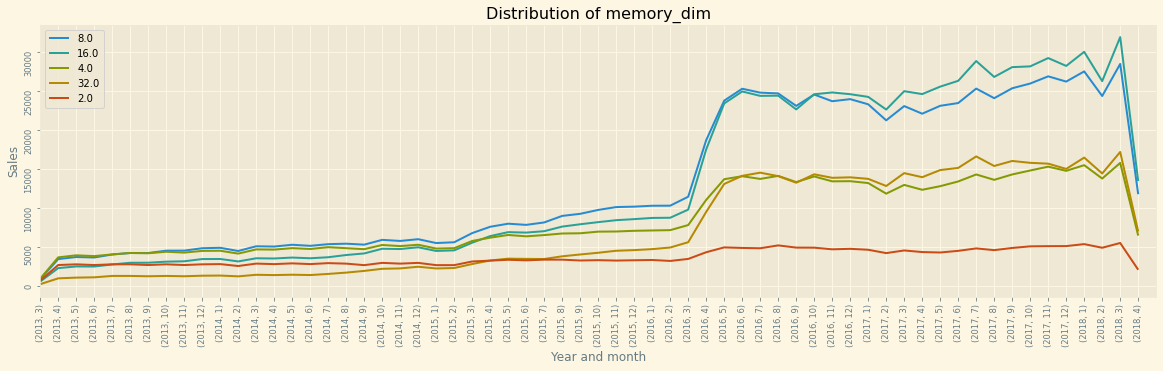

PLOTTING FOR: memory_type


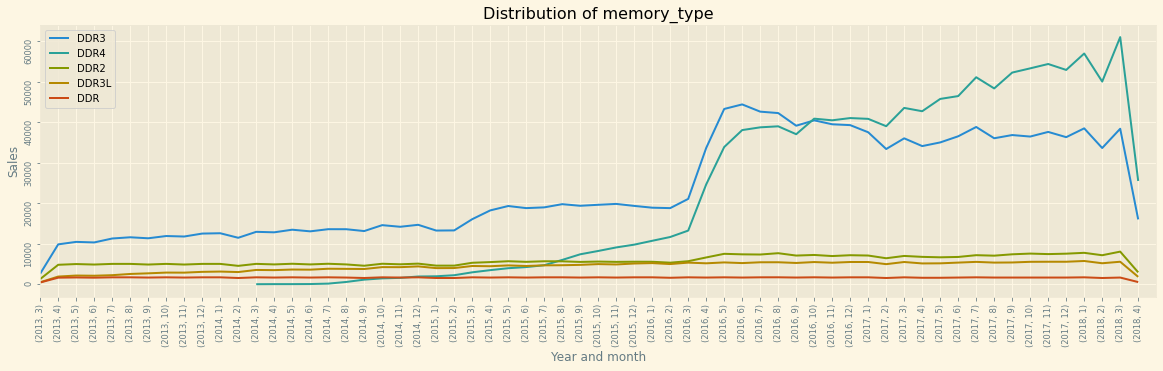

PLOTTING FOR: clock


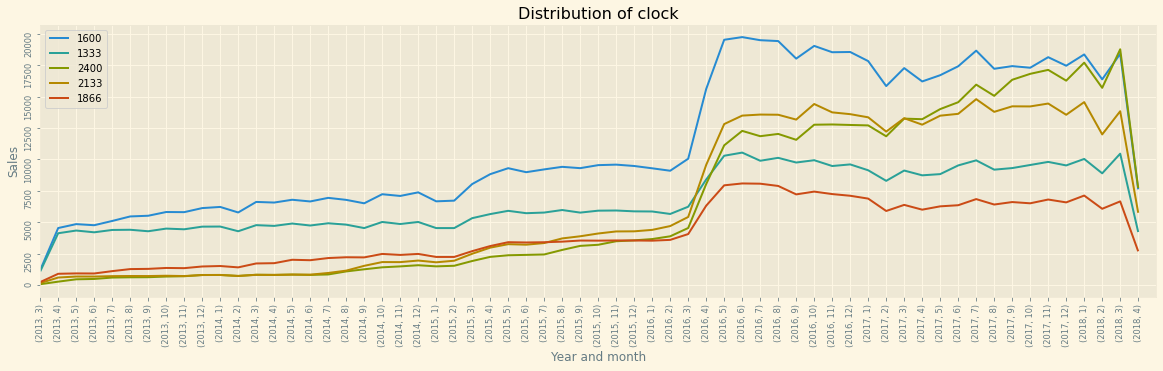

PLOTTING FOR: vendor


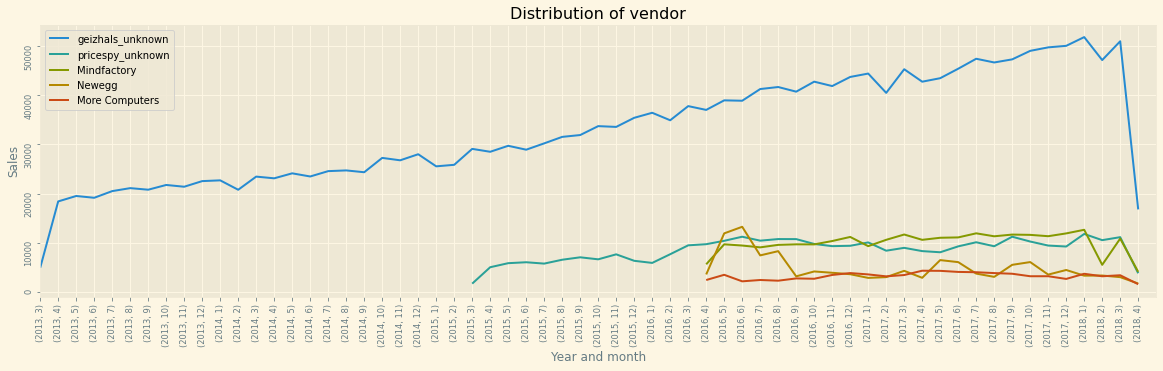

PLOTTING FOR: continent


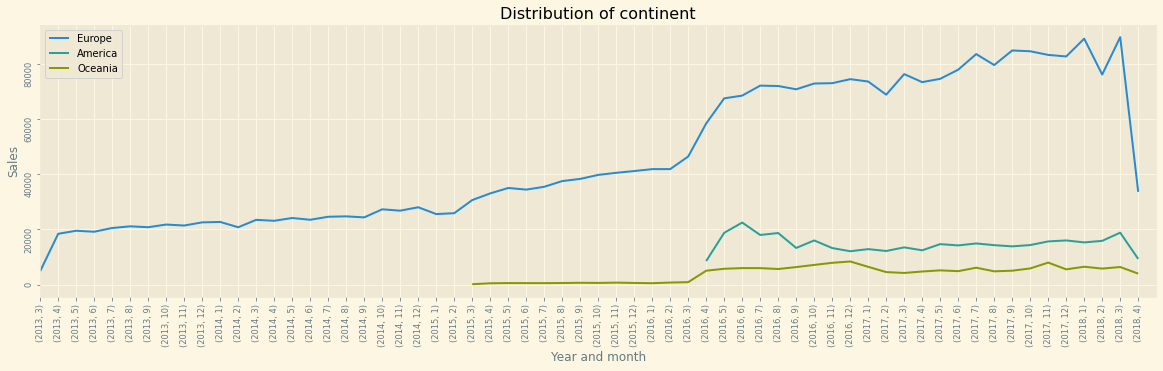

PLOTTING FOR: country


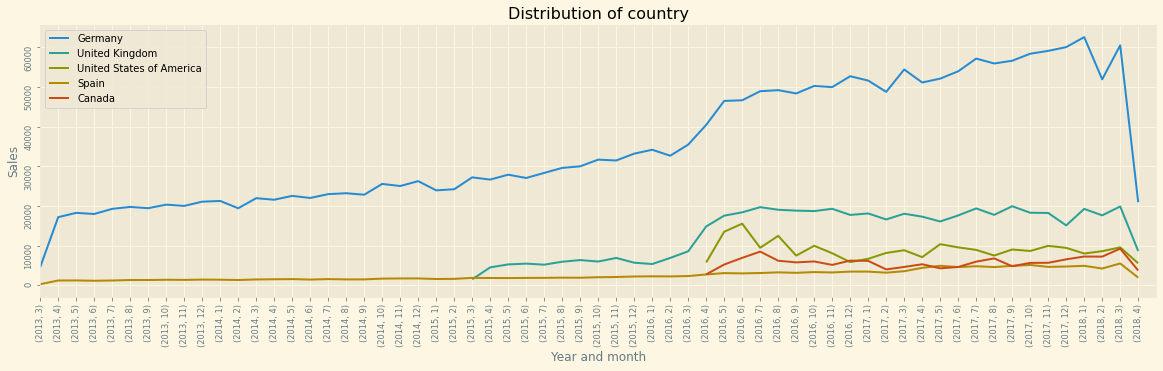

PLOTTING FOR: region


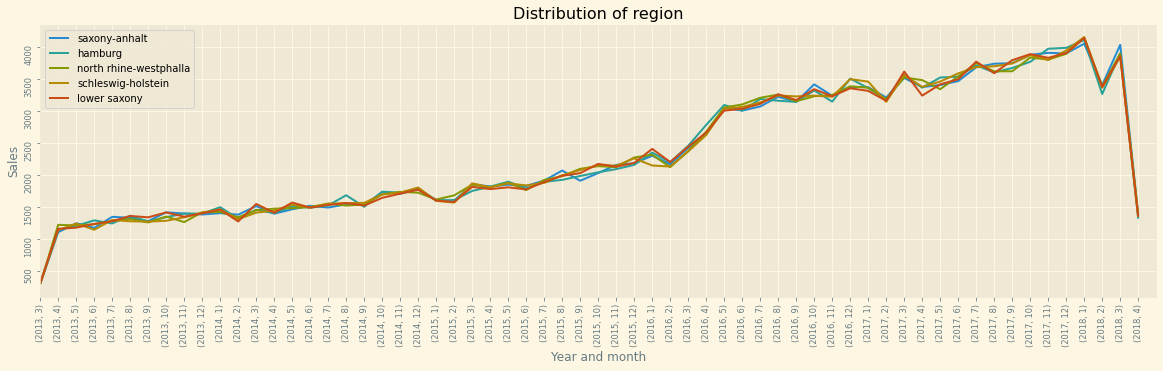

PLOTTING FOR: currency


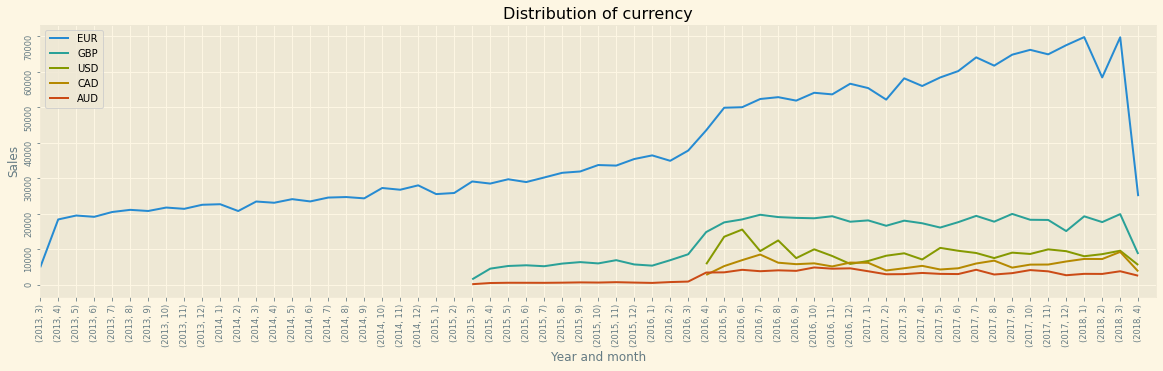

In [28]:
legend=[]
for x in df_join.time_code.dt.year.unique():
    tmp=df_join[df_join.time_code.dt.year ==x]
    for y in tmp.time_code.dt.month.unique():
        legend.append((x,y))
array=df_join.columns
print(legend)
for focus in array:
    if focus != 'time_code' and focus != 'year'and focus != 'id_ram'and focus != 'month'and focus != 'week':
        if focus == 'continent':
            max_val=3
        else:
            max_val=5
        
        print("PLOTTING FOR: "+focus)

        plt.figure(figsize=(20, 5))
        tmp1=df_join.groupby(focus)[focus].count()
        tmp1=tmp1.sort_values(ascending=False)
        test=tmp1.index.values.tolist()
        plt.title("Distribution of "+focus)
        plt.xlim([0,len(legend)])
        plt.xlabel("Year and month")
        plt.ylabel("Sales")
       
        plt.xticks(np.arange(len(legend)),legend)
        plt.tick_params(labelrotation=90, labelsize='small')

        #print('legend len:'+str(len(legend)))

        for x in test[0:max_val]:
            tmp=df_join[df_join[focus]==x]
            #tmp.groupby([df_join.year, df_join.month])[focus].count().plot()
            tmp2=tmp.groupby([df_join.time_code.dt.year, df_join.month])[focus].count().reset_index(name='count')
            minyear=tmp2.time_code.min()
            minmonth=tmp2[tmp2.time_code==minyear]
            minmonth=minmonth.month.min()
            index=(minyear,minmonth)
            num_index=legend.index(index)
            values=tmp.groupby([df_join.time_code.dt.year, df_join.month])[focus].count().values.tolist()
            #print(values)
            #print(num_index)
            plt.plot(np.arange(num_index,len(values)+num_index),values)
            #print(len(tmp.groupby([df_join.year, df_join.month])[focus].count().values.tolist()))

        plt.legend(test[0:max_val])
        plt.show()

PLOTTING FOR: sales_usd
Europe
   time_code  month      count
0       2013      3  516344.84
1       2013      4 2013309.43
2       2013      5 2532759.25
3       2013      6 2212235.90
4       2013      7 2507800.68
_____________
(2013, 3)
_____________
Oceania
   time_code  month     count
0       2015      3  25131.99
1       2015      4 555621.54
2       2015      5 115185.05
3       2015      6 108152.46
4       2015      7  98940.25
_____________
(2015, 3)
_____________
America
   time_code  month      count
0       2016      4  934730.94
1       2016      5 2152844.19
2       2016      6 2484102.61
3       2016      7 1946023.90
4       2016      8 2021952.32
_____________
(2016, 4)
_____________


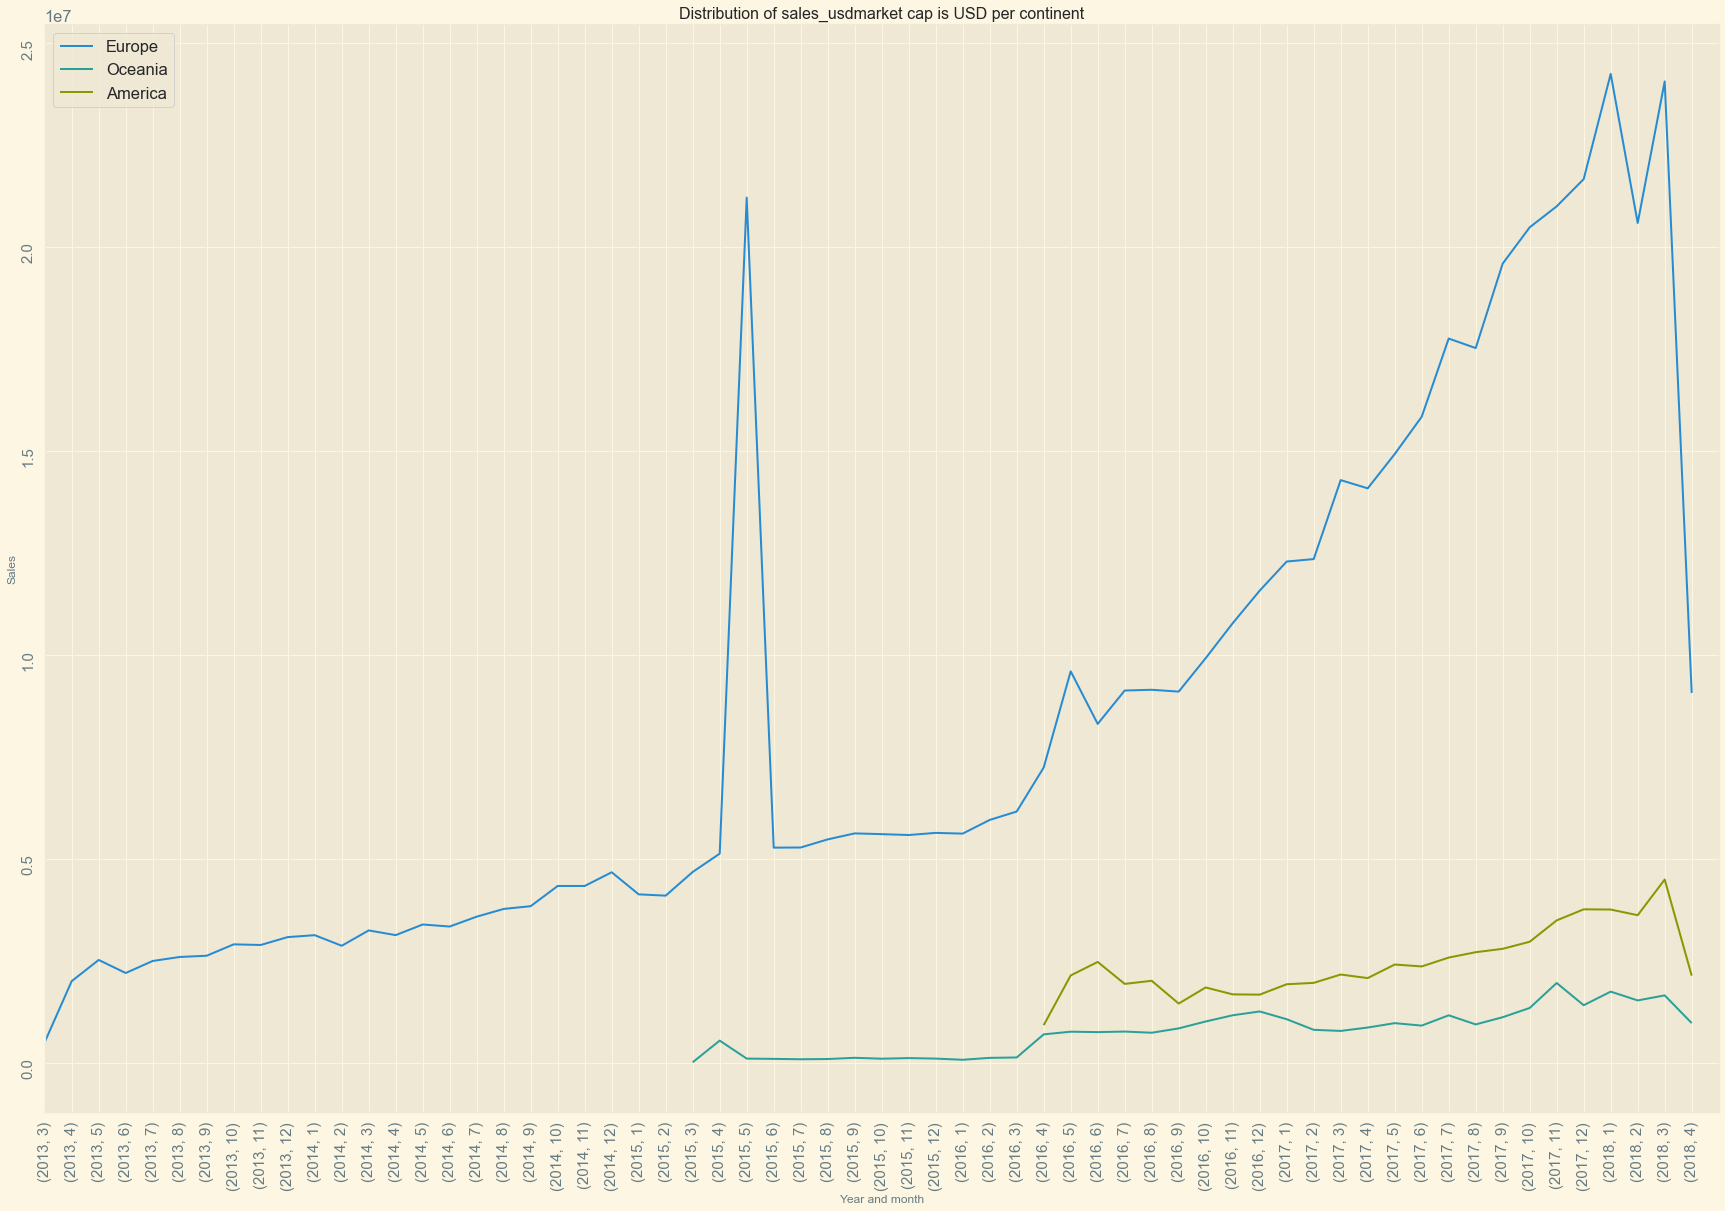

In [62]:
test=[]
legend=[]
for x in df_join.time_code.dt.year.unique():
    tmp=df_join[df_join.time_code.dt.year ==x]
    for y in tmp.time_code.dt.month.unique():
        legend.append((x,y))
focus='sales_usd'
print("PLOTTING FOR: "+focus)
plt.title("Distribution of "+focus+'market cap is USD per continent')
plt.xlim([0,len(legend)])
plt.xlabel("Year and month")
plt.ylabel("Sales")    
plt.xticks(np.arange(len(legend)),legend)
plt.tick_params(labelrotation=90, labelsize='small')

for y in df_join.continent.unique():
    print(y)
    tmp1=df_join[df_join.continent==y]
    test.append(y)
    #tmp.groupby([df_join.year, df_join.month])[focus].count().plot()
    tmp2=tmp1.groupby([df_join.time_code.dt.year, df_join.month])[focus].sum().reset_index(name='count')
    print(tmp2.head())
    minyear=tmp2.time_code.min()
    minmonth=tmp2[tmp2.time_code==minyear]
    minmonth=minmonth.month.min()
    index=(minyear,minmonth)
    print("_____________")
    print(index)
    print("_____________")
    num_index=legend.index(index)
    values=tmp2['count'].tolist()
    #print(values)
    #print(num_index)
    plt.plot(np.arange(num_index,len(values)+num_index),values)
    #print(len(tmp.groupby([df_join.year, df_join.month])[focus].count().values.tolist()))

plt.legend(test)
plt.show()

PLOTTING FOR: sales_usd
Europe
	Germany


<ipython-input-63-53fedb73c114>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp1=tmp3[df_join.country==y]


   time_code  month      count
0       2013      3  489452.59
1       2013      4 1883675.96
2       2013      5 2403050.72
3       2013      6 2071461.75
4       2013      7 2356431.43
_____________
(2013, 3)
_____________
	Spain


<ipython-input-63-53fedb73c114>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp1=tmp3[df_join.country==y]


   time_code  month     count
0       2013      3  26892.24
1       2013      4 129633.47
2       2013      5 129708.53
3       2013      6 140774.15
4       2013      7 151369.25
_____________
(2013, 3)
_____________
	United Kingdom


<ipython-input-63-53fedb73c114>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp1=tmp3[df_join.country==y]


   time_code  month       count
0       2015      3   277841.26
1       2015      4   885299.81
2       2015      5 16837197.21
3       2015      6  1131024.44
4       2015      7  1018977.39
_____________
(2015, 3)
_____________
	Italy


<ipython-input-63-53fedb73c114>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp1=tmp3[df_join.country==y]


   time_code  month    count
0       2017     10  5647.35
1       2017     11   305.79
2       2017     12 50628.95
3       2018      1 57228.67
4       2018      2 34112.56
_____________
(2017, 10)
_____________
	Ireland


<ipython-input-63-53fedb73c114>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp1=tmp3[df_join.country==y]


   time_code  month     count
0       2017      5  31187.55
1       2017      6  60635.45
2       2017      7  63203.27
3       2017      8  37098.11
4       2017      9 168043.08
_____________
(2017, 5)
_____________
	France


<ipython-input-63-53fedb73c114>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp1=tmp3[df_join.country==y]


   time_code  month     count
0       2016      4     72.88
1       2017      4  46273.61
2       2017      5 245730.62
3       2017      6 319273.84
4       2017      7 433681.73
_____________
(2016, 4)
_____________
	Belgium


<ipython-input-63-53fedb73c114>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp1=tmp3[df_join.country==y]


   time_code  month    count
0       2016      4 36788.51
1       2016      5 34922.47
2       2016      6 37428.98
3       2016      7 32173.17
4       2016      8 49008.50
_____________
(2016, 4)
_____________


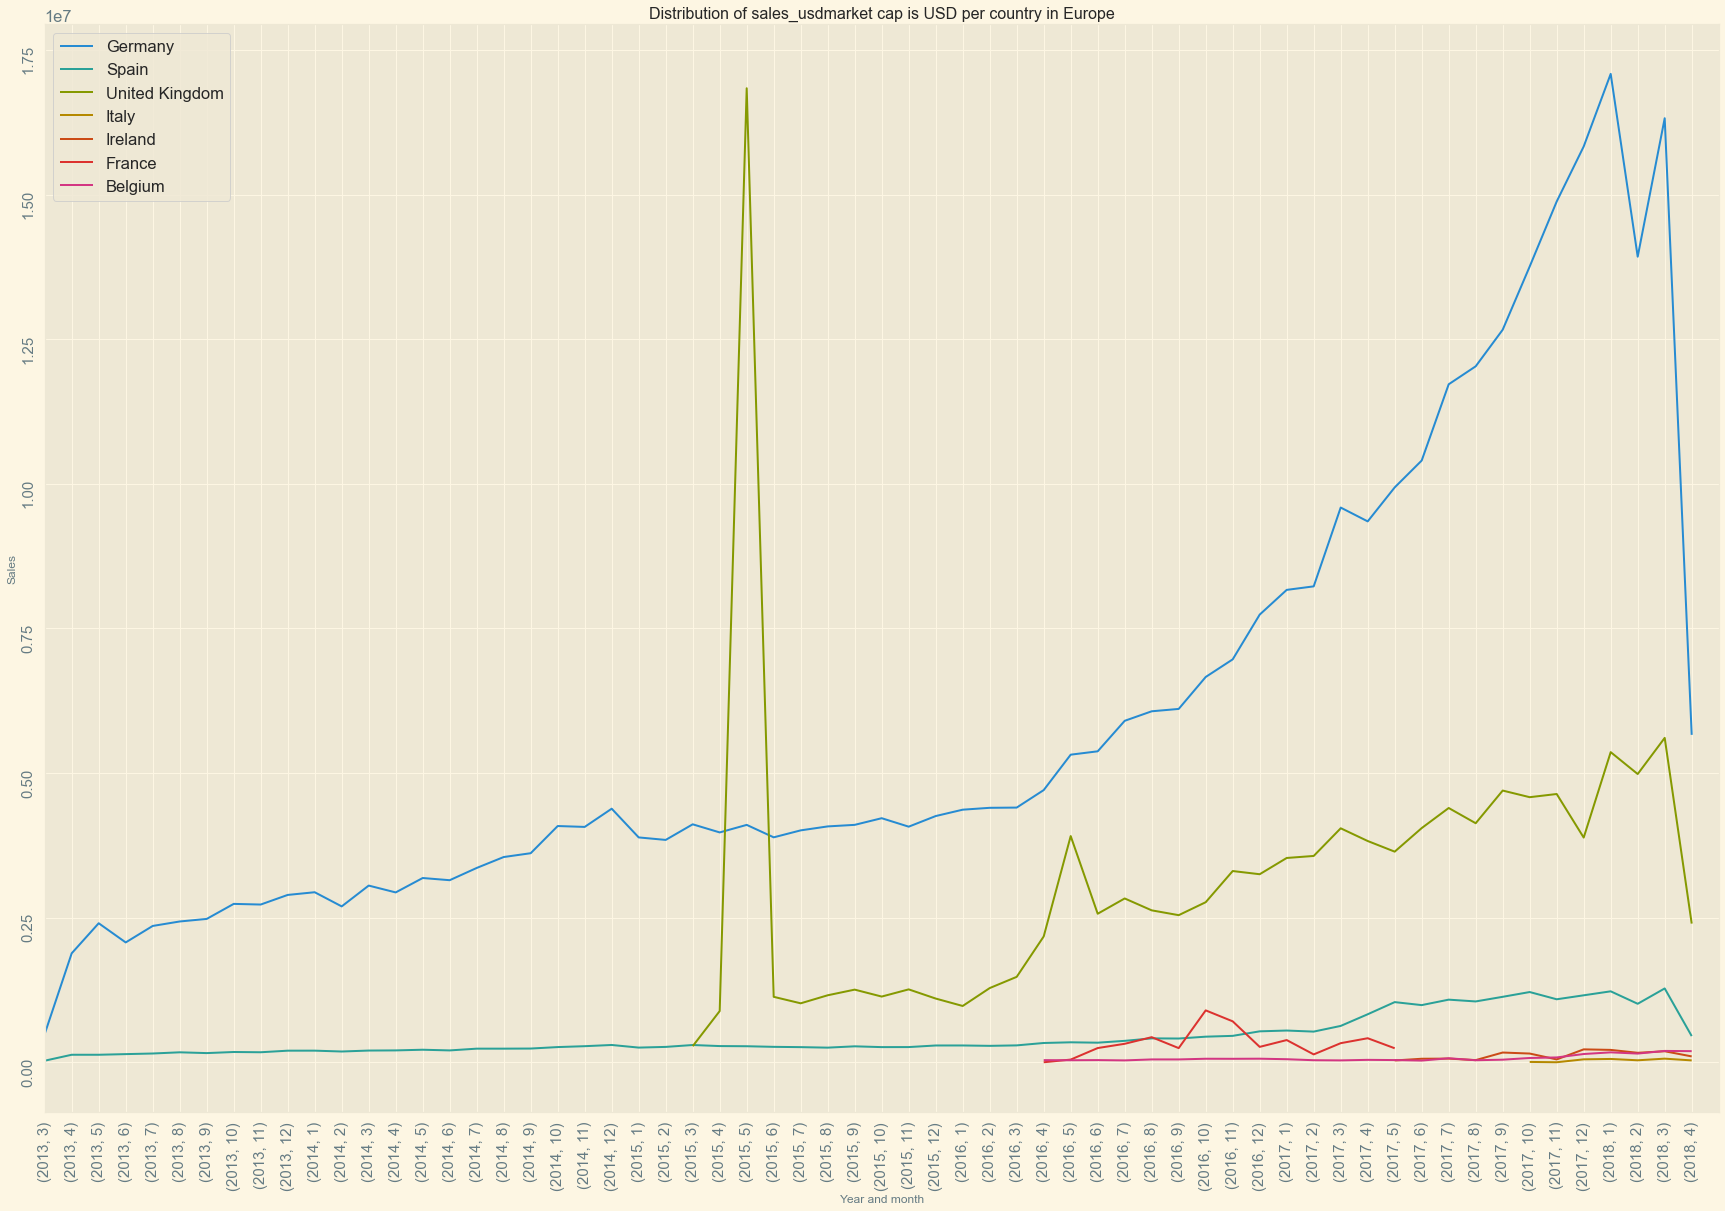

Oceania
	Australia


<ipython-input-63-53fedb73c114>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp1=tmp3[df_join.country==y]


   time_code  month     count
0       2015      3  25131.99
1       2015      4 555621.54
2       2015      5 115185.05
3       2015      6 108152.46
4       2015      7  98940.25
_____________
(2015, 3)
_____________
	New Zeland


<ipython-input-63-53fedb73c114>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp1=tmp3[df_join.country==y]


   time_code  month     count
0       2016      4 238690.74
1       2016      5 335168.93
2       2016      6 260819.35
3       2016      7 304044.03
4       2016      8 225037.87
_____________
(2016, 4)
_____________


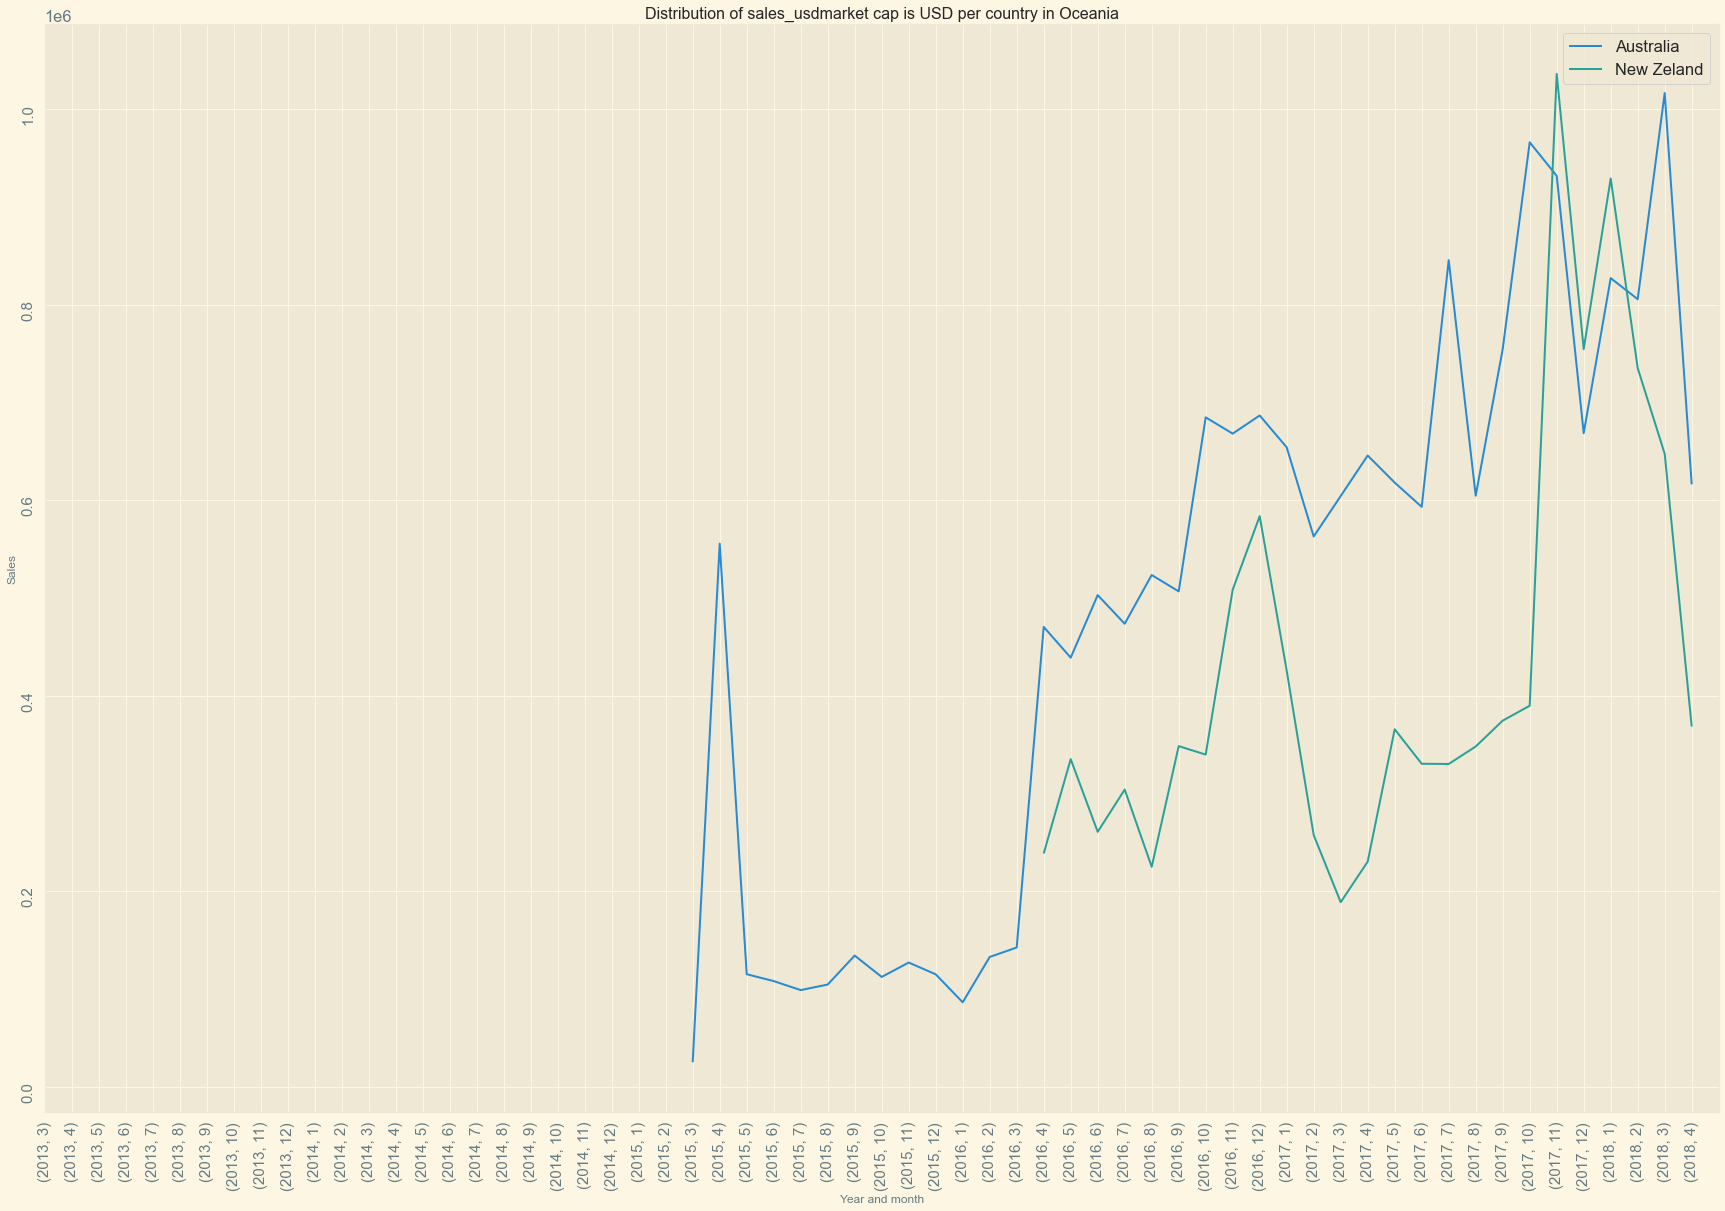

America
	United States of America


<ipython-input-63-53fedb73c114>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp1=tmp3[df_join.country==y]


   time_code  month      count
0       2016      4  631801.59
1       2016      5 1555571.65
2       2016      6 1730378.18
3       2016      7  971556.02
4       2016      8 1311646.55
_____________
(2016, 4)
_____________
	Canada


<ipython-input-63-53fedb73c114>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp1=tmp3[df_join.country==y]


   time_code  month     count
0       2016      4 302929.35
1       2016      5 597272.54
2       2016      6 753724.43
3       2016      7 974467.88
4       2016      8 710305.77
_____________
(2016, 4)
_____________


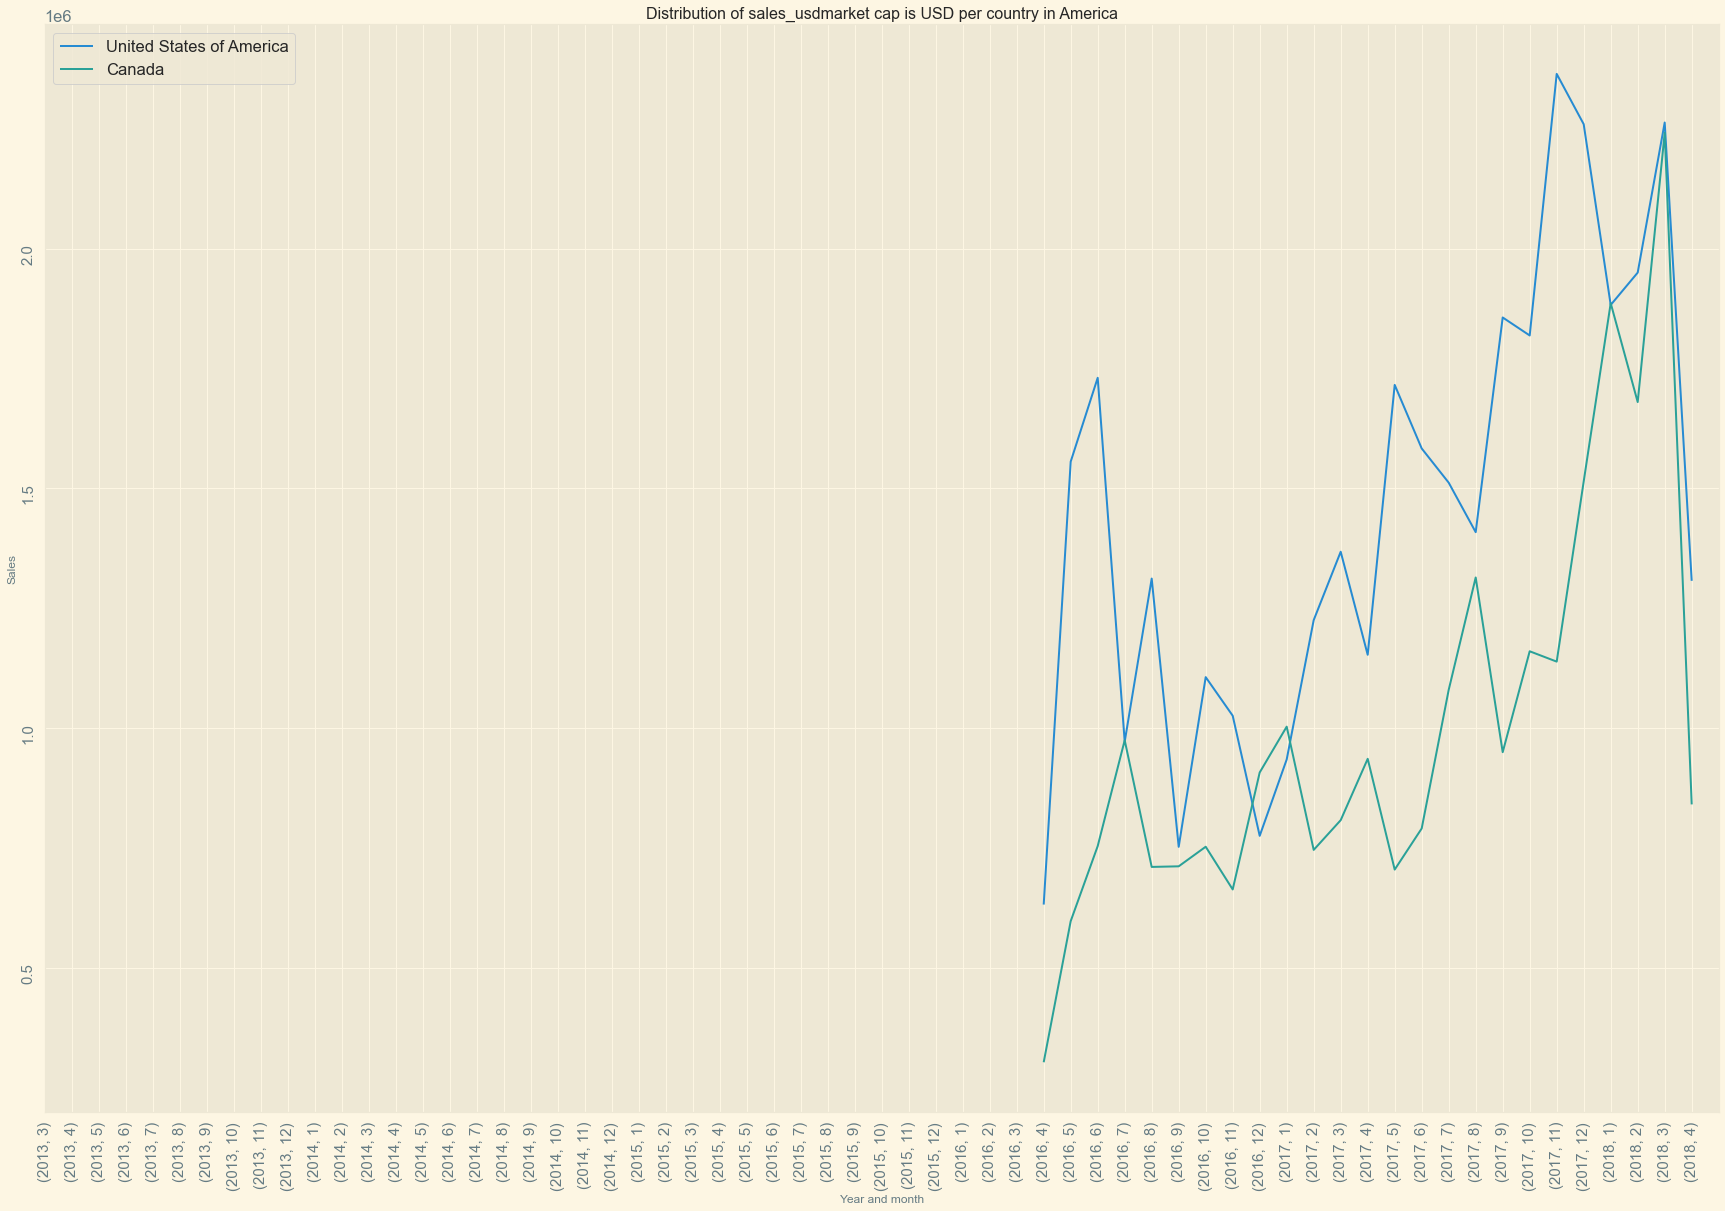

In [63]:
test=[]
legend=[]
for x in df_join.time_code.dt.year.unique():
    tmp=df_join[df_join.time_code.dt.year ==x]
    for y in tmp.time_code.dt.month.unique():
        legend.append((x,y))
focus='sales_usd'
print("PLOTTING FOR: "+focus)

for z in df_join.continent.unique():
    plt.title("Distribution of "+focus+'market cap is USD per country in '+z)
    plt.xlim([0,len(legend)])
    plt.xlabel("Year and month")
    plt.ylabel("Sales")    
    plt.xticks(np.arange(len(legend)),legend)
    plt.tick_params(labelrotation=90, labelsize='small')

    print(z)
    test=[]

    tmp3=df_join[df_join.continent==z]
    for y in tmp3.country.unique():
        print('\t'+y)
        tmp1=tmp3[df_join.country==y]

        test.append(y)
        #tmp.groupby([df_join.year, df_join.month])[focus].count().plot()
        tmp2=tmp1.groupby([df_join.time_code.dt.year, df_join.month])[focus].sum().reset_index(name='count')
        print(tmp2.head())
        minyear=tmp2.time_code.min()
        minmonth=tmp2[tmp2.time_code==minyear]
        minmonth=minmonth.month.min()
        index=(minyear,minmonth)
        print("_____________")
        print(index)
        print("_____________")
        num_index=legend.index(index)
        values=tmp2['count'].tolist()
        #print(values)
        #print(num_index)
        plt.plot(np.arange(num_index,len(values)+num_index),values)
        #print(len(tmp.groupby([df_join.year, df_join.month])[focus].count().values.tolist()))

    plt.legend(test)
    plt.show()

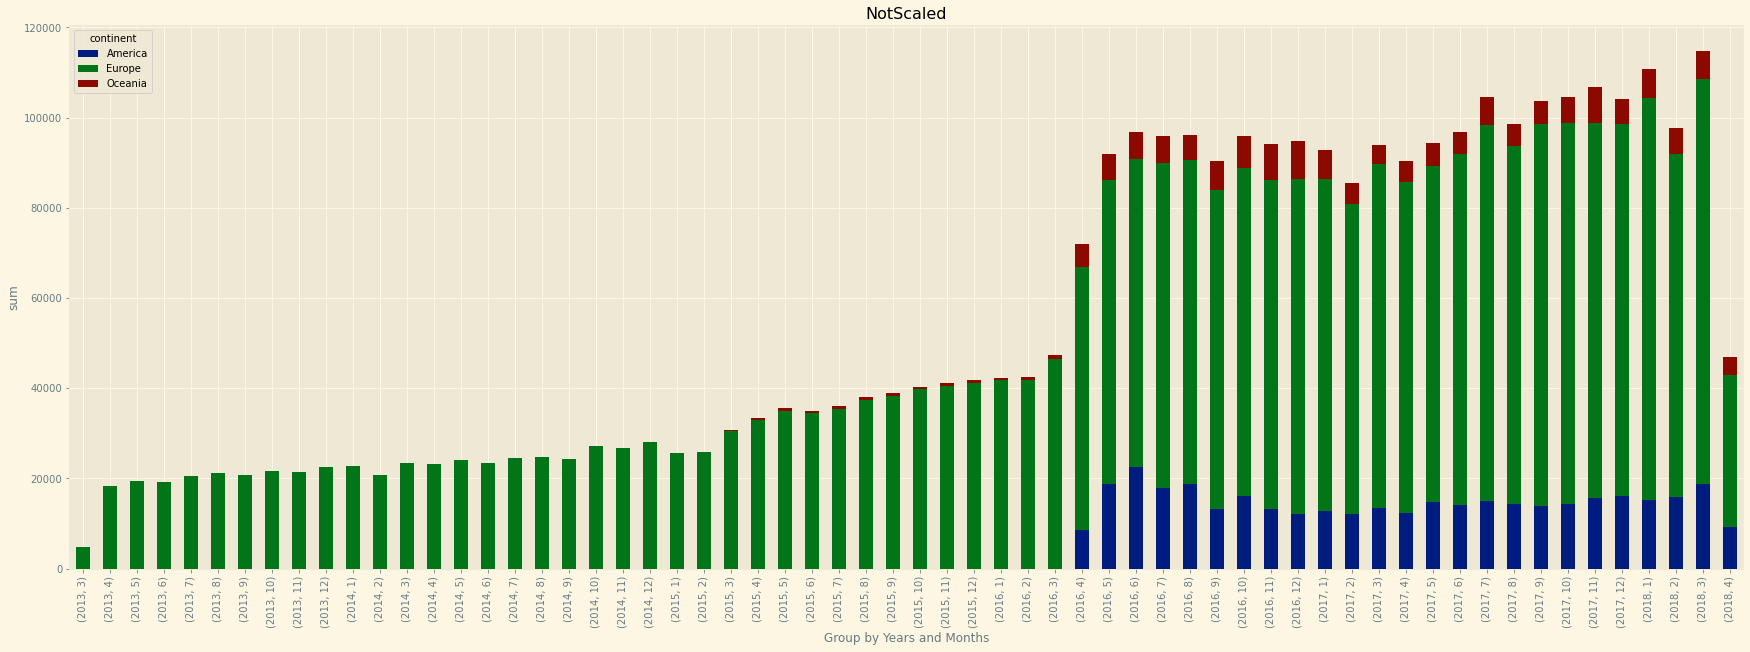

In [29]:
df1 = df_join.groupby([df_join.time_code.dt.year , df_join.time_code.dt.month,'continent']).count().unstack()
plt.style.use('seaborn-dark-palette')

df1["time_code"].plot(kind="bar", stacked=True,sort_columns  =True)

#df_dropped.groupby([df_dropped.time_code.dt.year , df_dropped.time_code.dt.month])["continent"].nunique().plot(kind="bar", title="test", stacked=True)

plt.xticks(rotation=90, horizontalalignment="center")
plt.title("NotScaled")
plt.xlabel("Group by Years and Months")
plt.ylabel("sum")


#df1.plot(figsize=(20, 5))
plt.savefig('Contxsell')
plt.show()

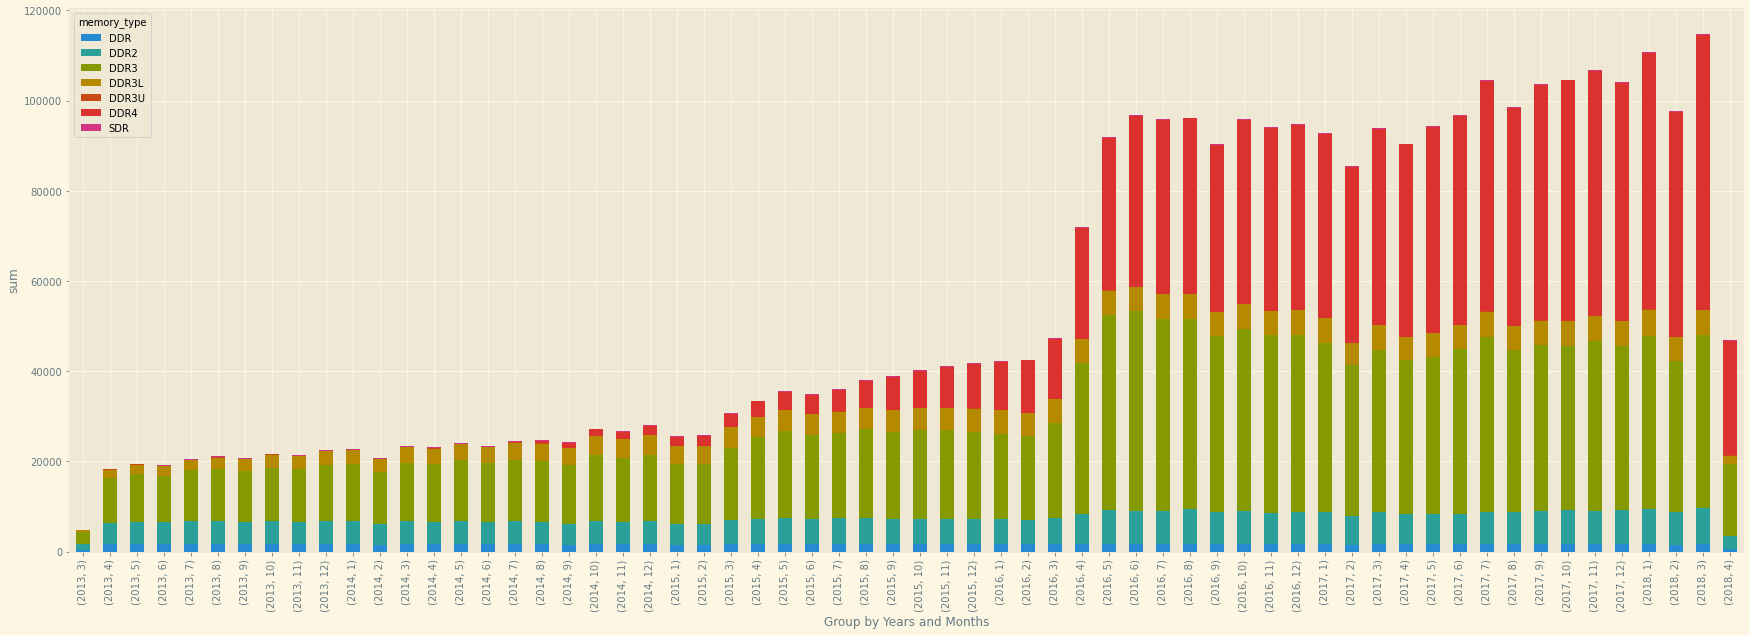

In [30]:
df1 = df_join.groupby([df_join.time_code.dt.year , df_join.time_code.dt.month,'memory_type']).count().unstack()
plt.style.use('Solarize_Light2')

df1["time_code"].plot(kind="bar", stacked=True,sort_columns  =True)


#df_dropped.groupby([df_dropped.time_code.dt.year , df_dropped.time_code.dt.month])["continent"].nunique().plot(kind="bar", title="test", stacked=True)

plt.xticks(rotation=90, horizontalalignment="center")

plt.xlabel("Group by Years and Months")
plt.ylabel("sum")


#df1.plot(figsize=(20, 5))
plt.savefig('Contxsell')
plt.show()

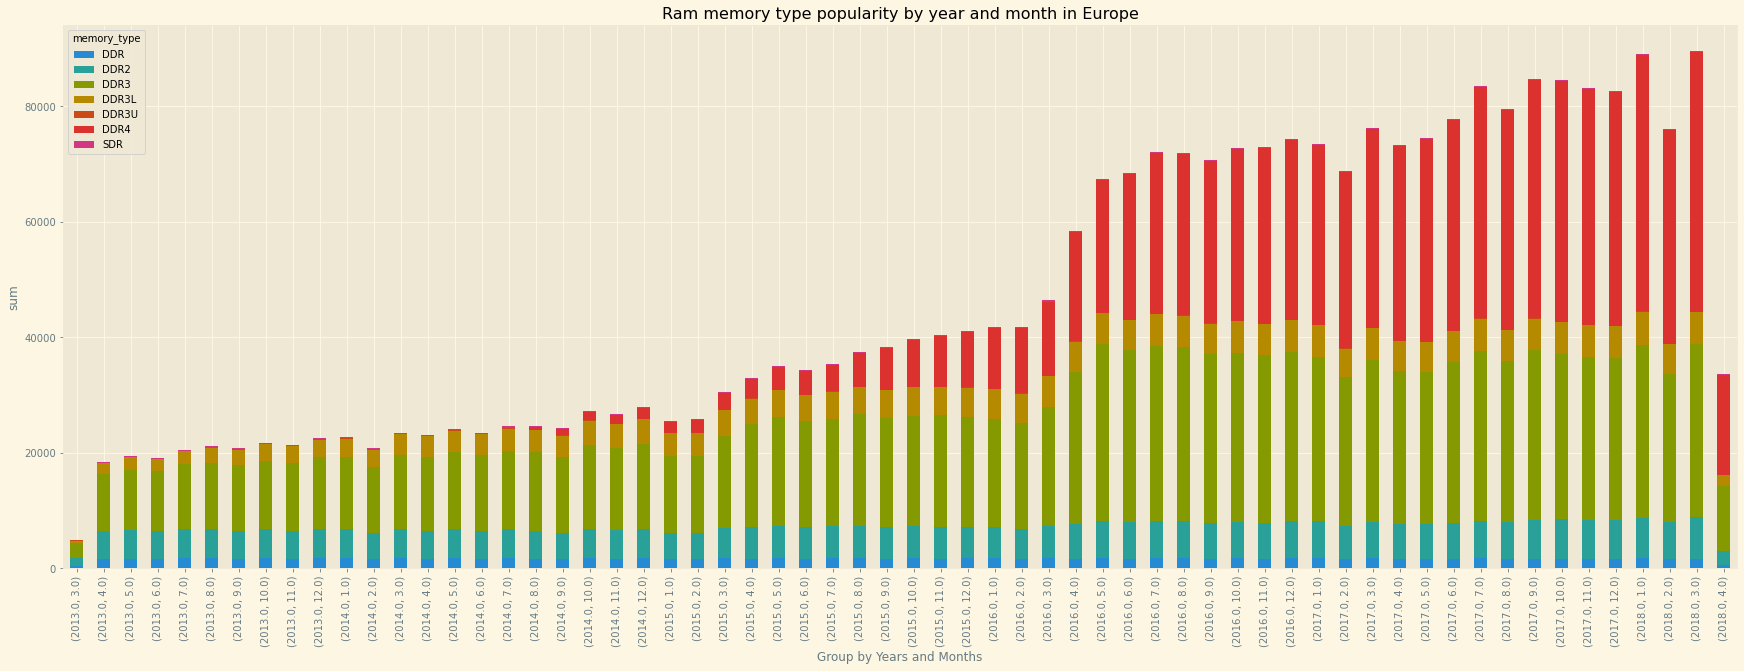

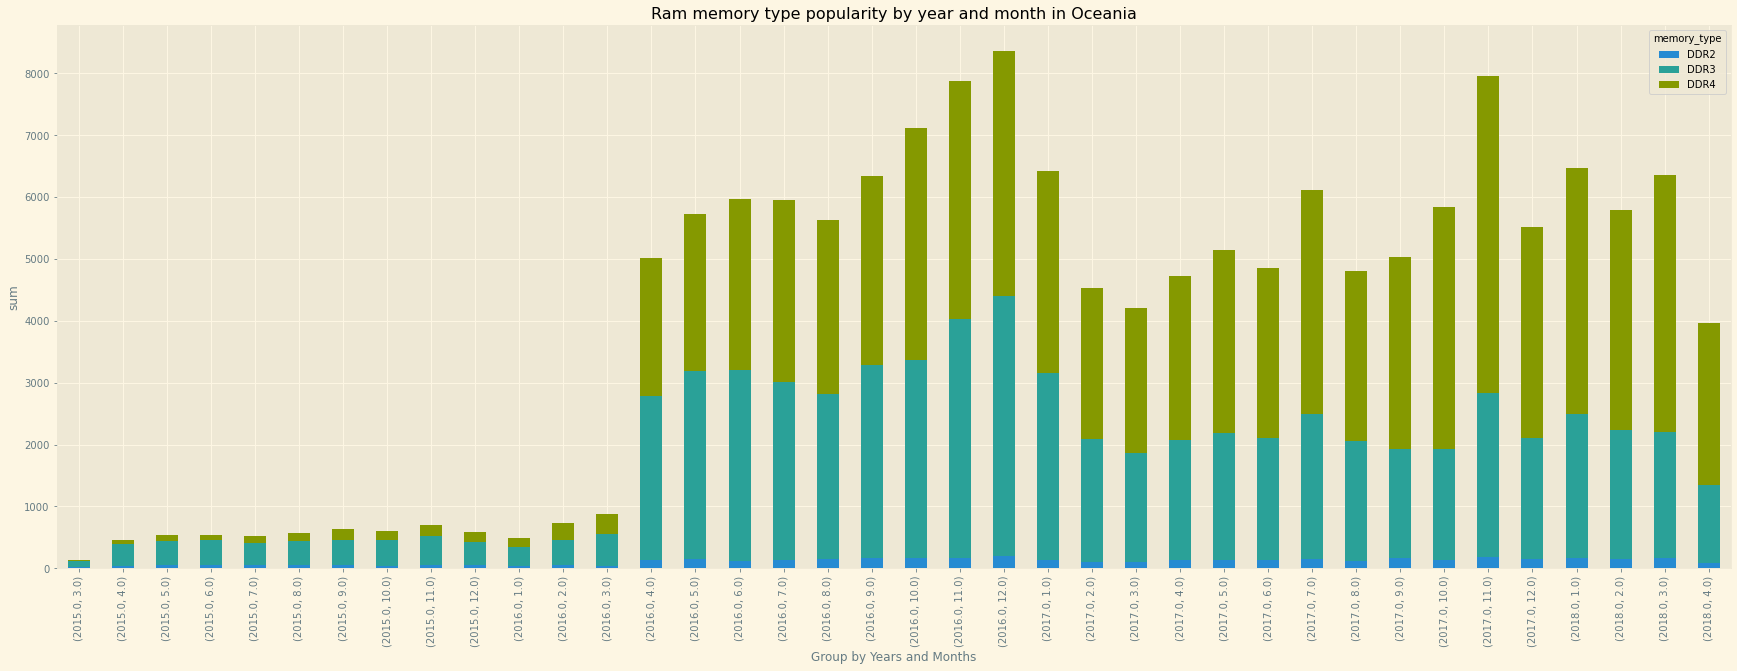

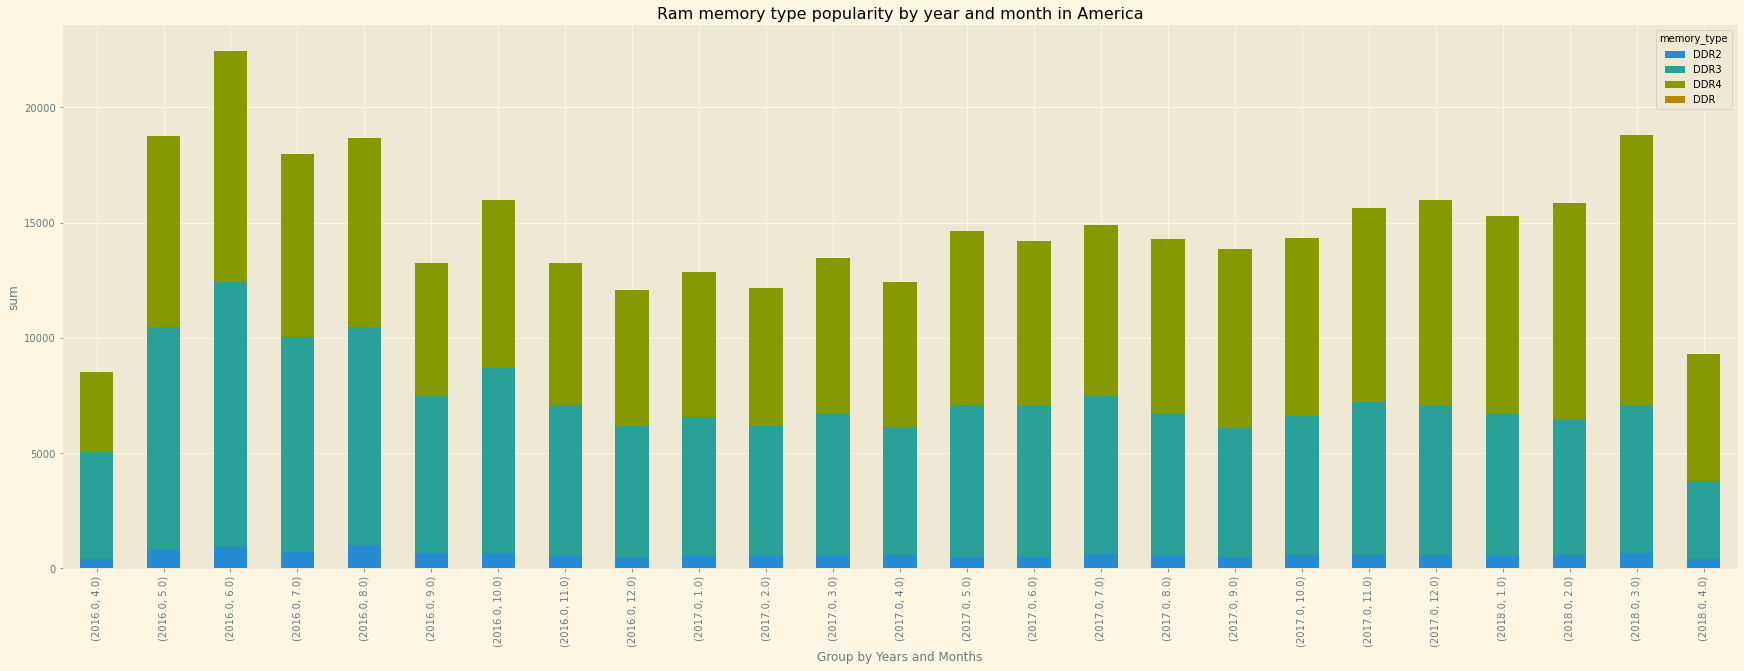

In [31]:
for x in df_join.continent.unique():
    df2=df_join[df_join.continent==x]
    df1 = df_join.groupby([df2.time_code.dt.year , df2.time_code.dt.month,'memory_type']).count().unstack()
    plt.style.use('Solarize_Light2')

    df1["time_code"].plot(kind="bar", stacked=True,sort_columns  =True)


    #df_dropped.groupby([df_dropped.time_code.dt.year , df_dropped.time_code.dt.month])["continent"].nunique().plot(kind="bar", title="test", stacked=True)
    plt.title('Ram memory type popularity by year and month in '+x)
    plt.xticks(rotation=90, horizontalalignment="center")

    plt.xlabel("Group by Years and Months")
    plt.ylabel("sum")


    #df1.plot(figsize=(20, 5))
    #plt.savefig('Contxsell')
    plt.show()

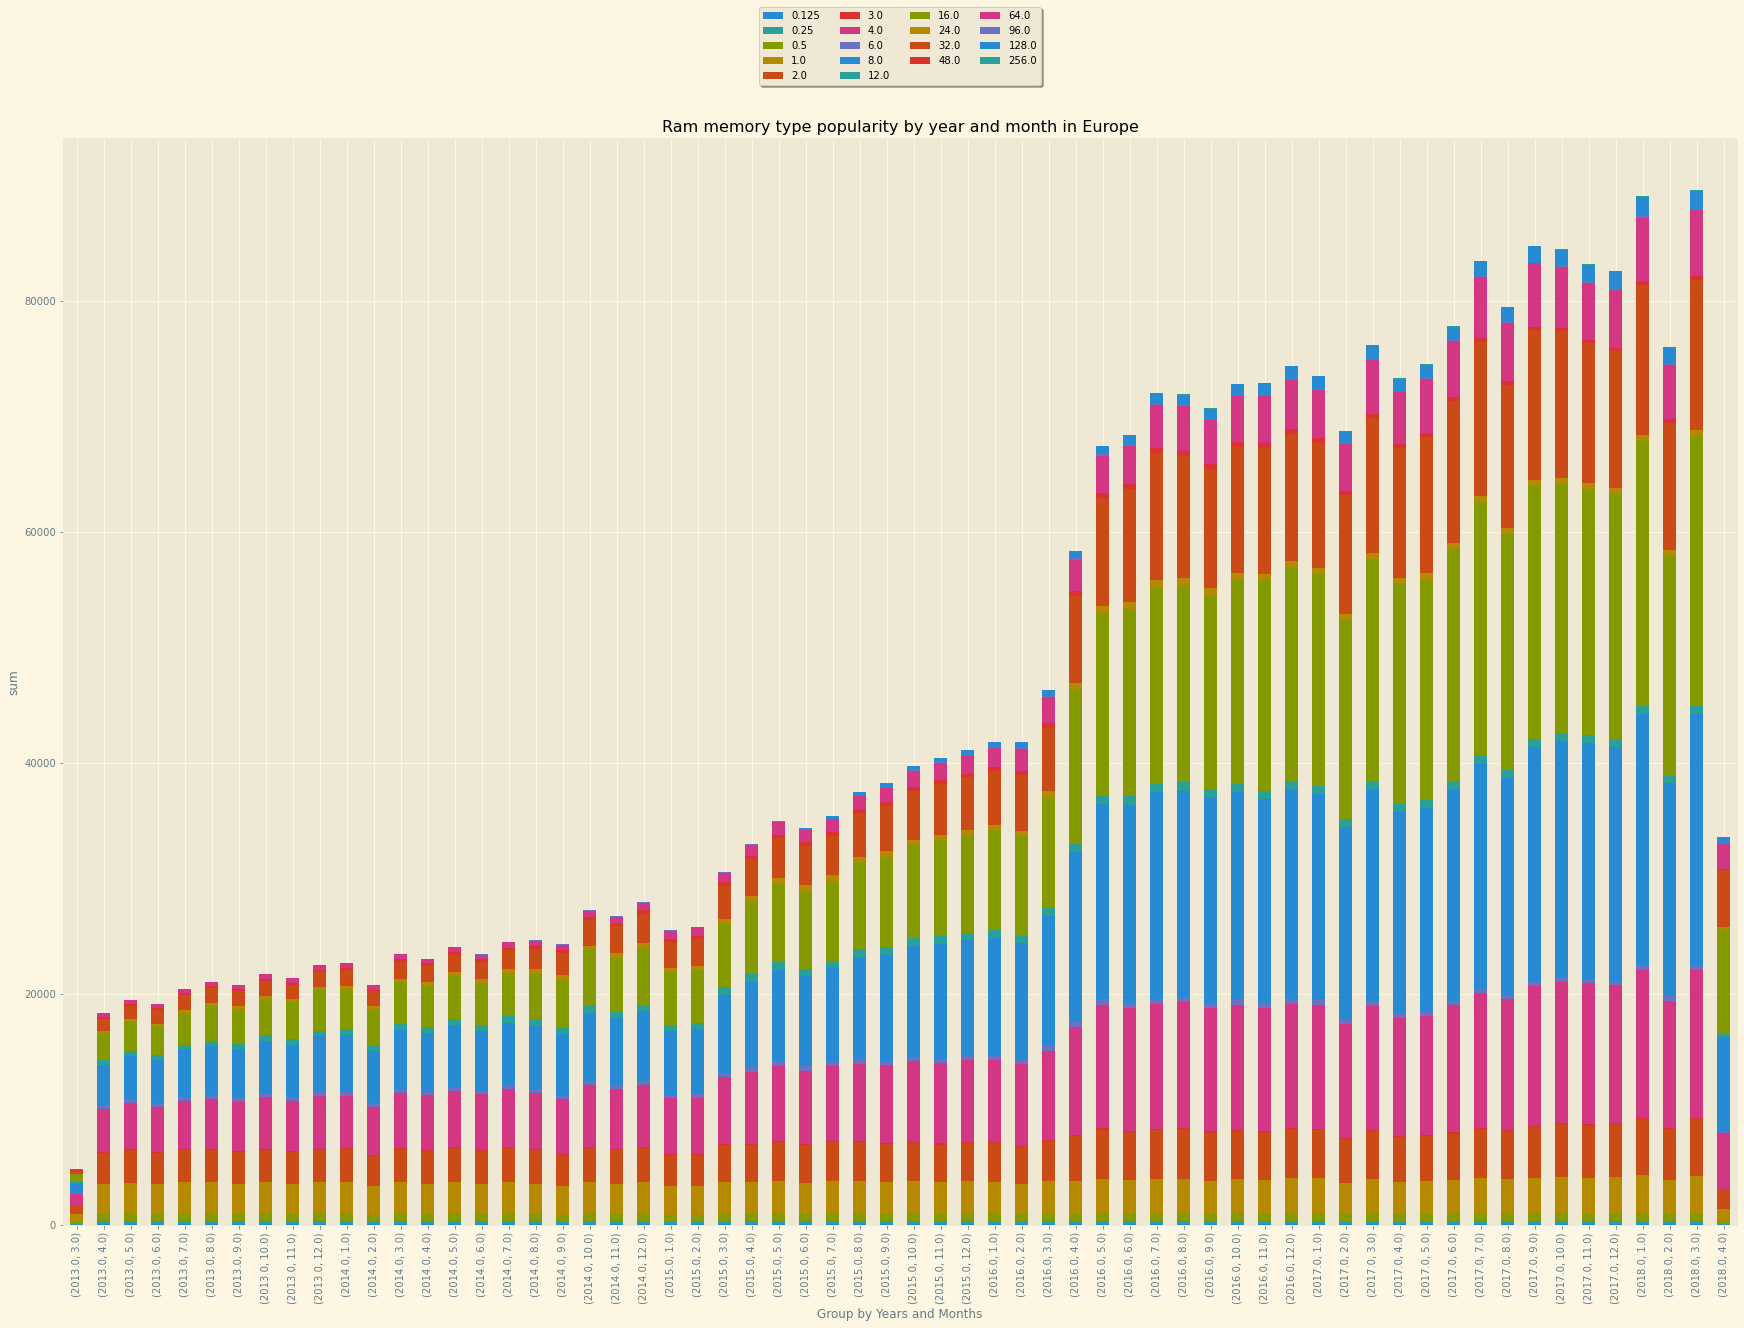

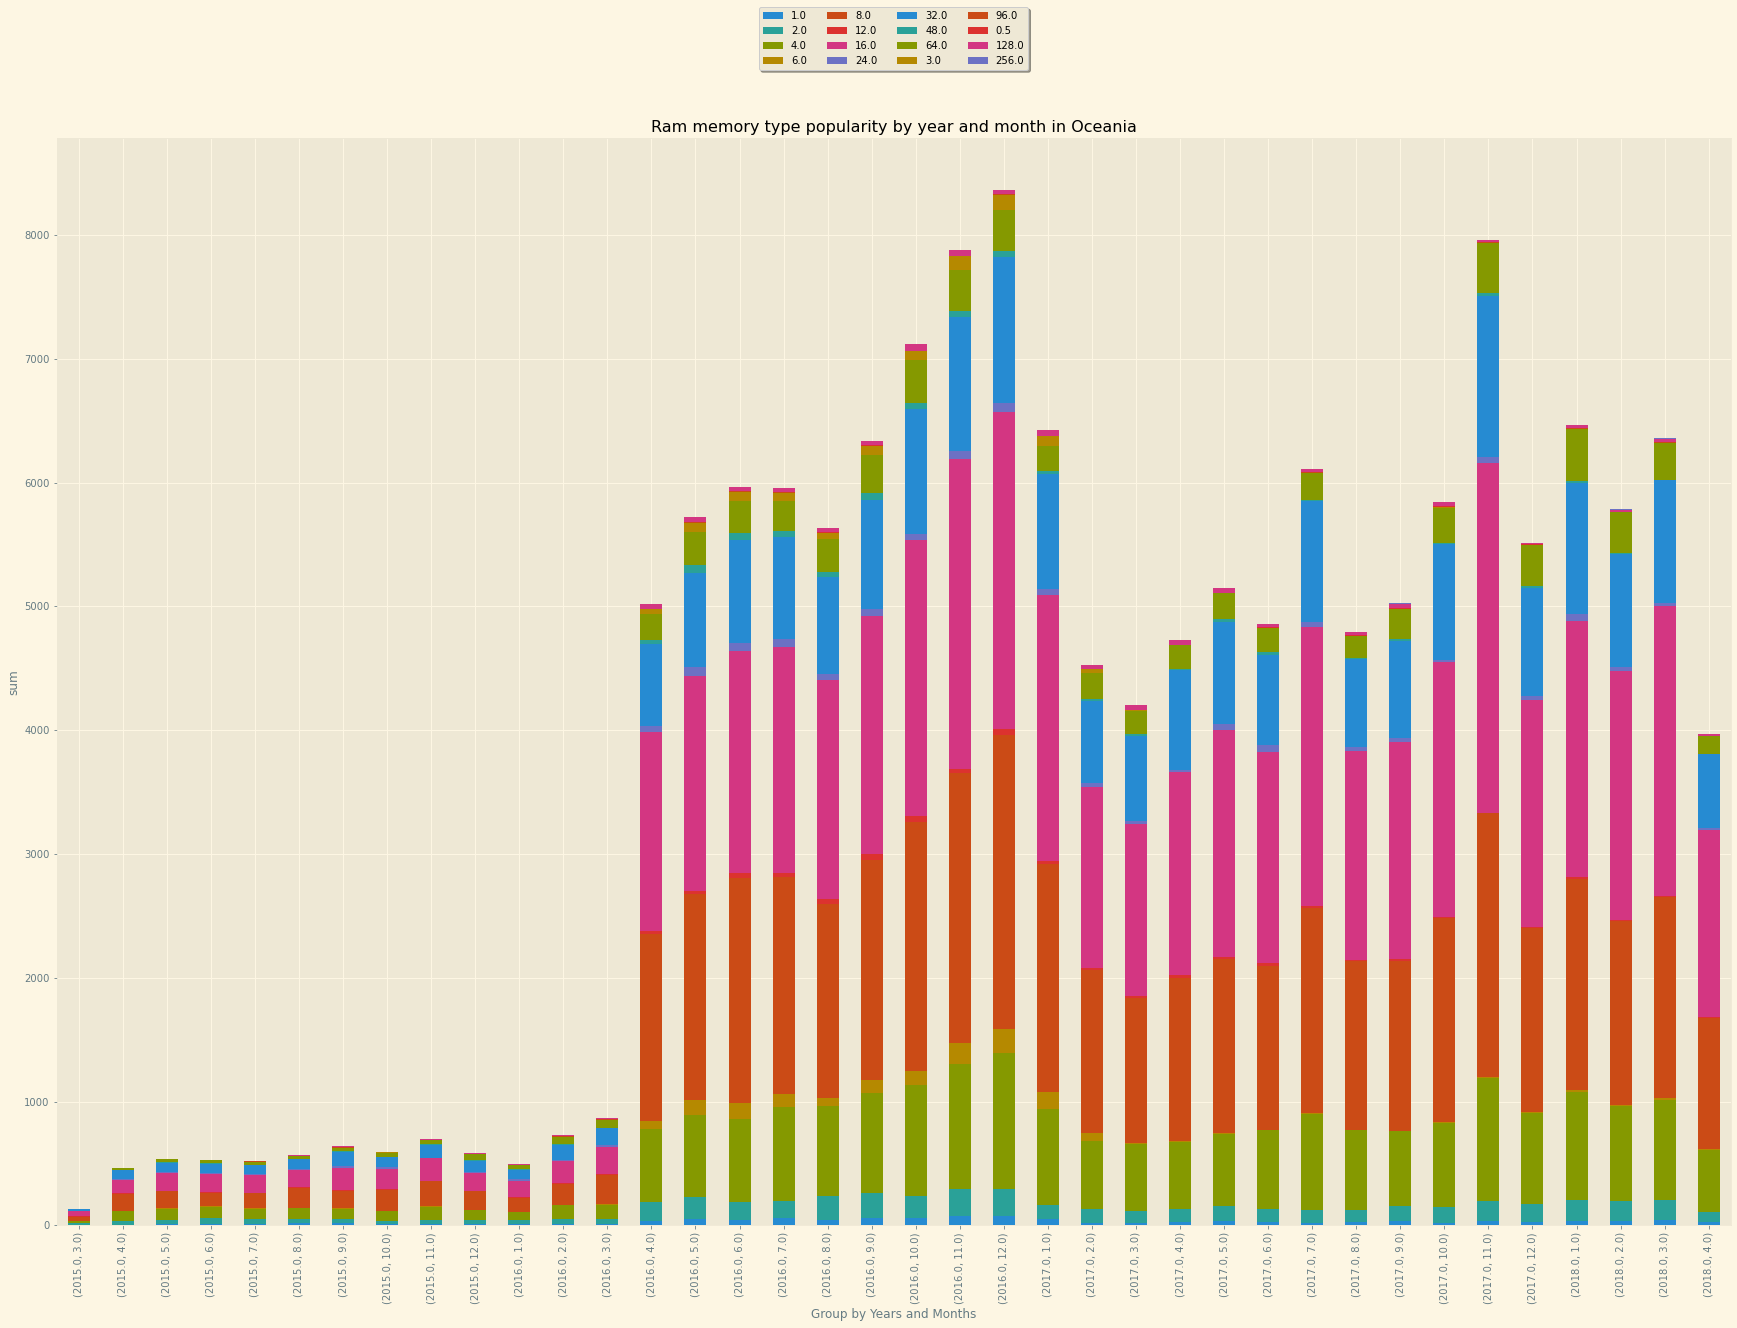

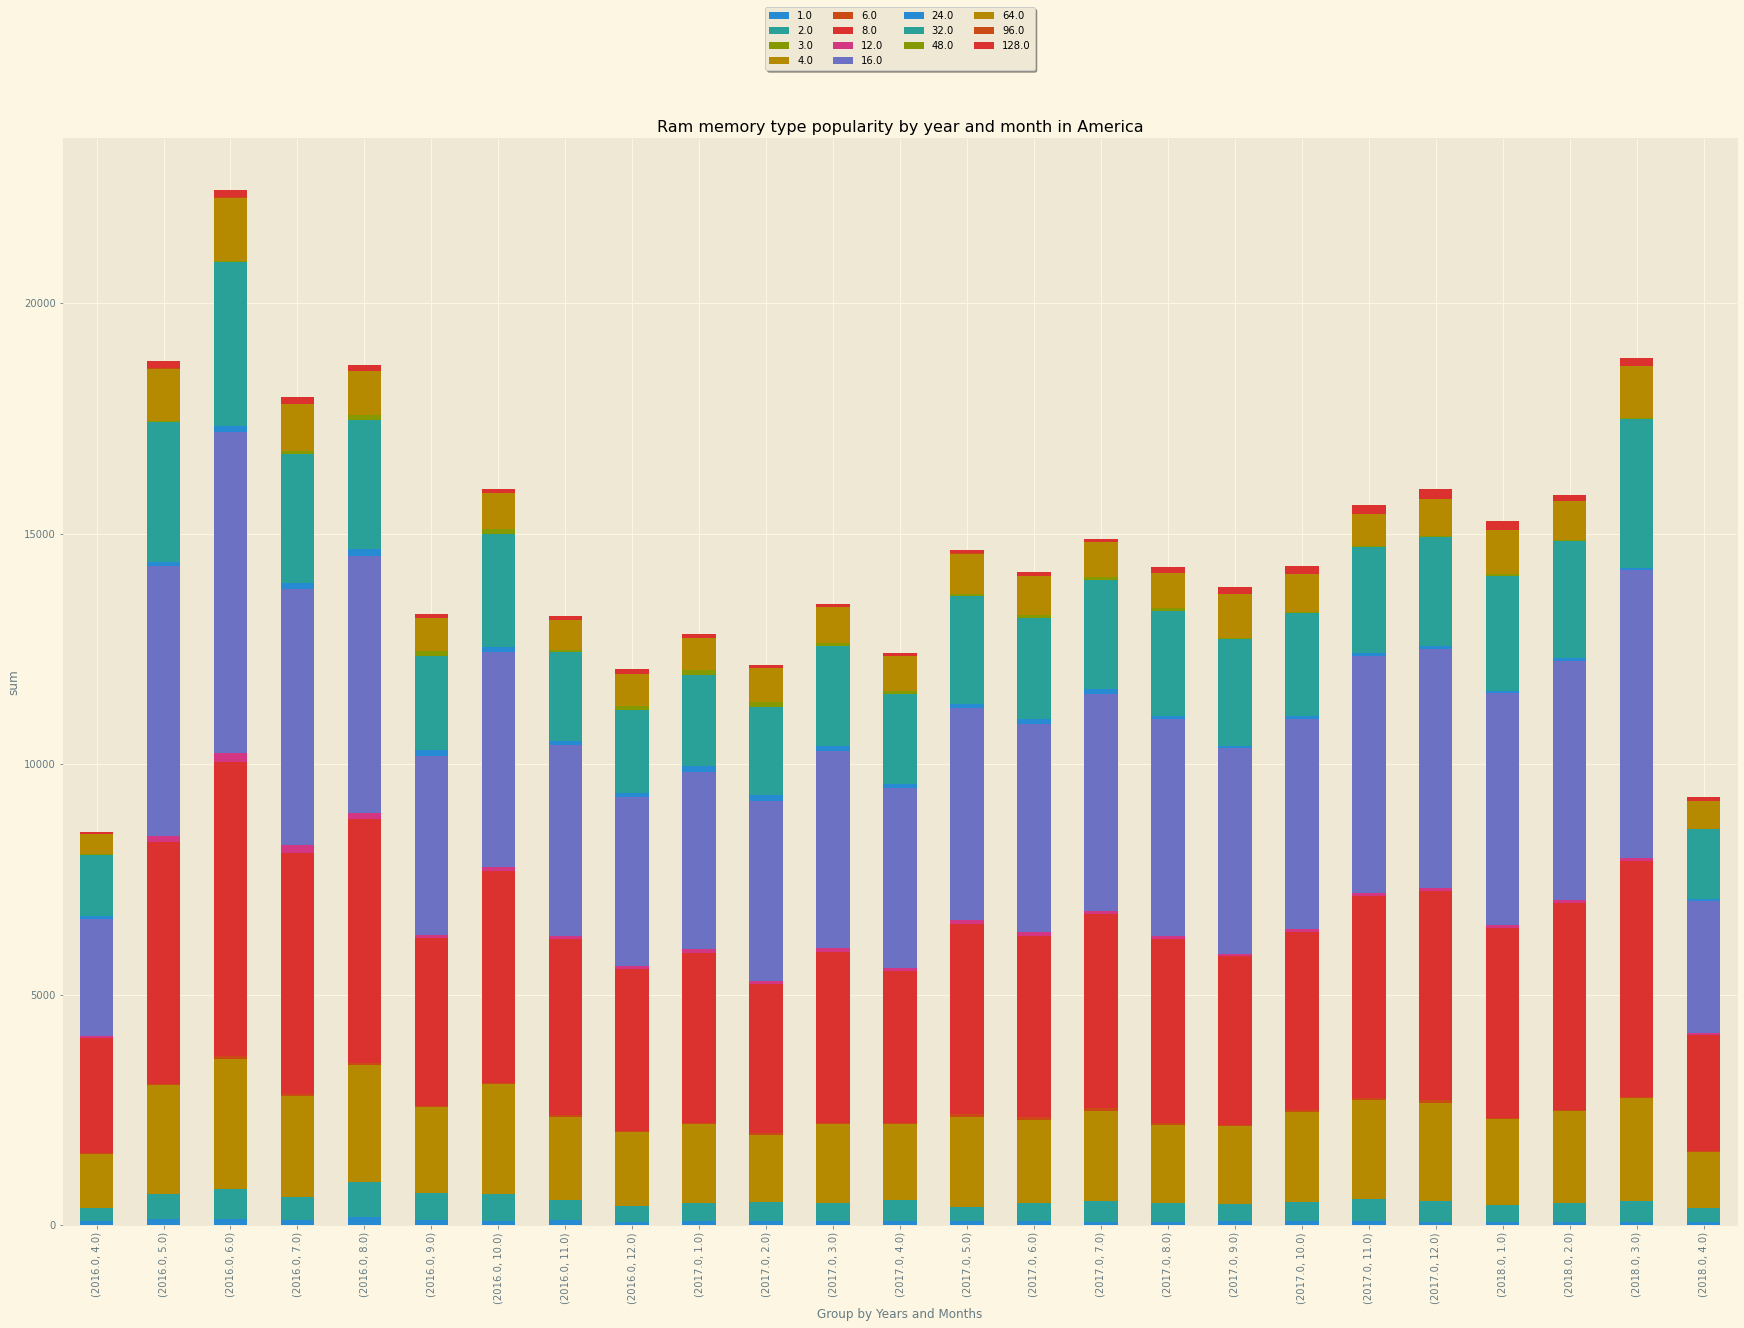

In [32]:
plt.rcParams["figure.figsize"] = [30,20]
focus='memory_dim'
for x in df_join.continent.unique():
    df2=df_join[df_join.continent==x]
    df1 = df_join.groupby([df2.time_code.dt.year , df2.time_code.dt.month,focus]).count().unstack()
    plt.style.use('Solarize_Light2')

    df1["time_code"].plot(kind="bar", stacked=True,sort_columns  =True)


    #df_dropped.groupby([df_dropped.time_code.dt.year , df_dropped.time_code.dt.month])["continent"].nunique().plot(kind="bar", title="test", stacked=True)
    plt.title('Ram memory Dimension popularity by year and month in '+x)
    plt.xticks(rotation=90, horizontalalignment="center")

    plt.xlabel("Group by Years and Months")
    plt.ylabel("sum")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.125),
          ncol=int(df_join[focus].nunique()/4), fancybox=True, shadow=True)


    #df1.plot(figsize=(20, 5))
    #plt.savefig('Contxsell')
    plt.show()

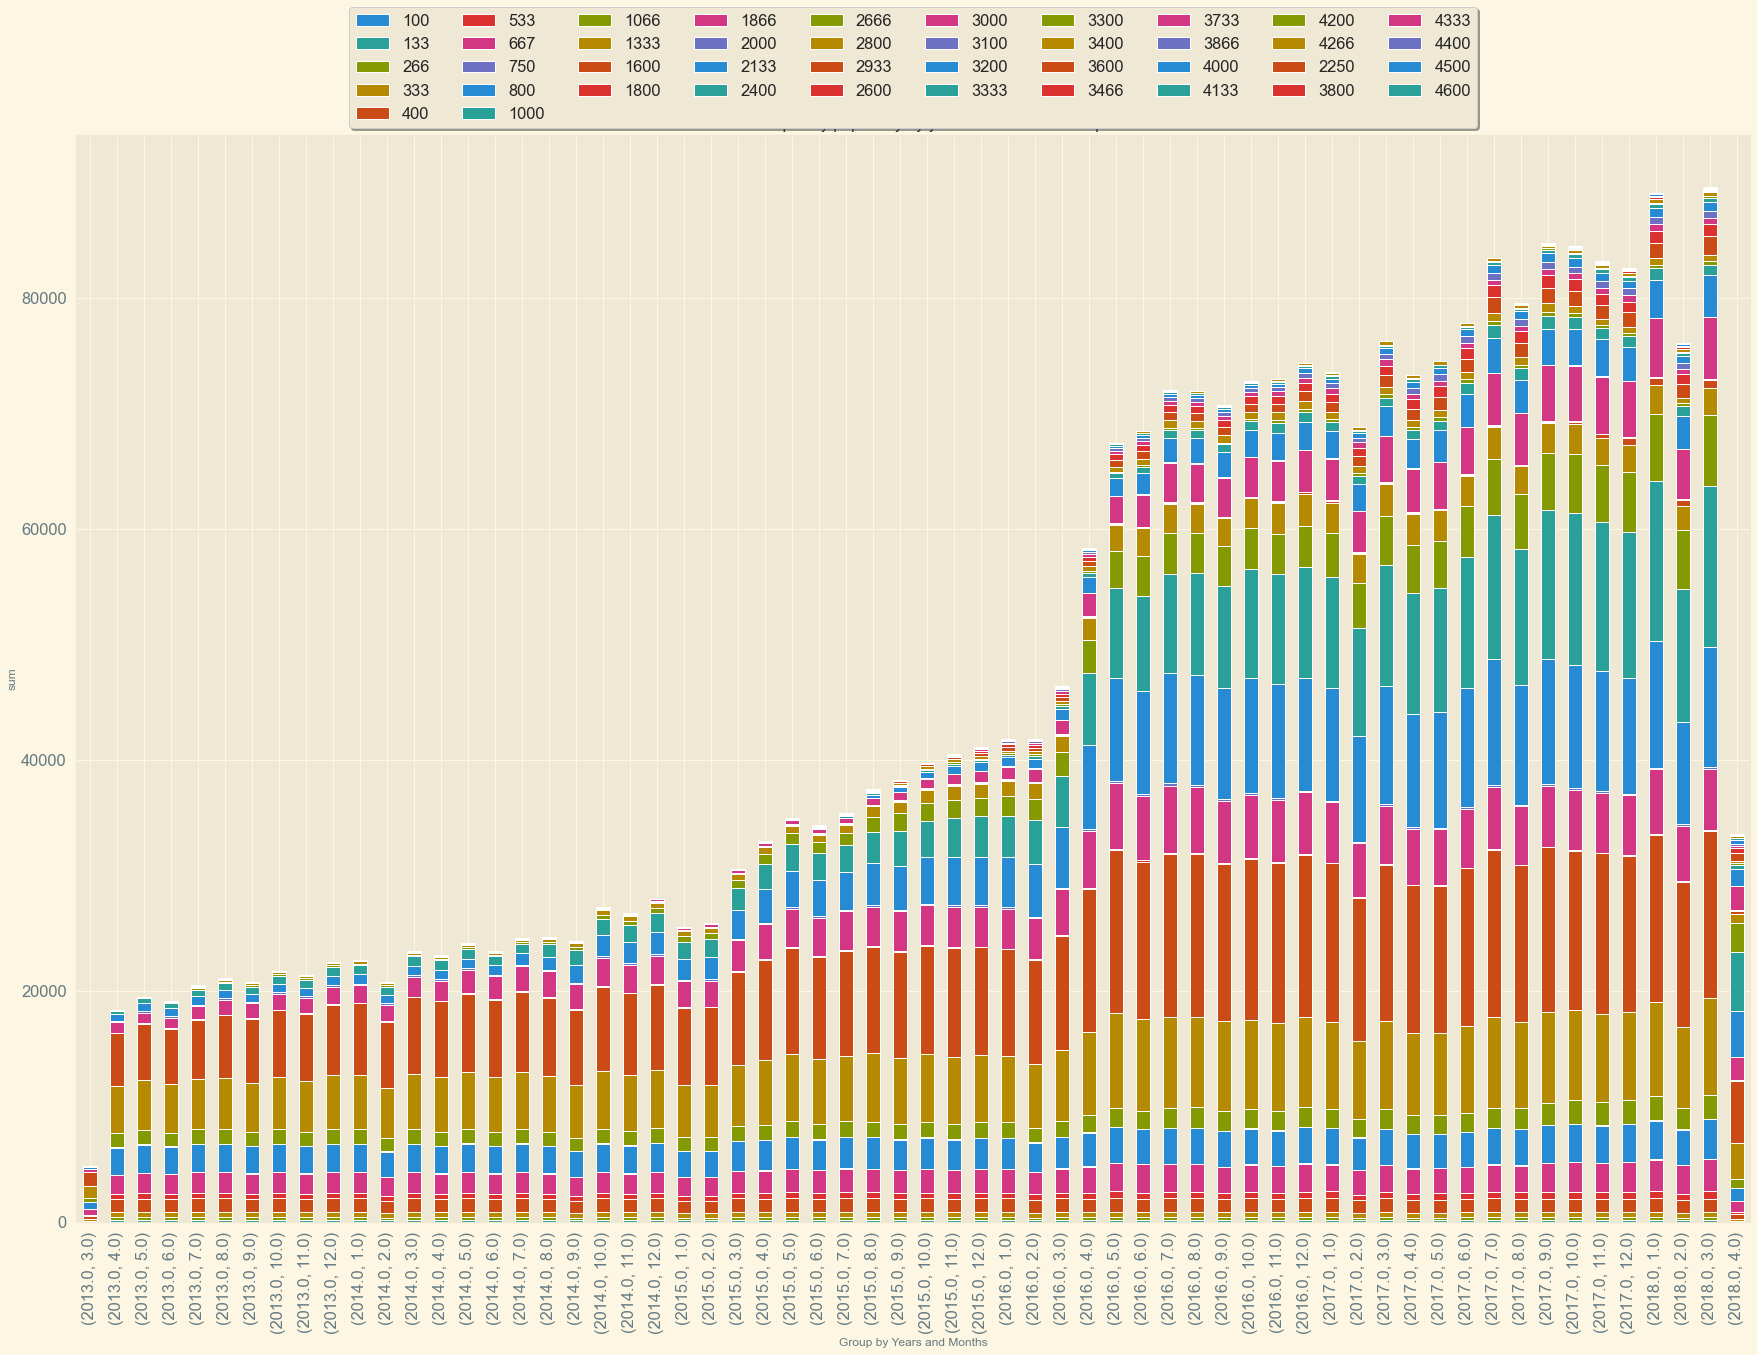

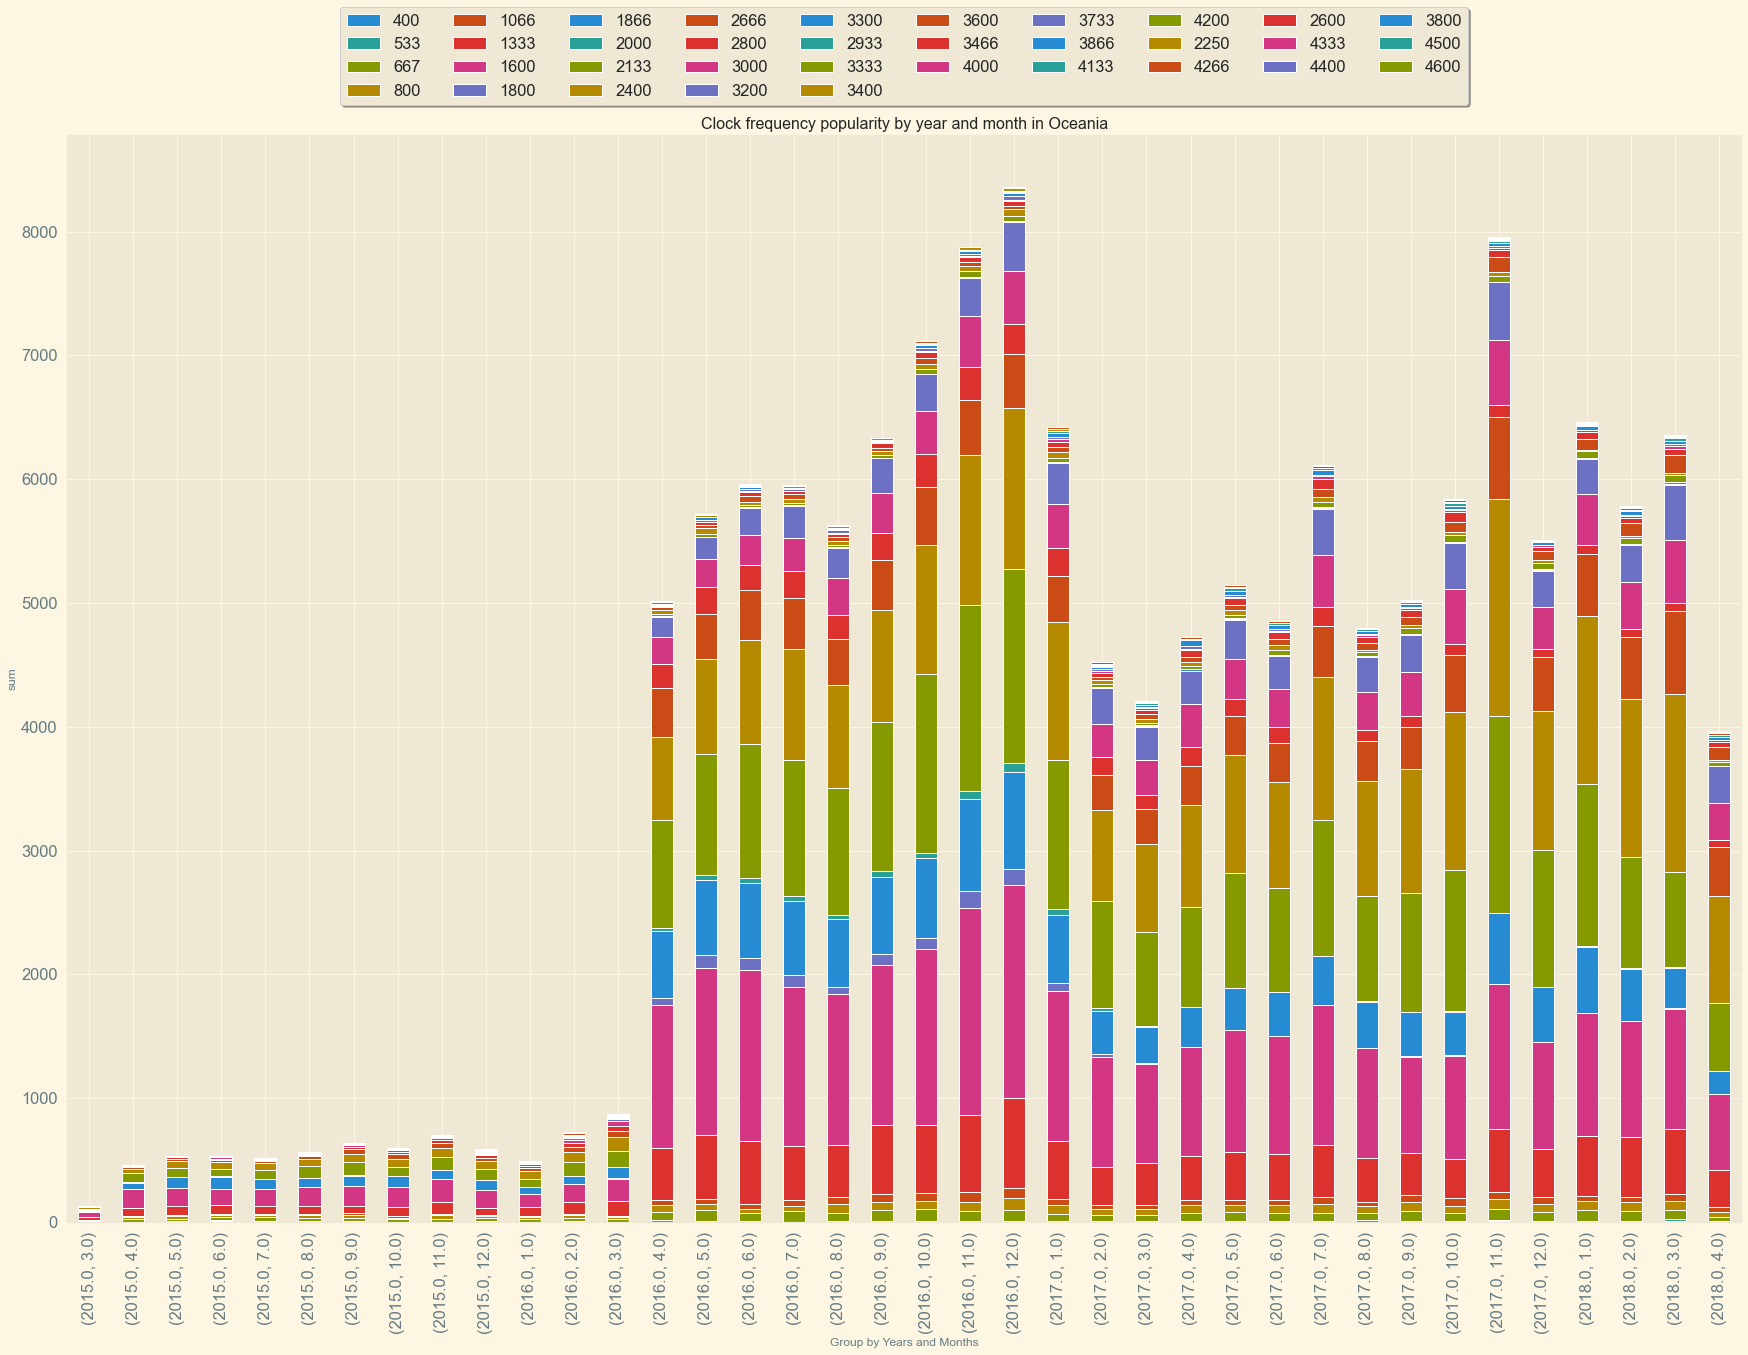

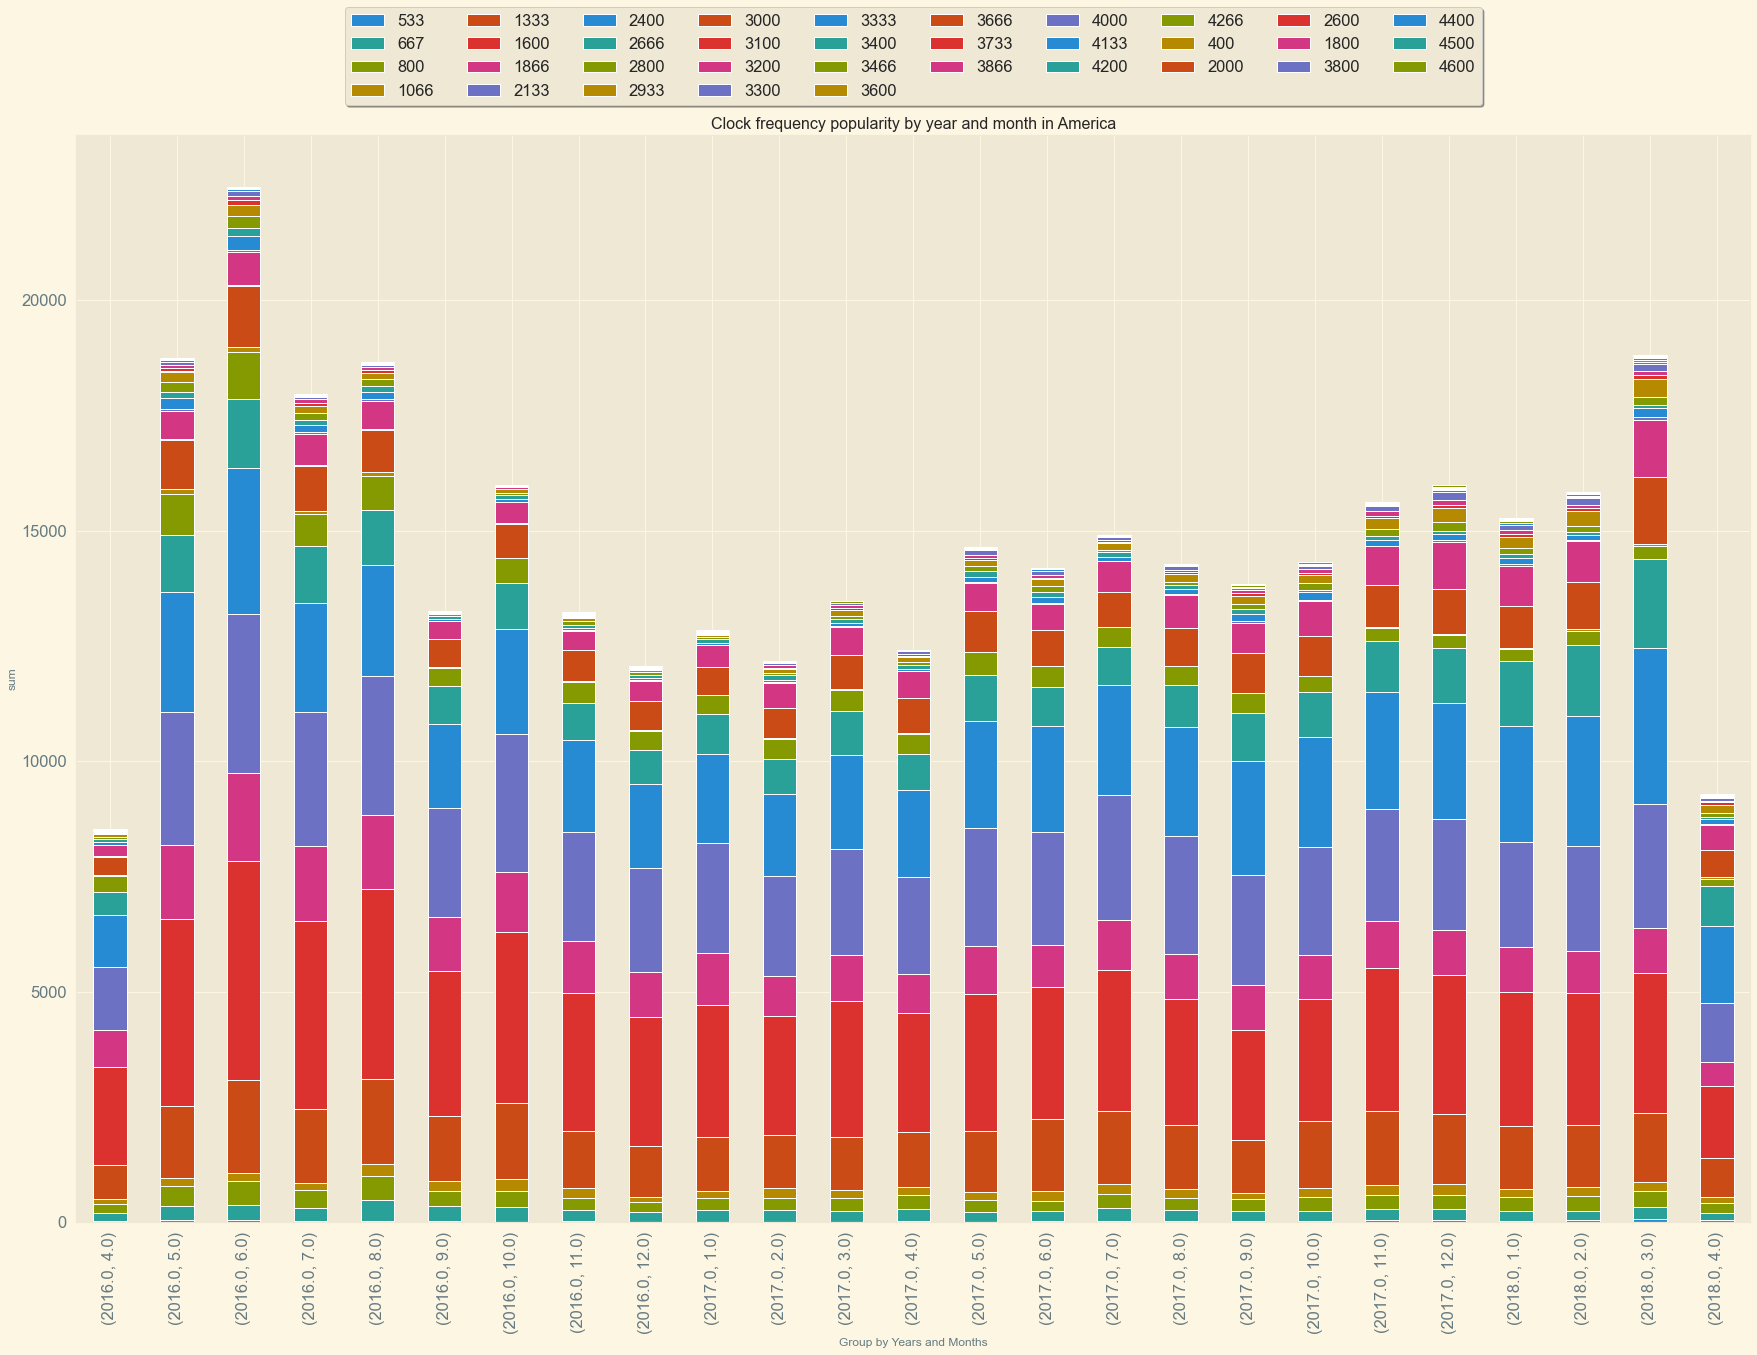

In [50]:
plt.rcParams["figure.figsize"] = [30,20]
focus='clock'
for x in df_join.continent.unique():
    df2=df_join[df_join.continent==x]
    df1 = df_join.groupby([df2.time_code.dt.year , df2.time_code.dt.month,focus]).count().unstack()
    plt.style.use('Solarize_Light2')

    df1["time_code"].plot(kind="bar", stacked=True)


    #df_dropped.groupby([df_dropped.time_code.dt.year , df_dropped.time_code.dt.month])["continent"].nunique().plot(kind="bar", title="test", stacked=True)
    plt.title('Clock frequency popularity by year and month in '+x)
    plt.xticks(rotation=90, horizontalalignment="center")

    plt.xlabel("Group by Years and Months")
    plt.ylabel("sum")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.125),
          ncol=int(df_join[focus].nunique()/4), fancybox=True, shadow=True)


    #df1.plot(figsize=(20, 5))
    #plt.savefig('Contxsell')
    plt.show()

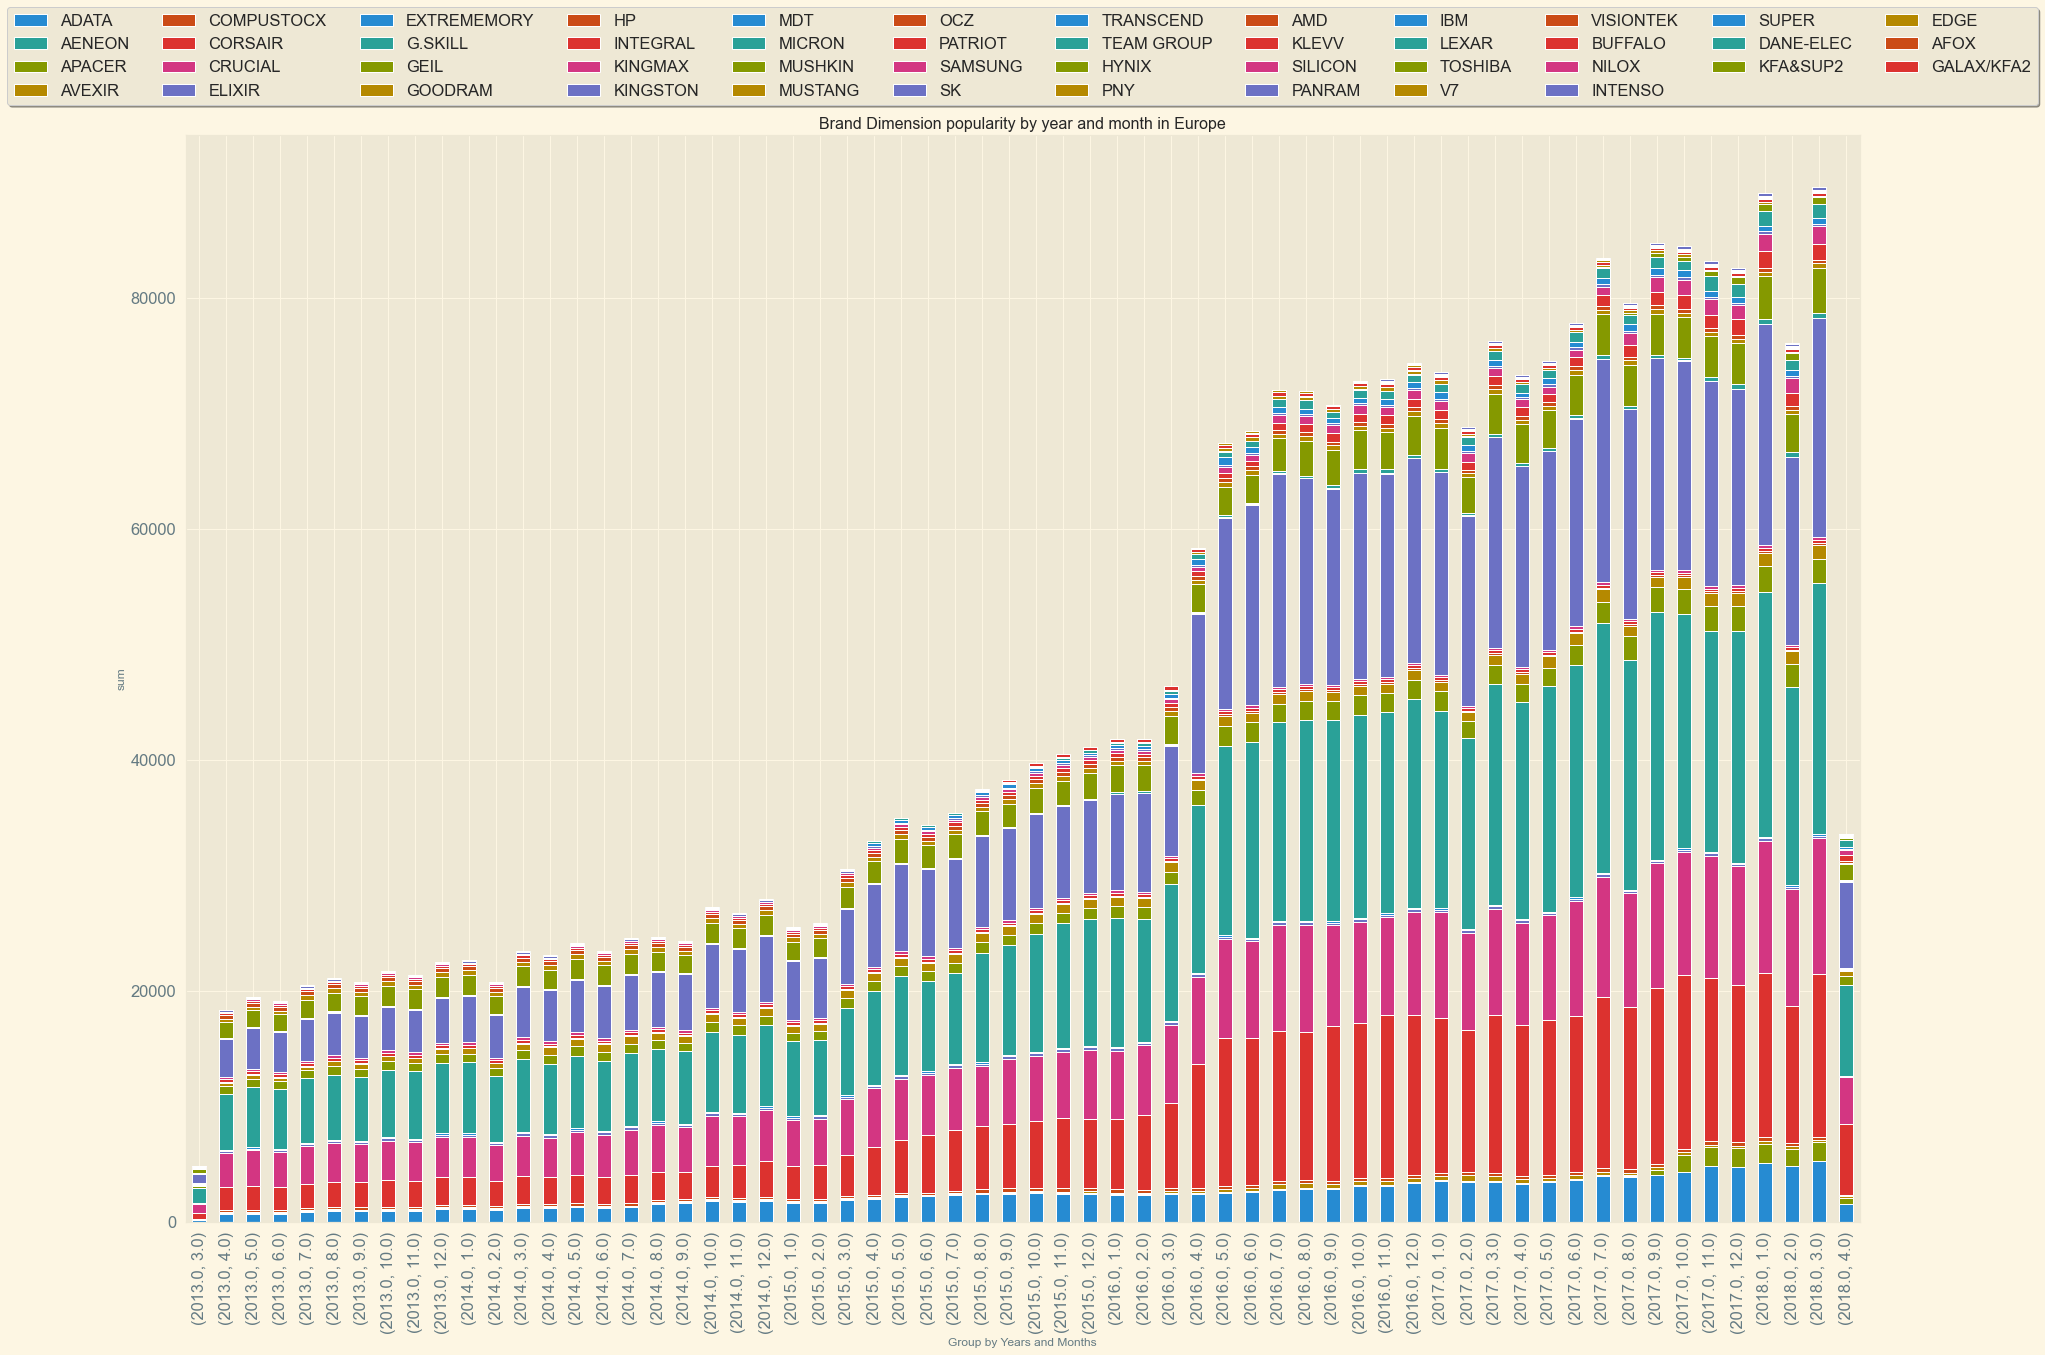

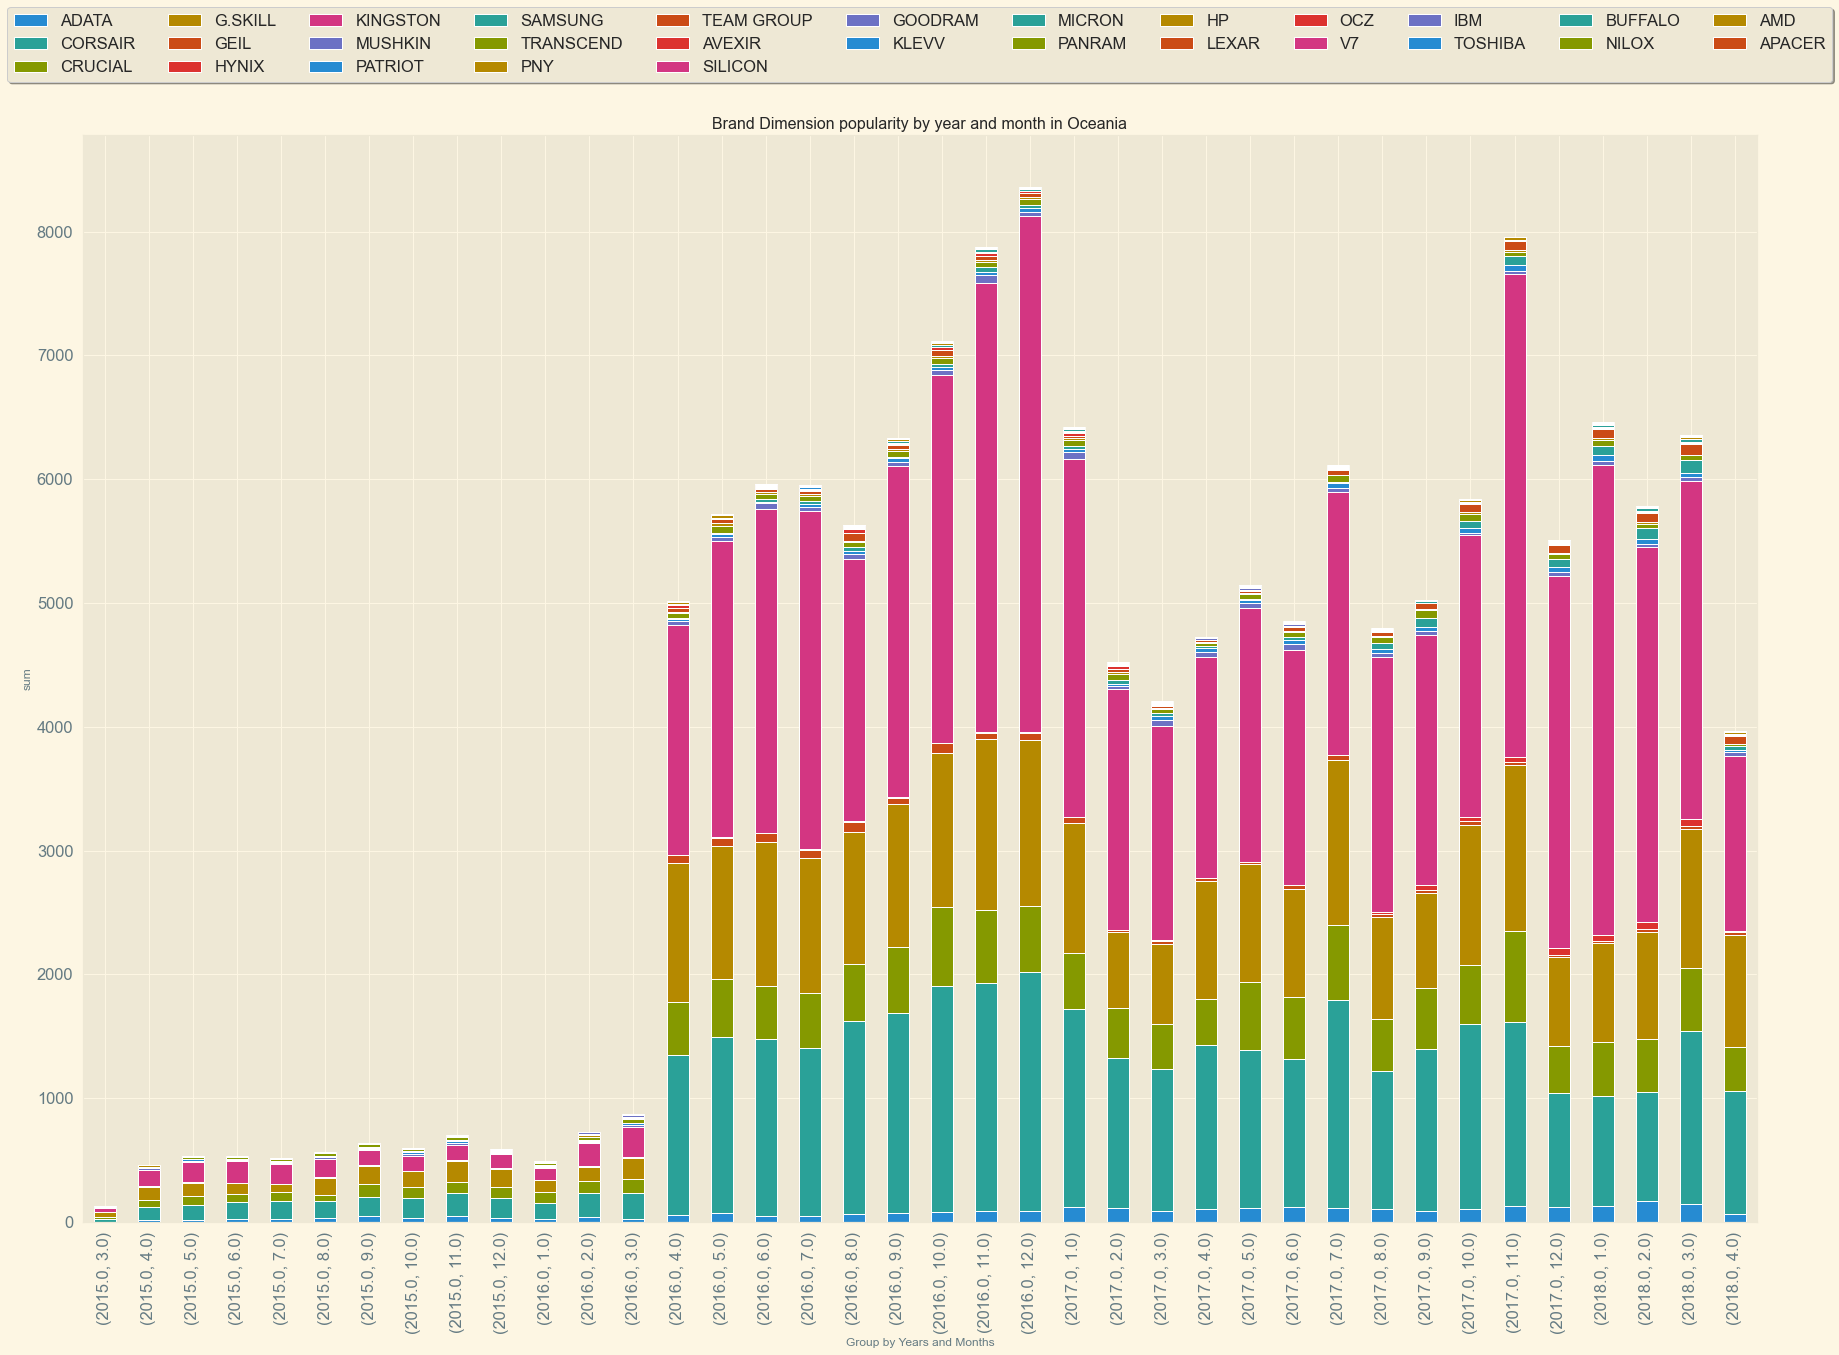

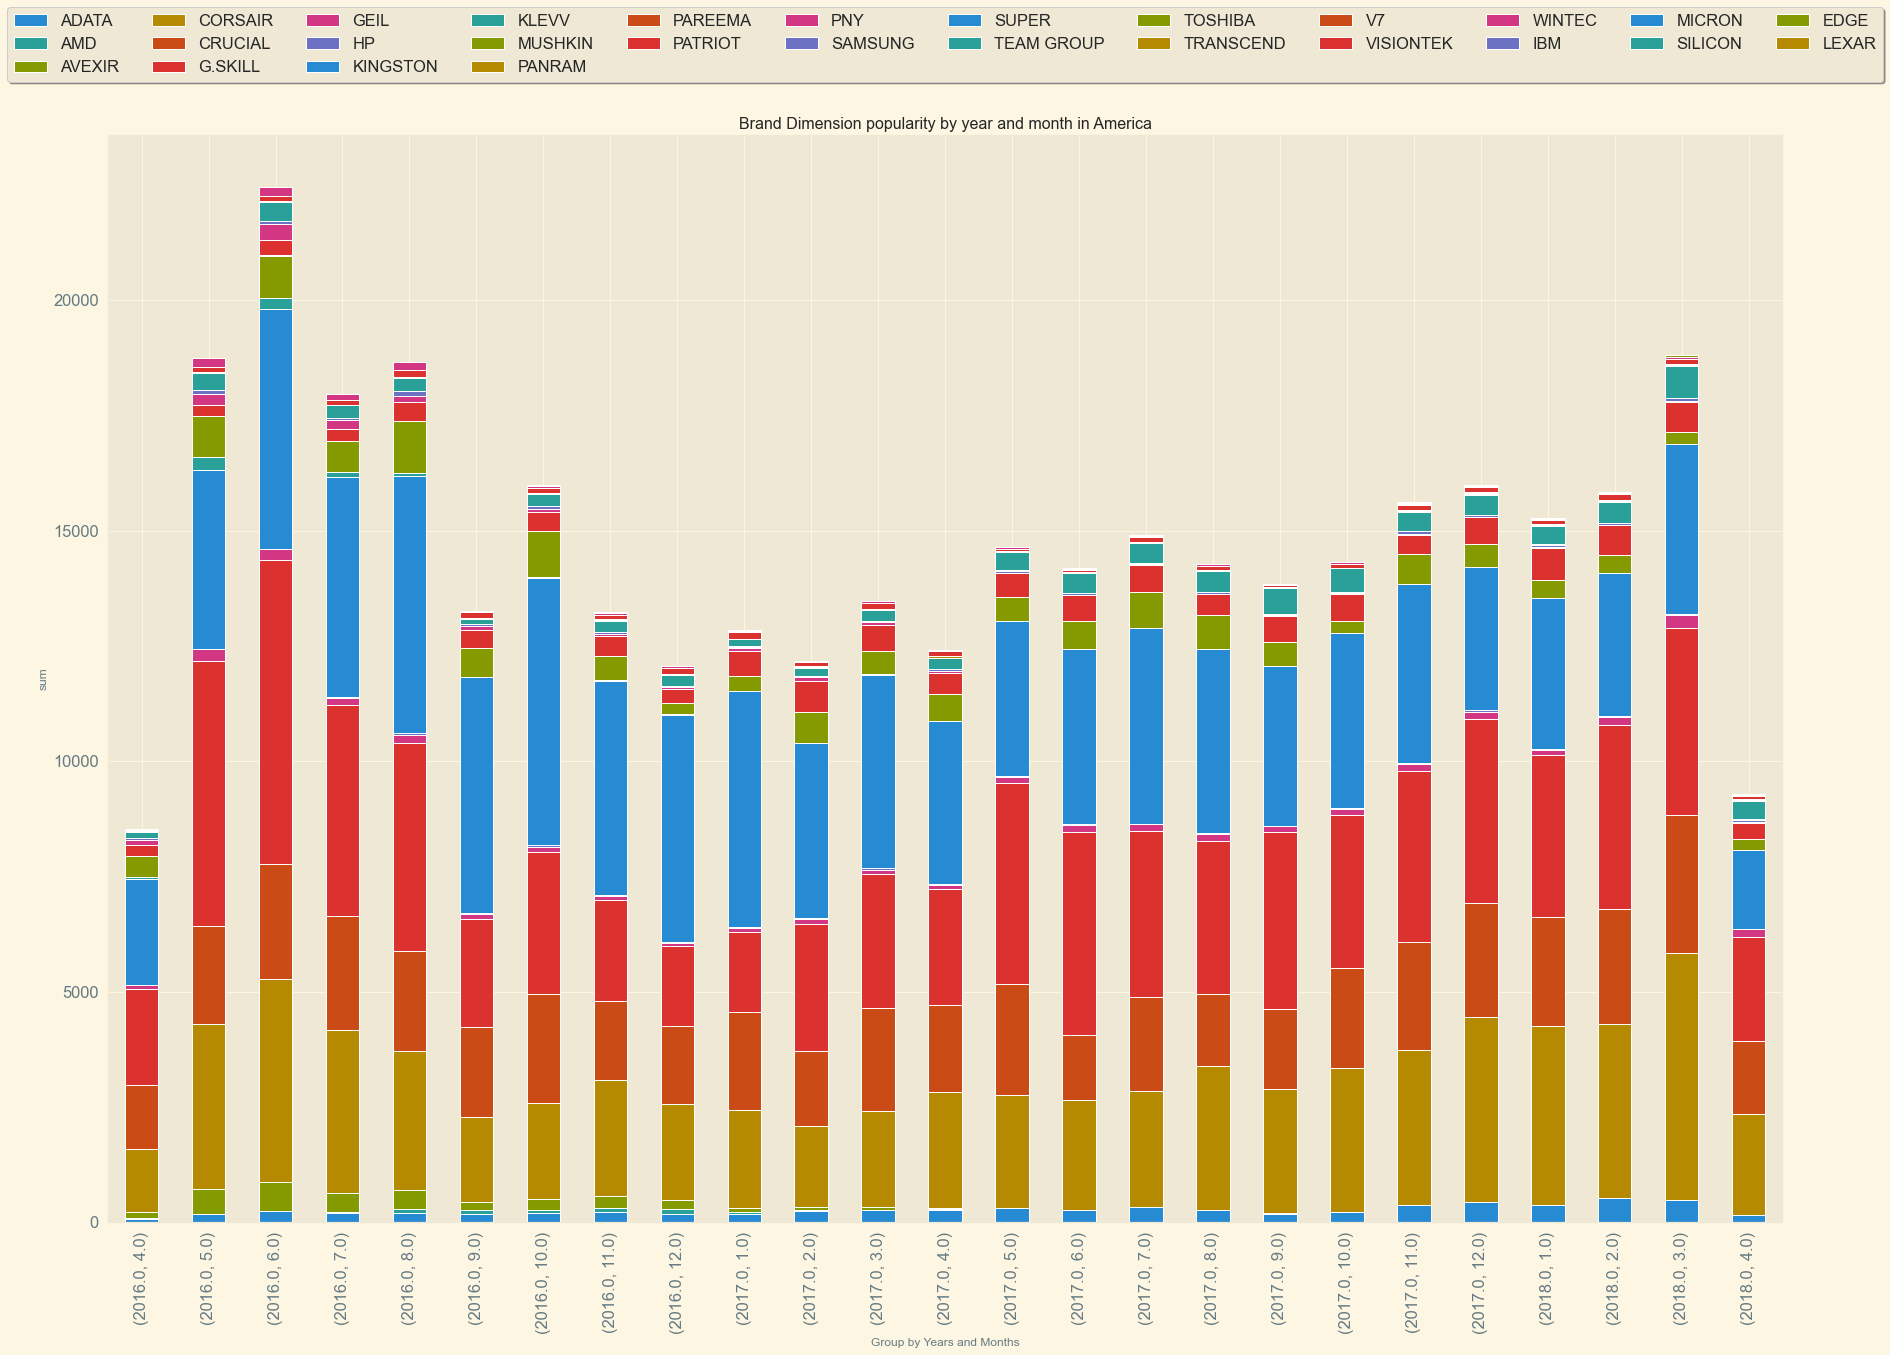

In [51]:
plt.rcParams["figure.figsize"] = [30,20]
focus='brand'
for x in df_join.continent.unique():
    df2=df_join[df_join.continent==x]
    df1 = df_join.groupby([df2.time_code.dt.year , df2.time_code.dt.month,focus]).count().unstack()
    plt.style.use('Solarize_Light2')

    df1["time_code"].plot(kind="bar", stacked=True)


    #df_dropped.groupby([df_dropped.time_code.dt.year , df_dropped.time_code.dt.month])["continent"].nunique().plot(kind="bar", title="test", stacked=True)
    plt.title('Brand Dimension popularity by year and month in '+x)
    plt.xticks(rotation=90, horizontalalignment="center")

    plt.xlabel("Group by Years and Months")
    plt.ylabel("sum")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.125),
          ncol=int(df_join[focus].nunique()/4), fancybox=True, shadow=True)


    #df1.plot(figsize=(20, 5))
    #plt.savefig('Contxsell')
    plt.show()

In [33]:
df_join.head()

id_ram  time_code  sales_usd  sales_currency  brand ram_model  memory_dim  \
0   3719 2013-03-22      13.75           10.65  ADATA     Adata        0.50   
1   3719 2013-03-23      13.83           10.65  ADATA     Adata        0.50   
2   3719 2013-03-26      13.69           10.65  ADATA     Adata        0.50   
3   3719 2013-03-27      13.69           10.65  ADATA     Adata        0.50   
4   3719 2013-03-28      13.61           10.65  ADATA     Adata        0.50   

  memory_type  clock            vendor continent  country  \
0         DDR    400  geizhals_unknown    Europe  Germany   
1         DDR    400  geizhals_unknown    Europe  Germany   
2         DDR    400  geizhals_unknown    Europe  Germany   
3         DDR    400  geizhals_unknown    Europe  Germany   
4         DDR    400  geizhals_unknown    Europe  Germany   

                   region currency  month  week  
0  north rhine-westphalla      EUR      3    12  
1                  berlin      EUR      3    12  
2                  saxony      EUR      3    13  
3  north rhine-westphalla      EUR      3    13  
4                saarland      EUR      3    13

In [34]:
price_conversion=[]
tmp1=df_join.sales_usd.tolist()
tmp2=df_join.sales_currency.tolist()
for index,x in enumerate(tmp1):
    price_conversion.append(x/tmp2[index])
df_join['conversion_rate']=price_conversion
df_join.head()

id_ram  time_code  sales_usd  sales_currency  brand ram_model  memory_dim  \
0   3719 2013-03-22      13.75           10.65  ADATA     Adata        0.50   
1   3719 2013-03-23      13.83           10.65  ADATA     Adata        0.50   
2   3719 2013-03-26      13.69           10.65  ADATA     Adata        0.50   
3   3719 2013-03-27      13.69           10.65  ADATA     Adata        0.50   
4   3719 2013-03-28      13.61           10.65  ADATA     Adata        0.50   

  memory_type  clock            vendor continent  country  \
0         DDR    400  geizhals_unknown    Europe  Germany   
1         DDR    400  geizhals_unknown    Europe  Germany   
2         DDR    400  geizhals_unknown    Europe  Germany   
3         DDR    400  geizhals_unknown    Europe  Germany   
4         DDR    400  geizhals_unknown    Europe  Germany   

                   region currency  month  week  conversion_rate  
0  north rhine-westphalla      EUR      3    12             1.29  
1                  berlin      EUR      3    12             1.30  
2                  saxony      EUR      3    13             1.29  
3  north rhine-westphalla      EUR      3    13             1.29  
4                saarland      EUR      3    13             1.28

PLOTTING FOR: conversion_rate


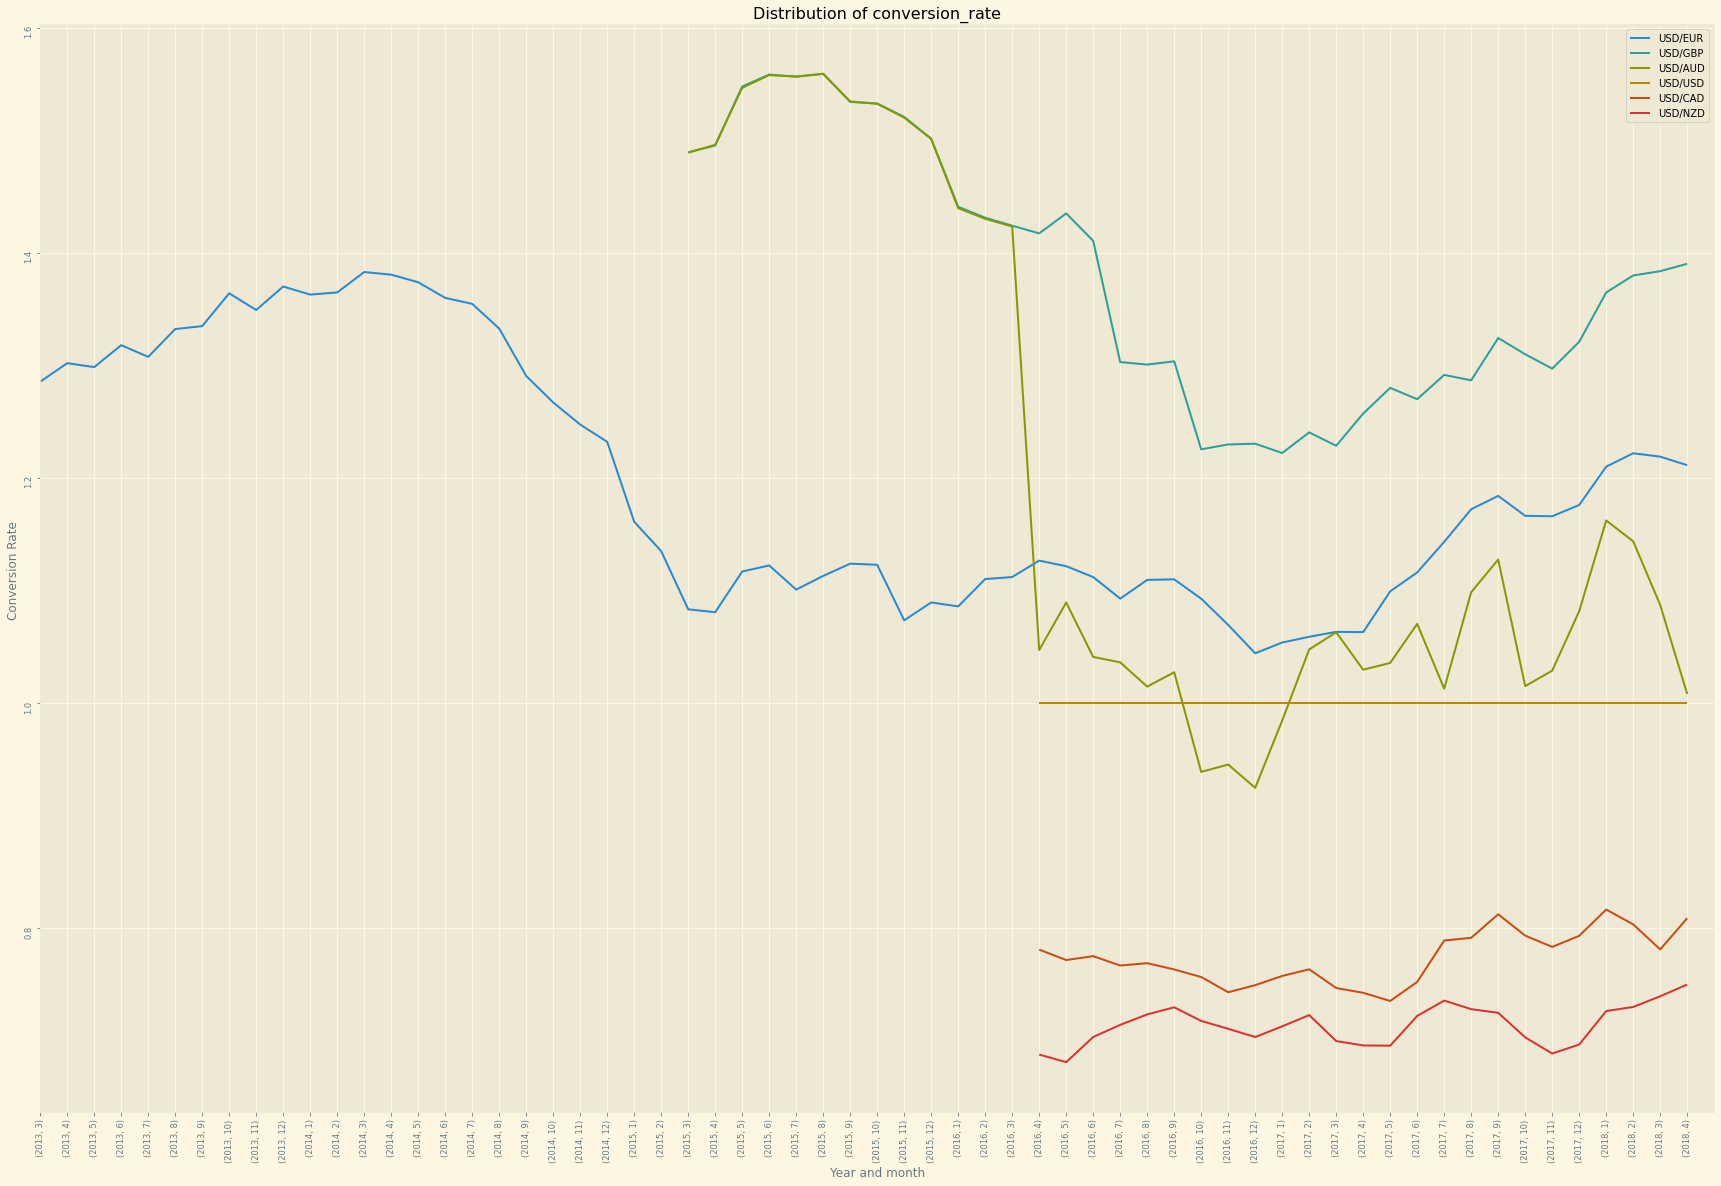

In [35]:
focus='conversion_rate'
print("PLOTTING FOR: "+focus)

plt.style.use('Solarize_Light2')
test=df_join.currency.unique()
#print(test)
plt.title("Distribution of "+focus)
plt.xlim([0,len(legend)])
plt.xlabel("Year and month")
plt.ylabel("Conversion Rate ")

plt.xticks(np.arange(len(legend)),legend)
plt.tick_params(labelrotation=90, labelsize='small')

#print('legend len:'+str(len(legend)))

for x in test:
    tmp=df_join[df_join['currency']==x]
    #tmp.groupby([df_join.year, df_join.month])[focus].count().plot()
    tmp2=tmp.groupby([df_join.time_code.dt.year, df_join.month]).mean()
    minyear=tmp2.index.get_level_values('time_code').min()
    minmonth=tmp2[tmp2.index.get_level_values('time_code')==minyear]
    minmonth=minmonth.index.get_level_values('month').min()
    index=(minyear,minmonth)
    num_index=legend.index(index)
    values=tmp2['conversion_rate'].tolist()
    #print(values)
    #print(num_index)
    plt.plot(np.arange(num_index,len(values)+num_index),values)
    #print(len(tmp.groupby([df_join.year, df_join.month])[focus].count().values.tolist()))
    
print_legend=[]
for x in test:
    print_legend.append('USD/'+x)
plt.legend(print_legend)
plt.show()

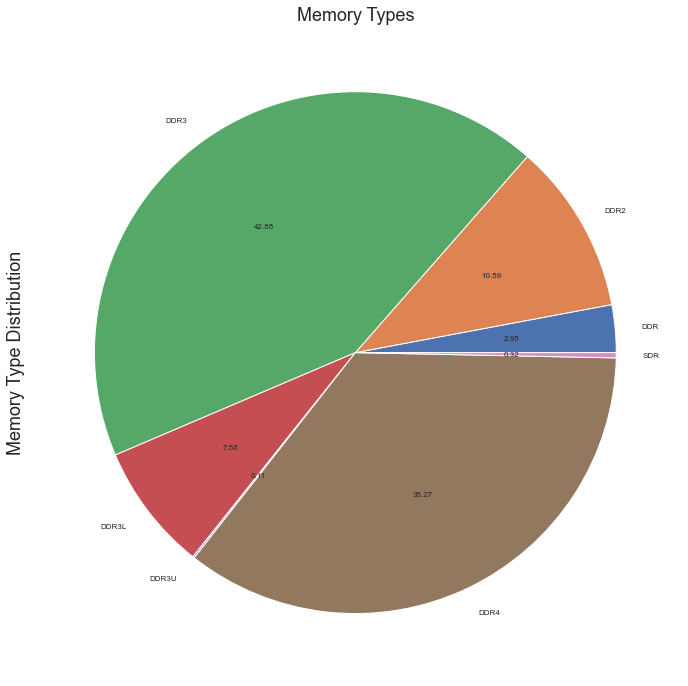

In [36]:
sns.set(font_scale=1.5)
class_series = df_join.groupby('memory_type').size()
class_series.name = 'Memory Type Distribution'
class_series.plot.pie(autopct='%.2f', figsize = (12,12), fontsize=(8))
plt.title('Memory Types')

plt.show()

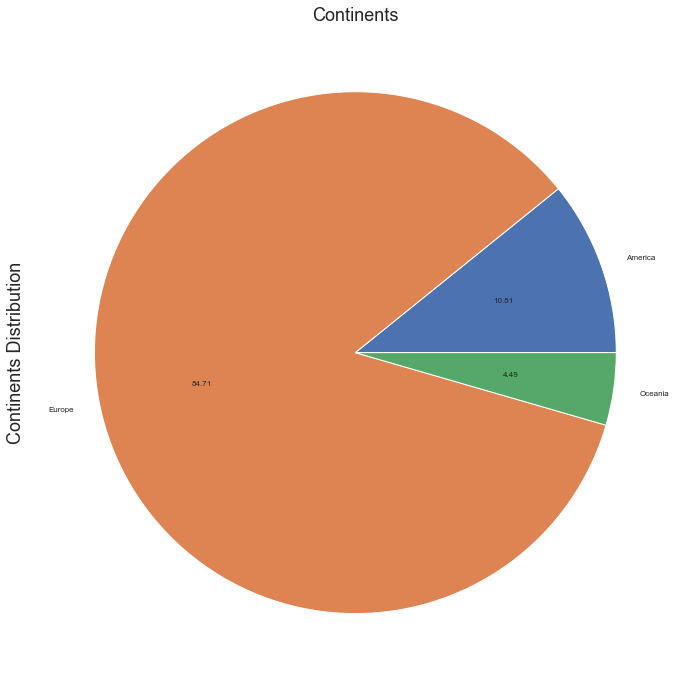

In [37]:
sns.set(font_scale=1.5)
class_series = df_join.groupby('continent').size()
class_series.name = 'Continents Distribution'
class_series.plot.pie(autopct='%.2f', figsize = (12,12), fontsize=(8))
plt.title('Continents')

plt.show()

In [38]:
df_join.country.unique()

array(['Germany', 'Spain', 'United Kingdom', 'Australia',
       'United States of America', 'Canada', 'Italy', 'Ireland', 'France',
       'New Zeland', 'Belgium'], dtype=object)

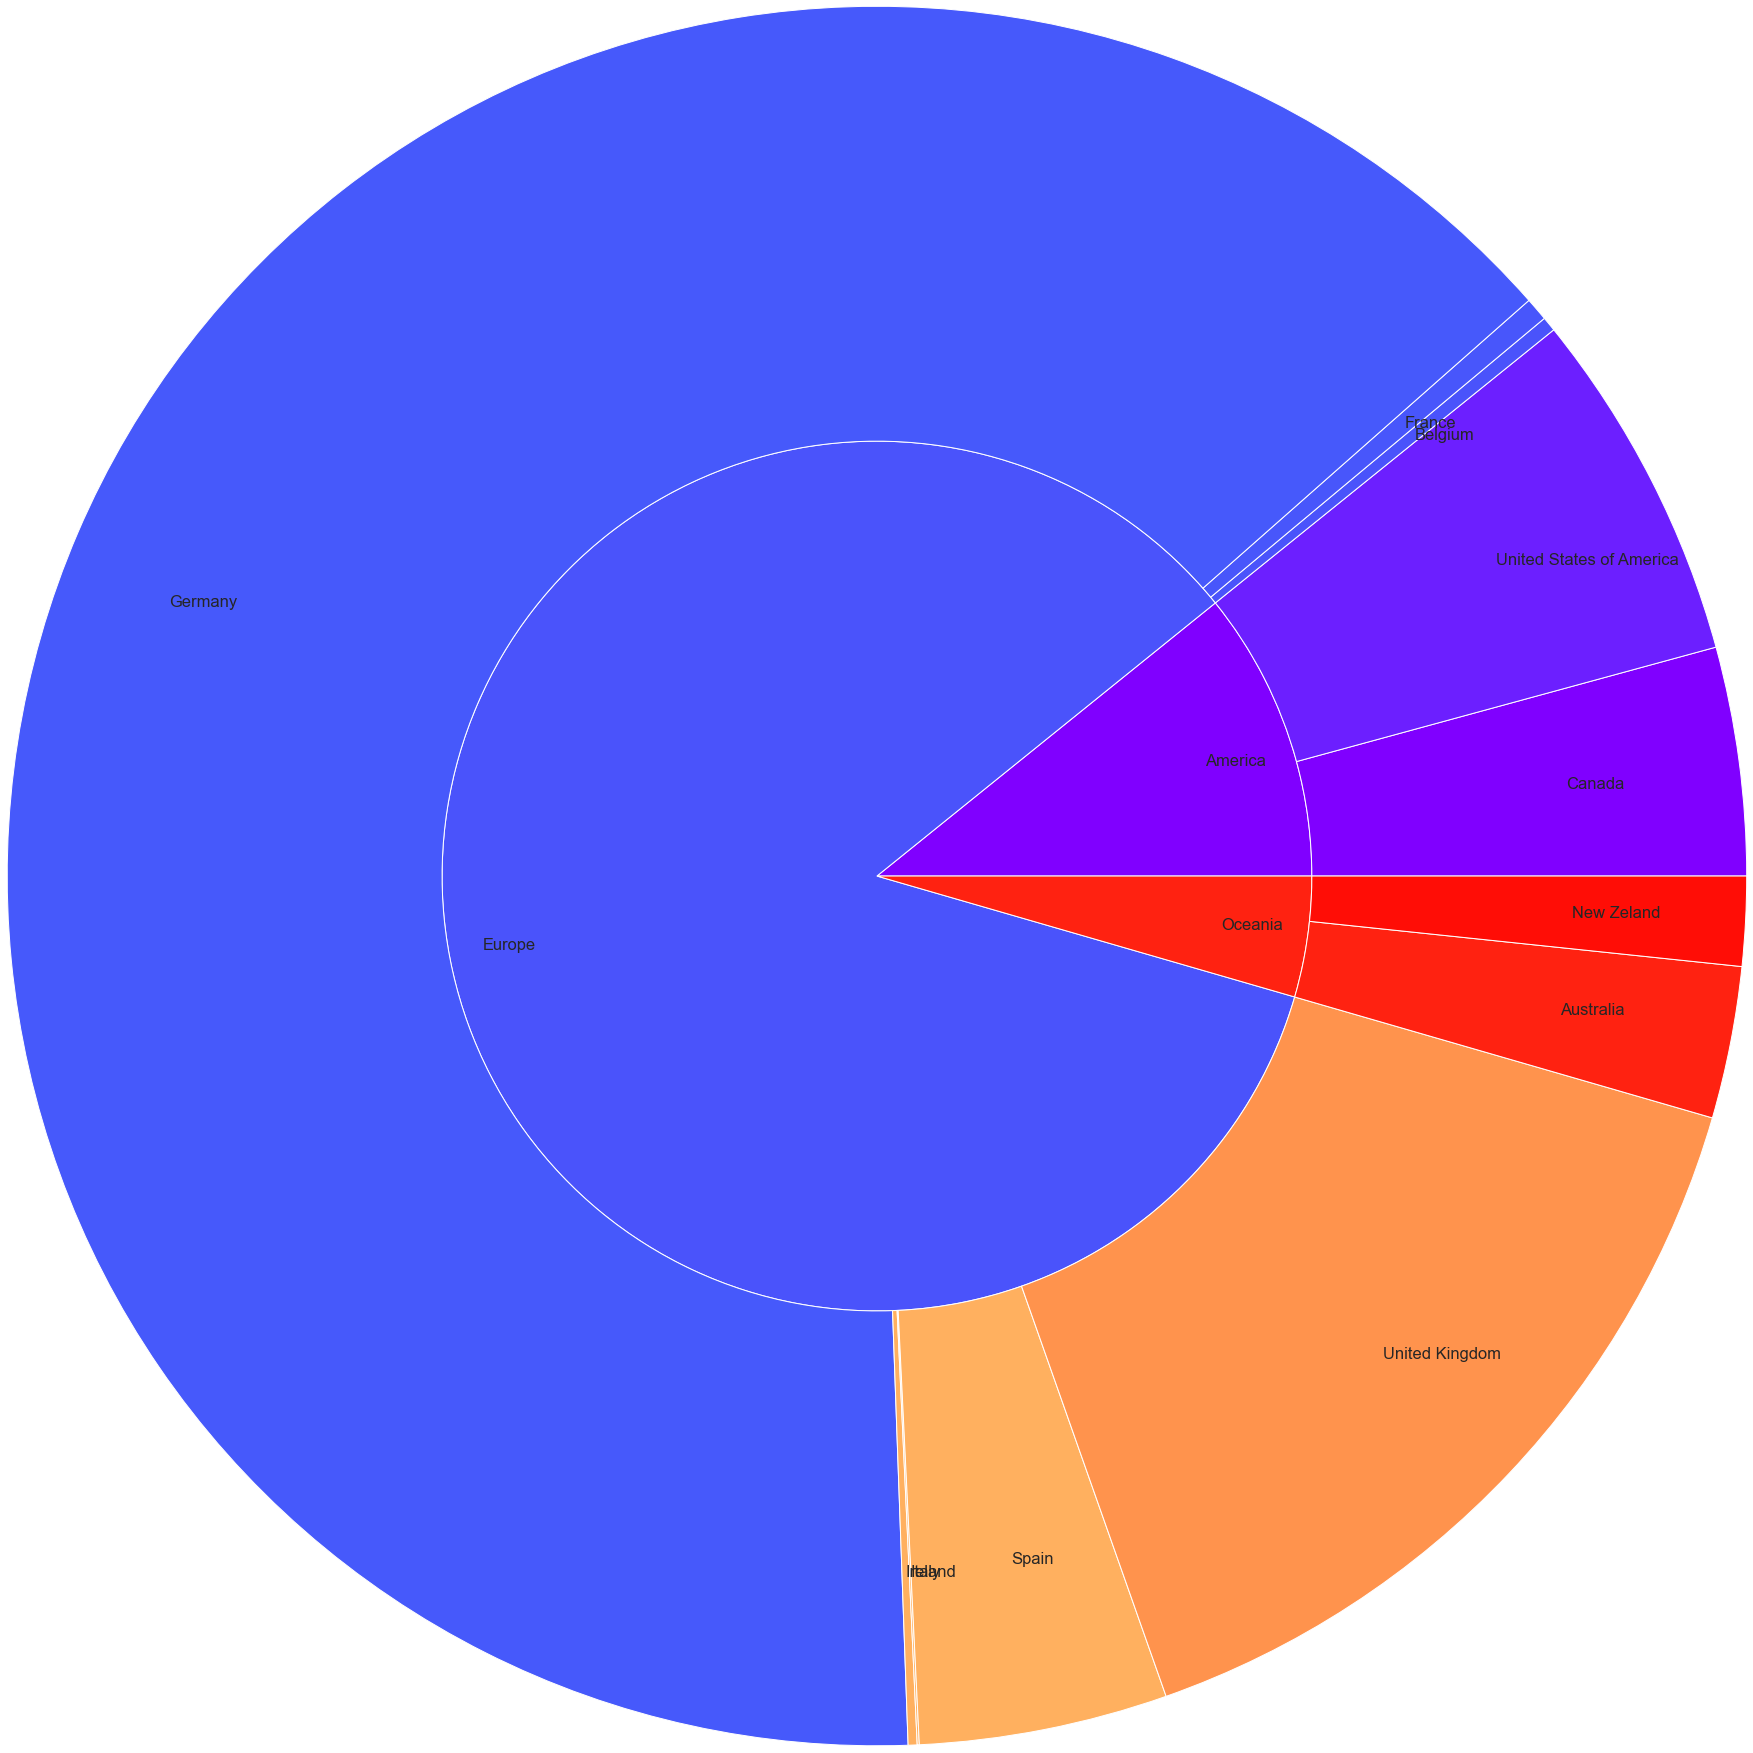

In [46]:
df=df_join
layers = ['continent', 'country']
value = 'amount'
minimum_value = 2 # Skip values less than minimum

df['amount'] = [1 for x in range(len(df))]
city = df['country'].value_counts()
city = city[city > minimum_value]
df_big = df.loc[df['country'].isin(city.index)]   # reject small cities

def percentage_growth(l):
    s = 0
    res = [0]
    for i in range(len(l)-1):
        s += l[i]
        res.append(s / sum(l))
    return res
plt.axis("equal")

cmap = plt.get_cmap("rainbow")

for i, layer in enumerate(layers):
    radius = i +1
    width = 1
    frame = df_big.groupby(layers[:i+1])['amount'].sum()
    colors = cmap(percentage_growth(frame))
    labels = [x[-1] if isinstance(x, tuple) else x for x in frame.index.to_numpy()]
    plt.pie(frame, labels=labels, colors=colors, radius=radius, wedgeprops=dict(width=width, edgecolor='w'), labeldistance=0.8)

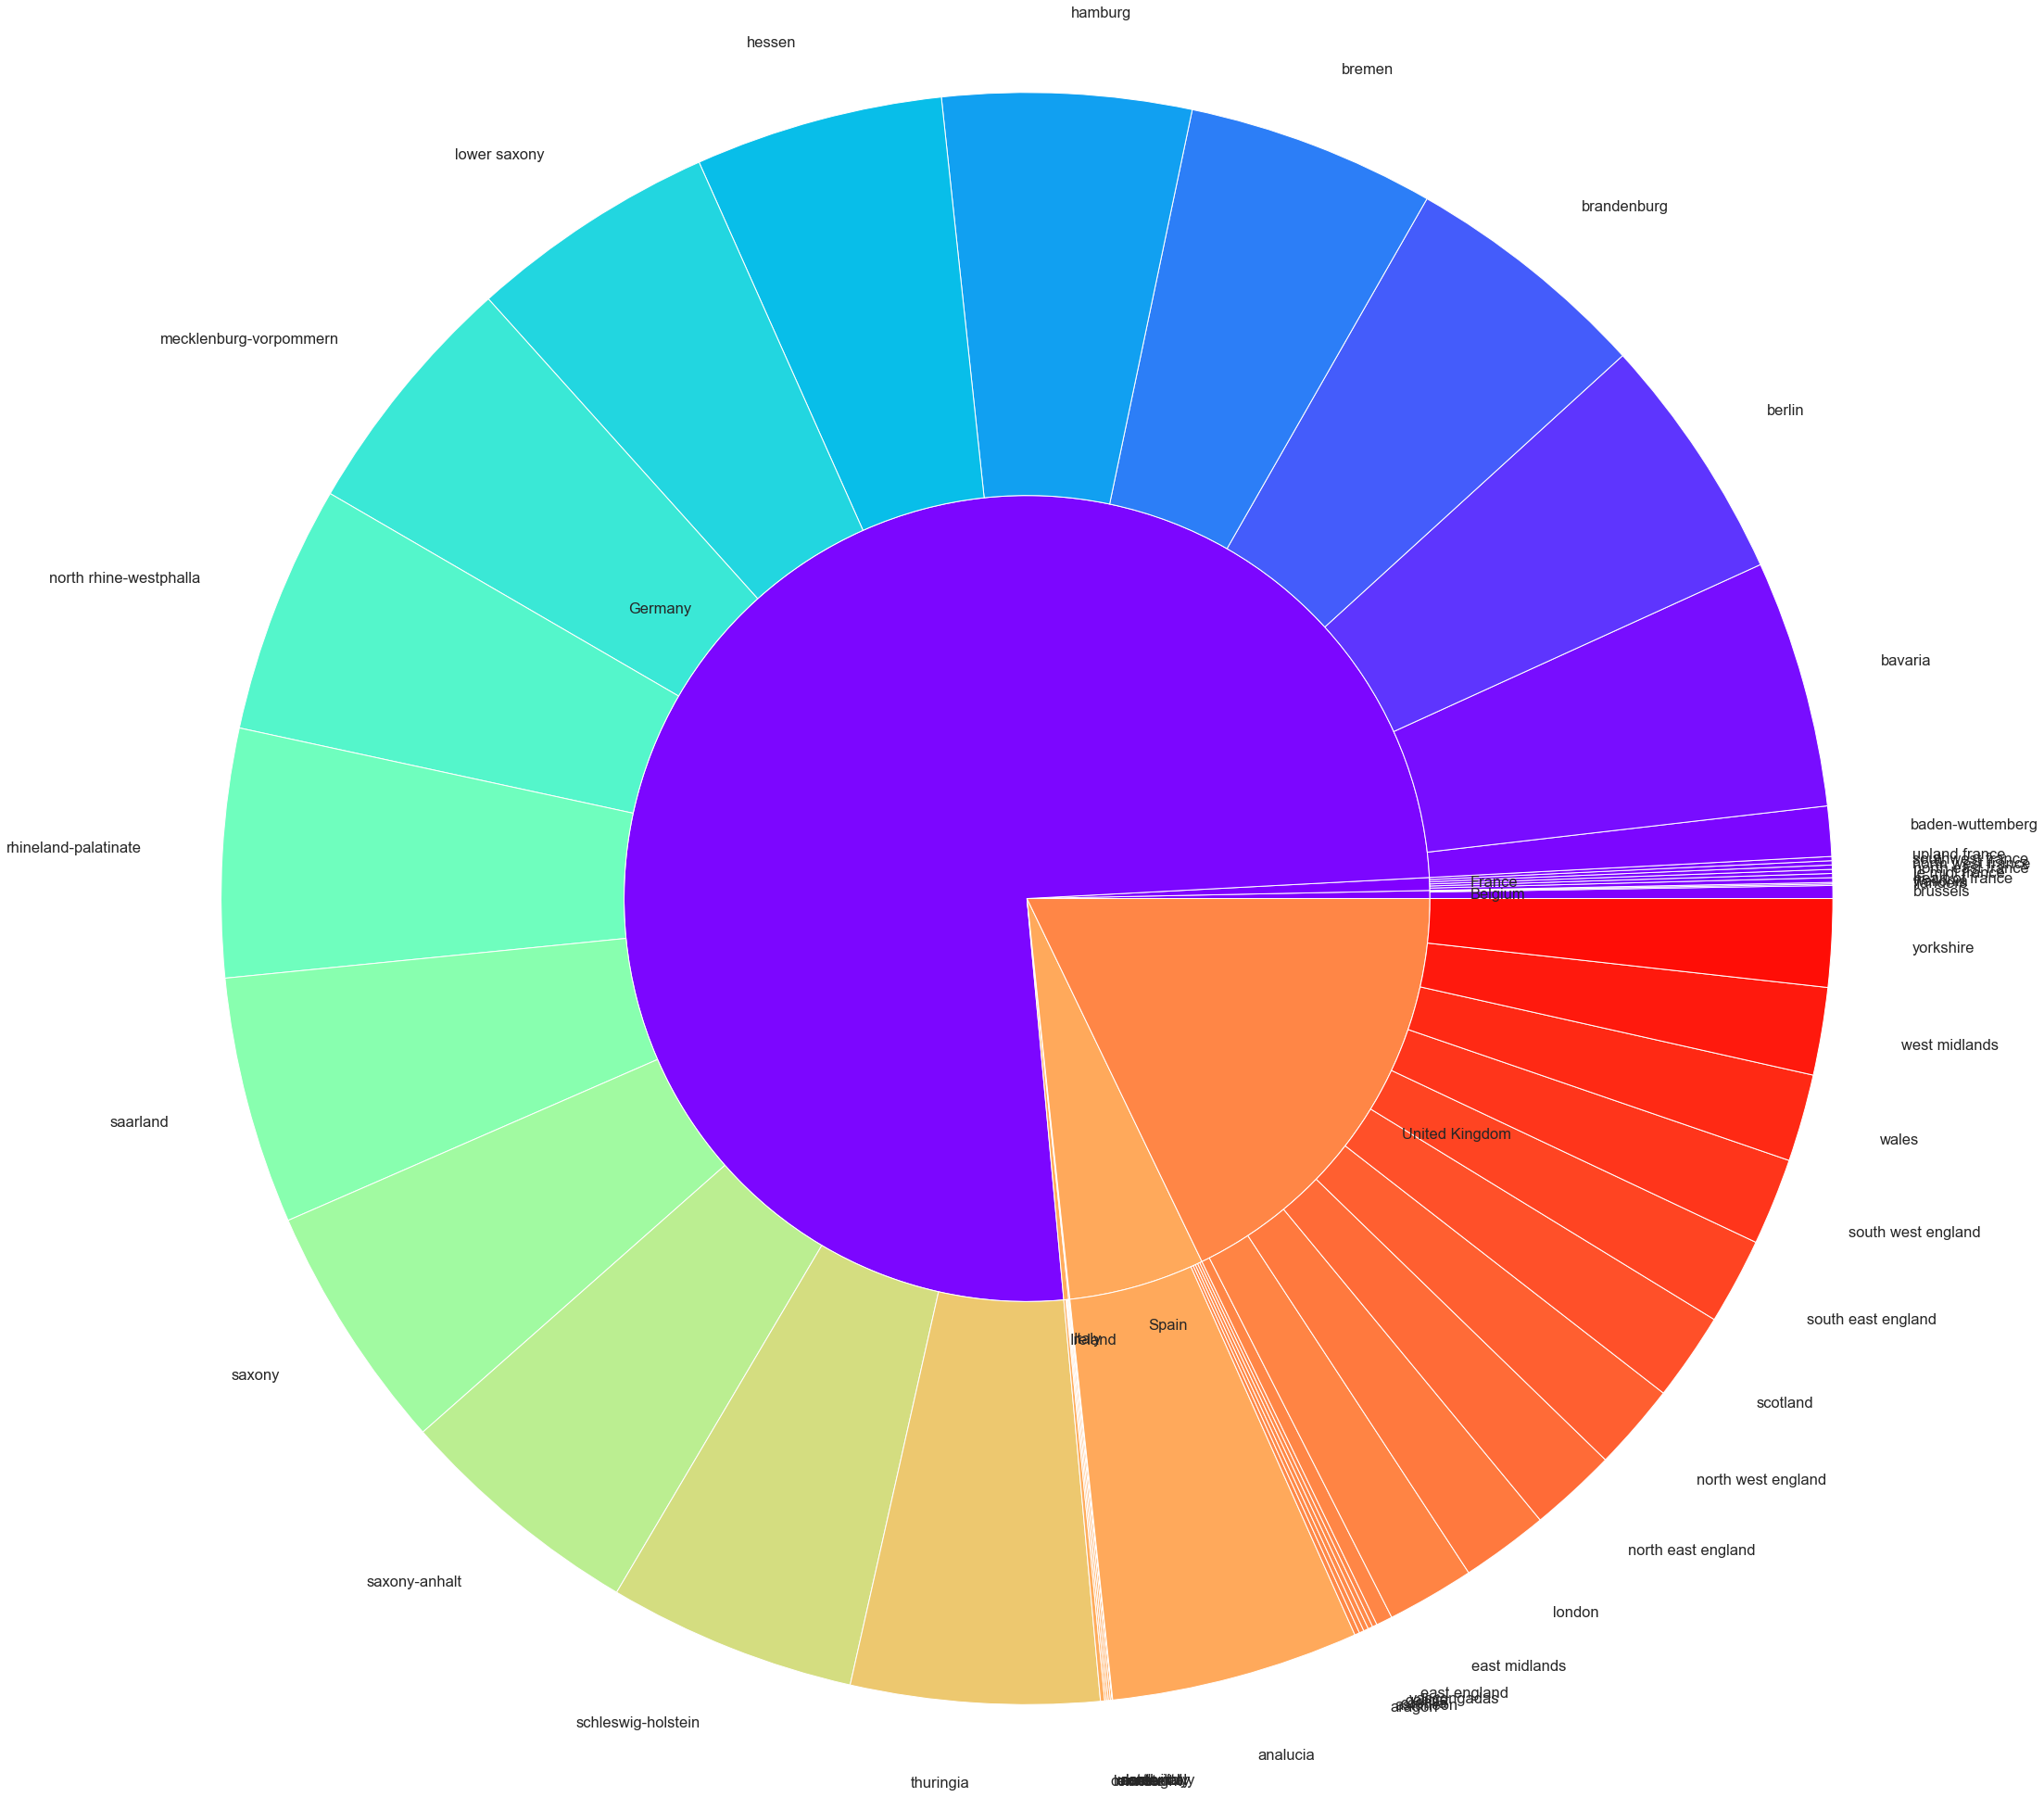

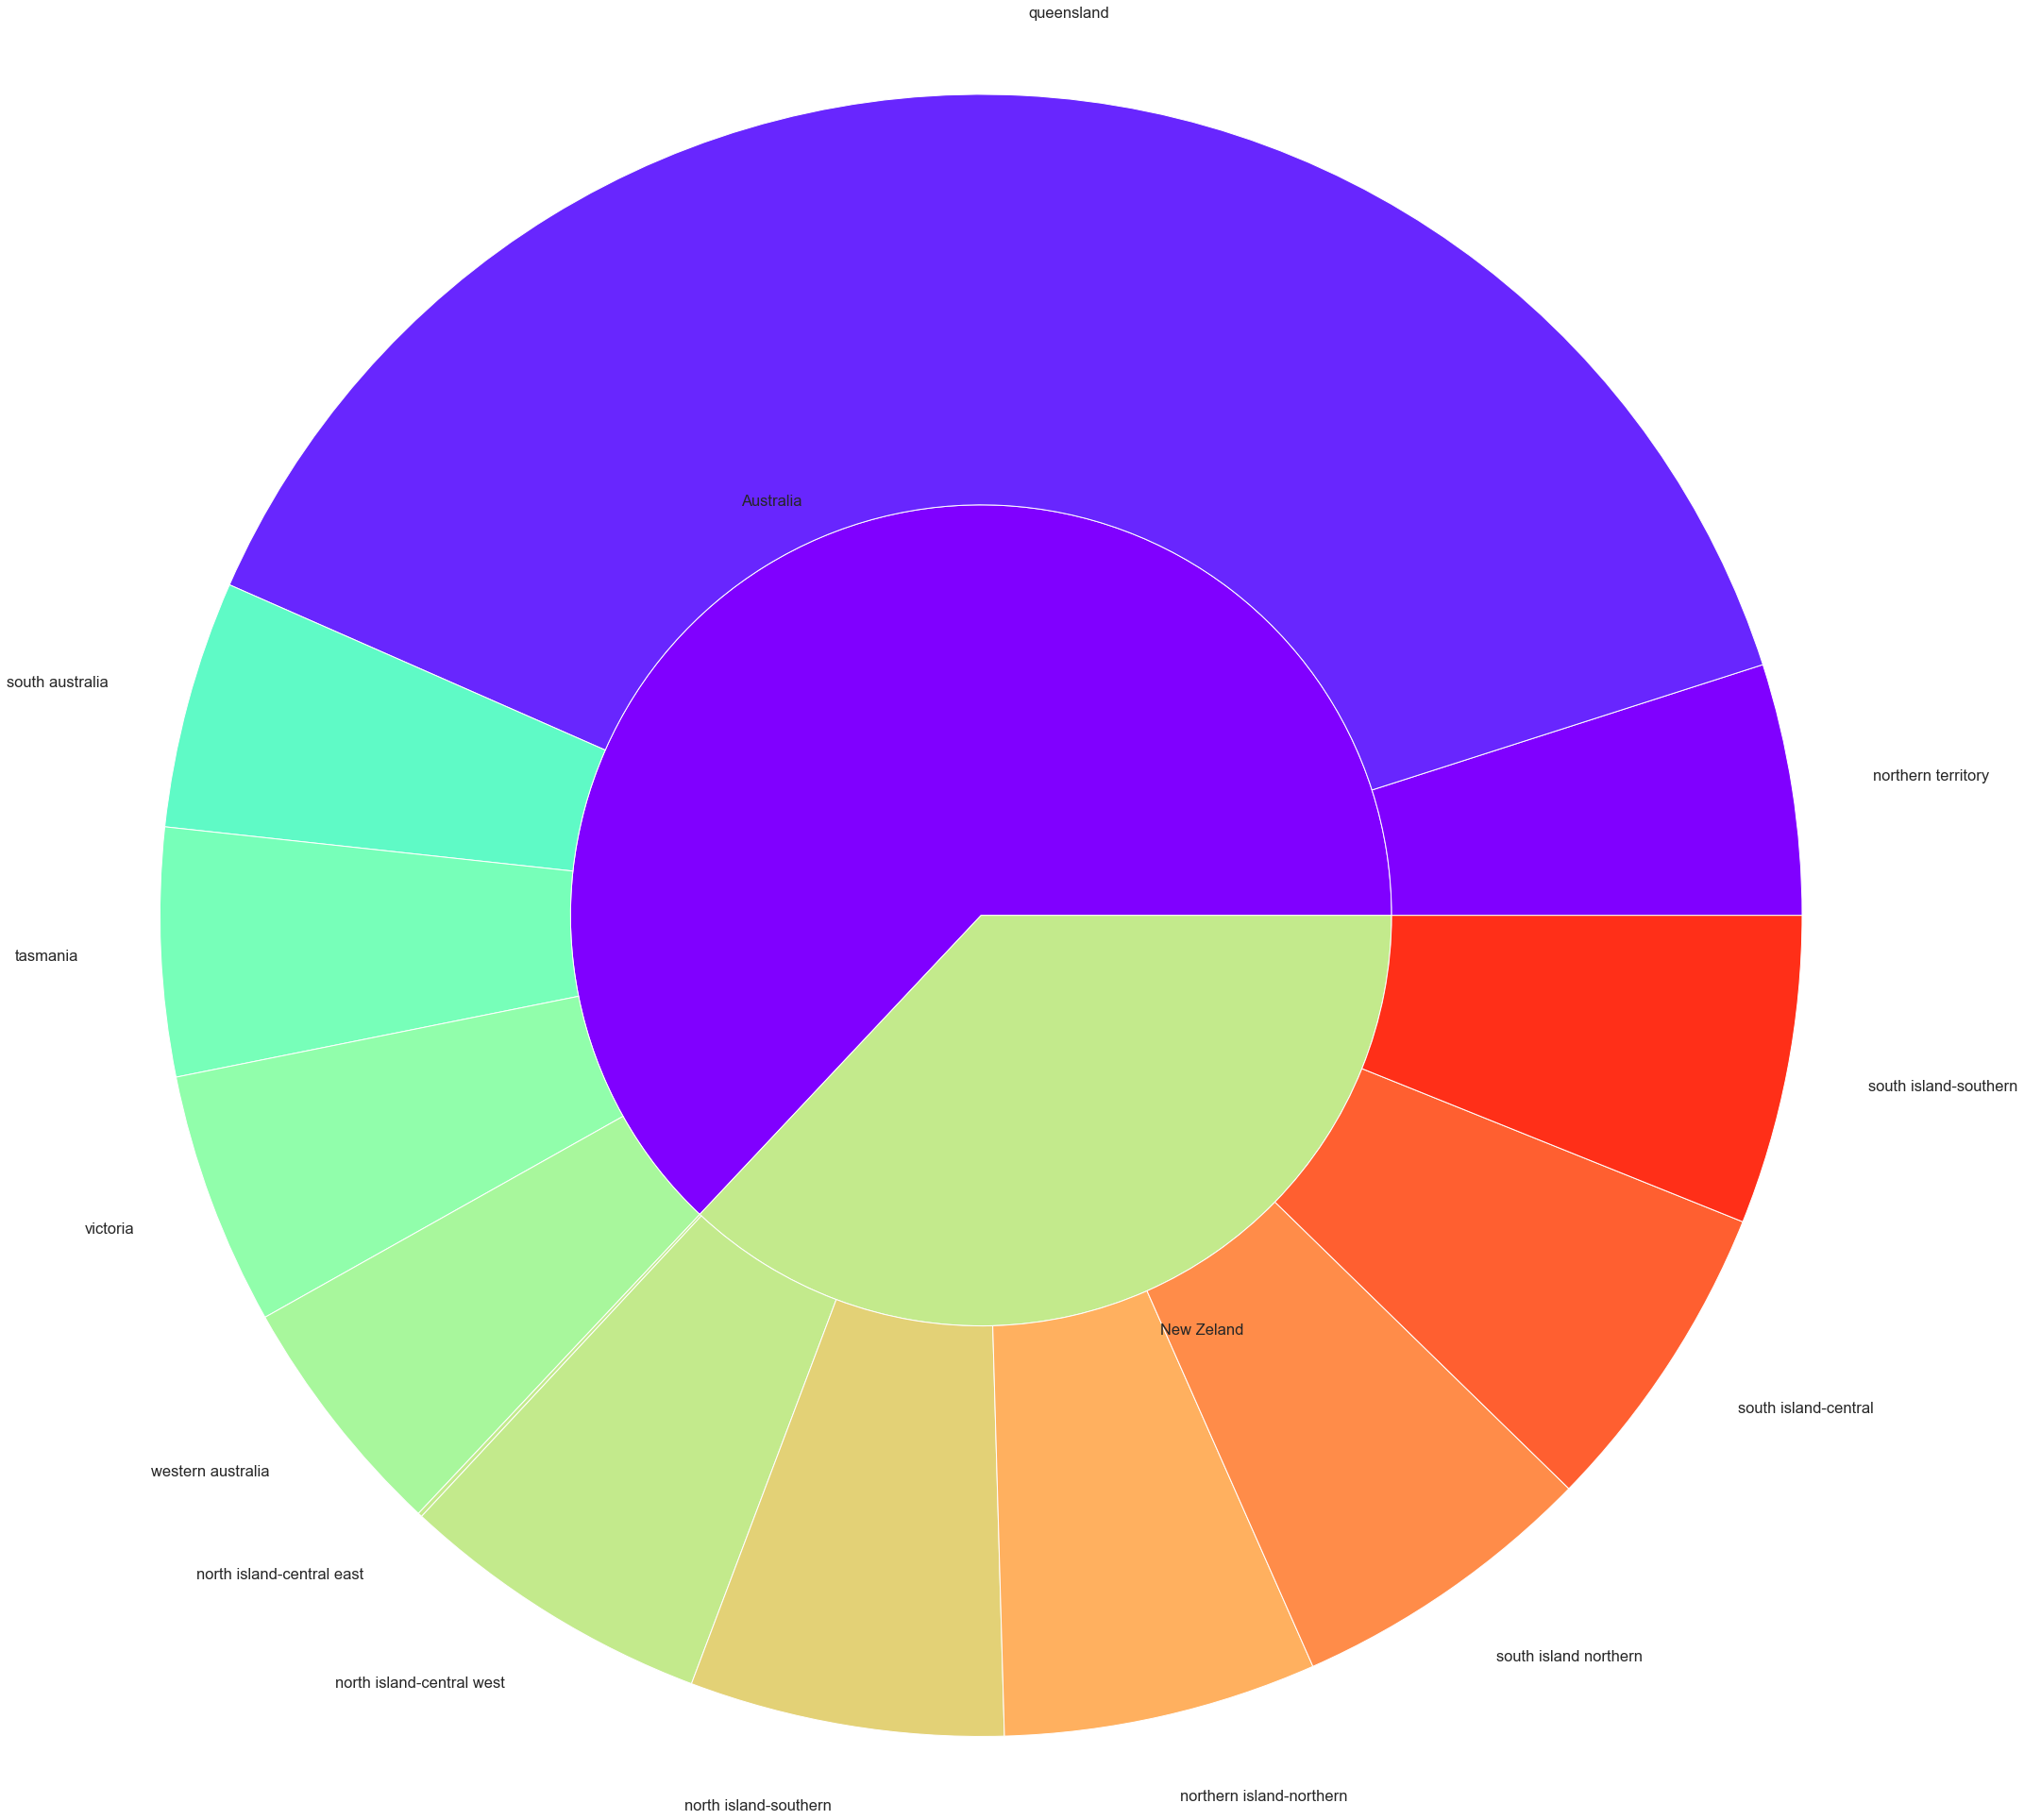

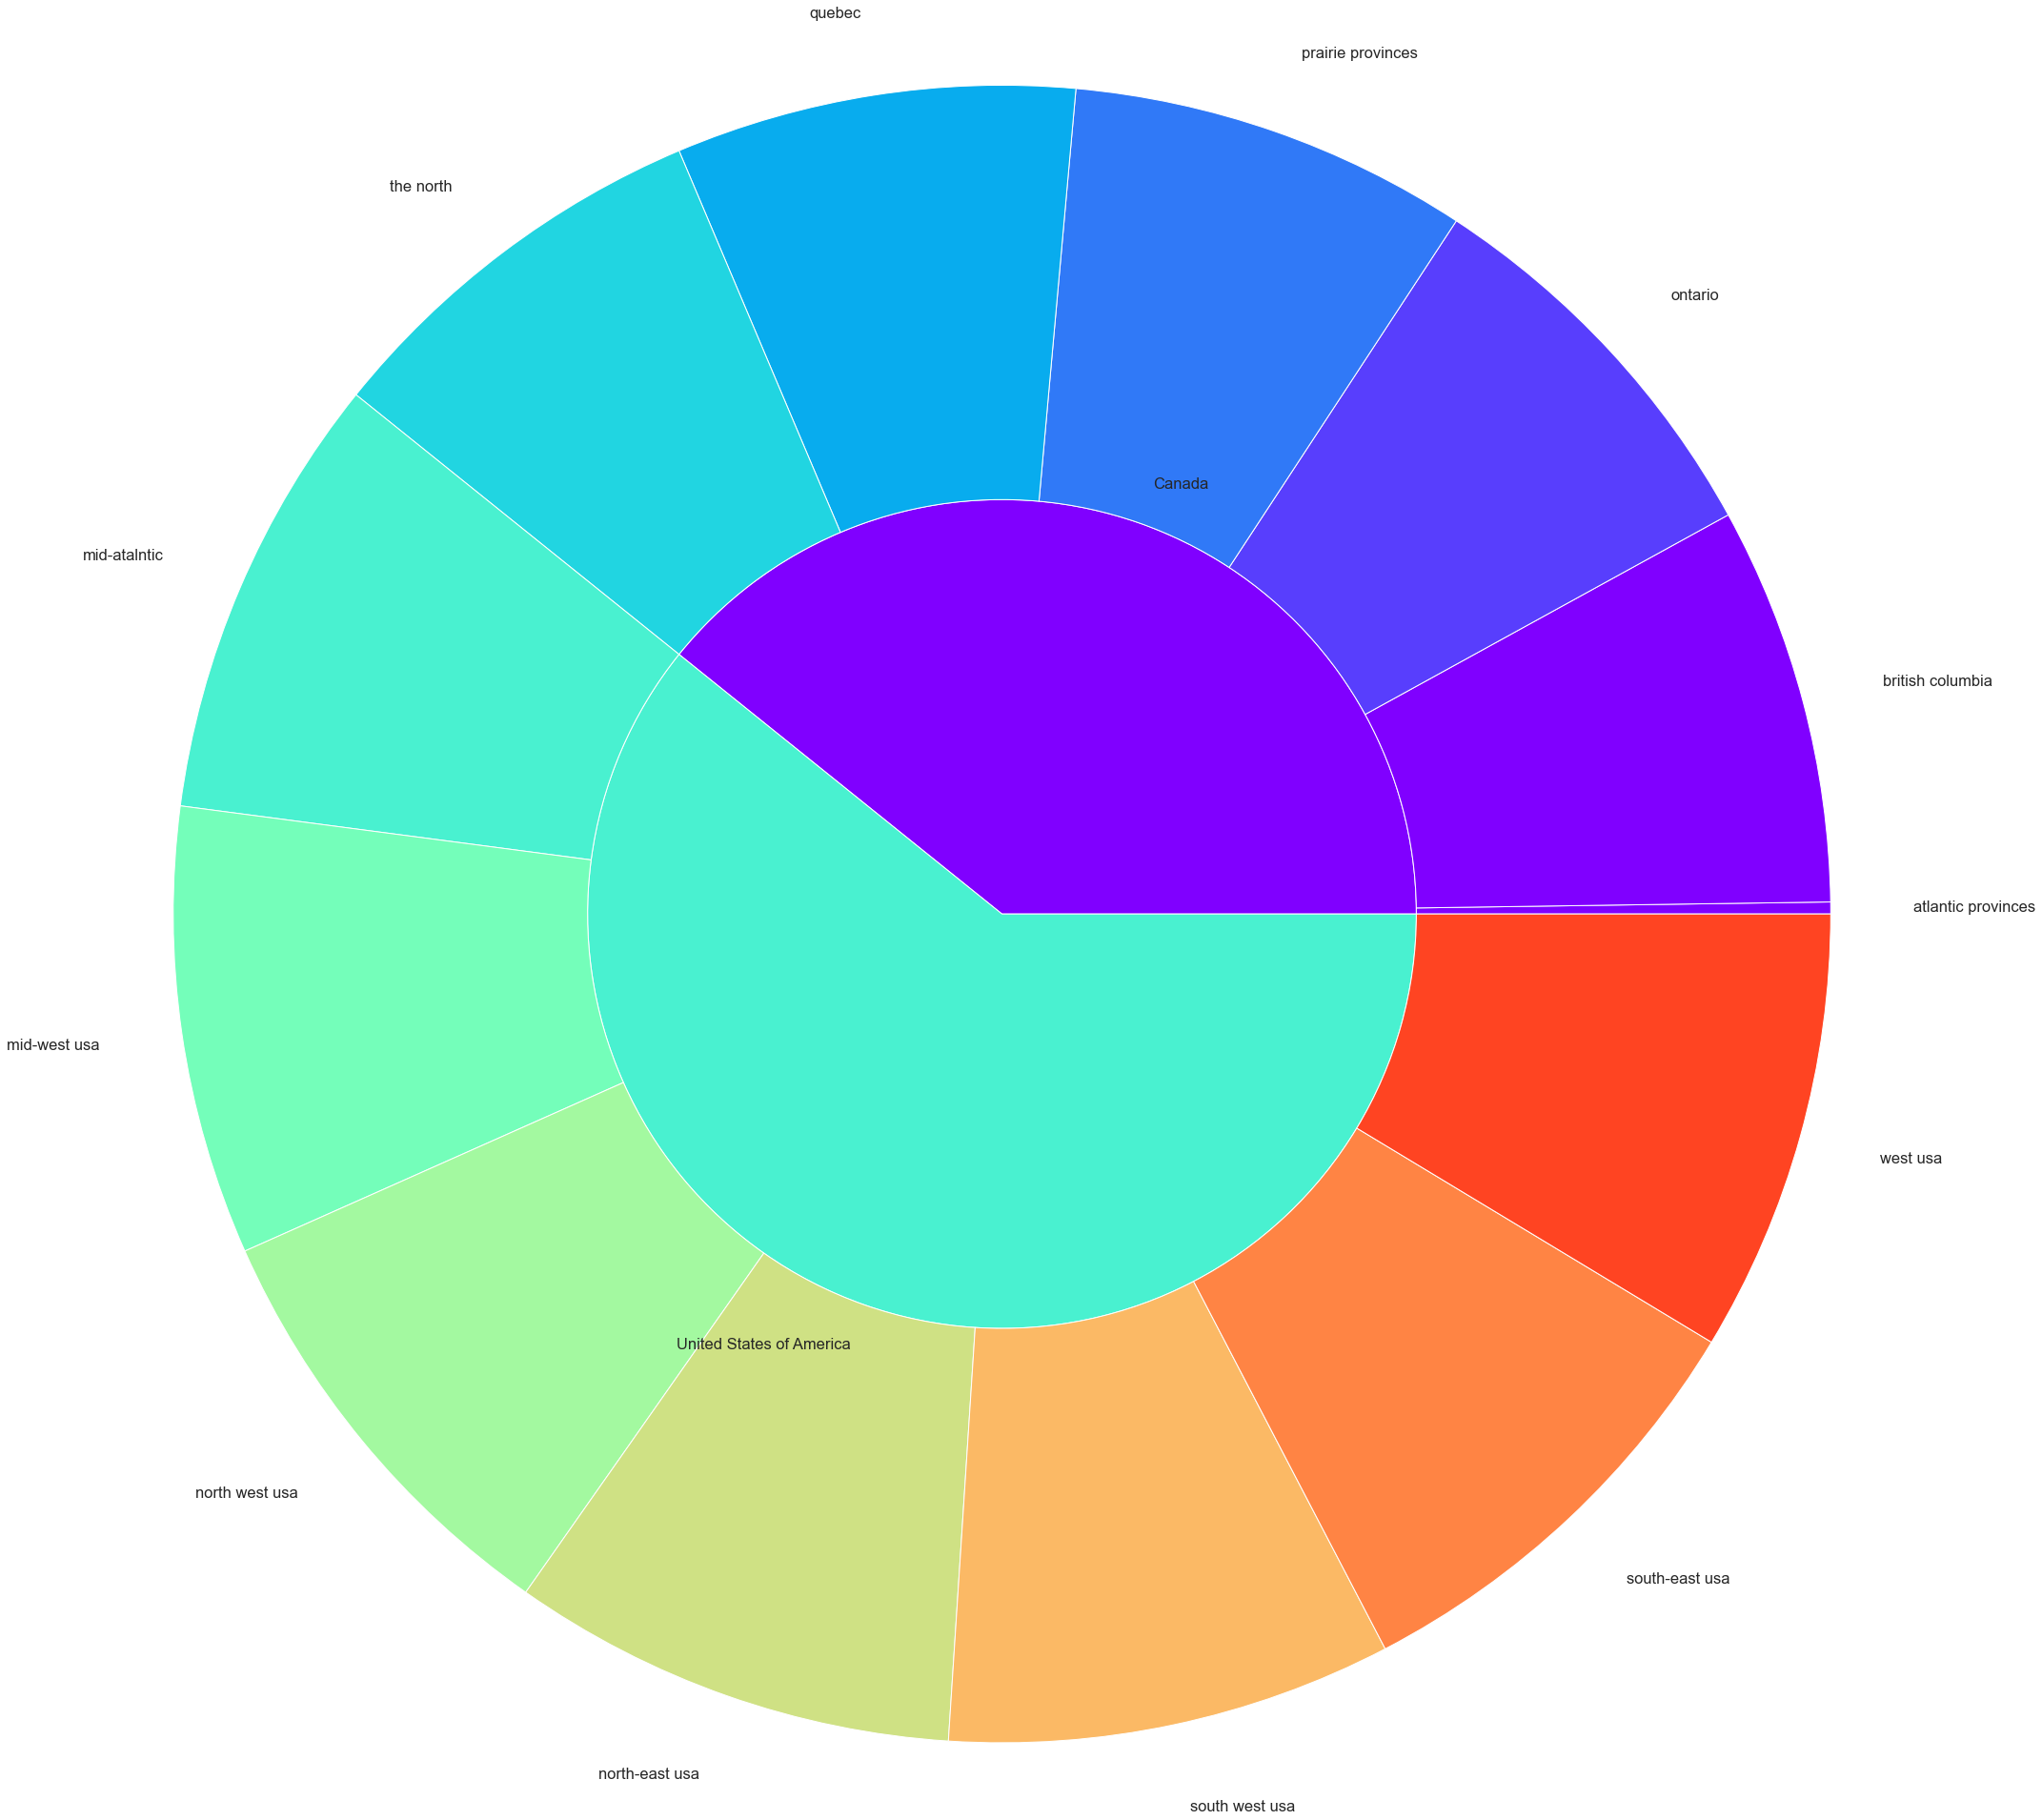

In [47]:
df=df_join
layers = ['country','region']
value = 'amount'
minimum_value = 2 # Skip values less than minimum

df['amount'] = [1 for x in range(len(df))]
city = df['region'].value_counts()
city = city[city > minimum_value]
df_big = df.loc[df['region'].isin(city.index)]   # reject small cities

def percentage_growth(l):
    s = 0
    res = [0]
    for i in range(len(l)-1):
        s += l[i]
        res.append(s / sum(l))
    return res
plt.axis("equal")

cmap = plt.get_cmap("rainbow")
df_bigOld=df_big
for x in df.continent.unique():
    df_big=df_bigOld[df_bigOld.continent==x]
    for i, layer in enumerate(layers):
        radius = i + 1
        width = 1
        frame = df_big.groupby(layers[:i+1])['amount'].sum()
        colors = cmap(percentage_growth(frame))
        labels = [x[-1] if isinstance(x, tuple) else x for x in frame.index.to_numpy()]
        plt.pie(frame, labels=labels, colors=colors, radius=radius, wedgeprops=dict(width=width, edgecolor='w'))
    plt.show()

In [41]:
# array=df_join.columns
# for focus in array:
#     if focus != 'time_code' and focus != 'year':
#         if focus == 'continent':
#             print("PLOTTING FOR: "+focus)

#             plt.style.use('ggplot')
#             tmp1=df_join.groupby(focus)[focus].count()
#             tmp1=tmp1.sort_values(ascending=False)
#             test=tmp1.index.values.tolist()


#             for x in years:
#                 tmp2=df_join[df_join['year']==x]


#                 toshow=tmp2[(tmp2[focus]==test[0])|(tmp2[focus]==test[1])|(tmp2[focus]==test[2])]
#                 tmp=toshow.groupby([toshow.month,toshow[focus]])[focus].count().sort_values(ascending=False).head(100)
#                 # print(tmp.head())
#                 monthly_sales_total = tmp.unstack().plot()


#                 plt.title('Total value of Sale over the months for the year '+str(x)+': ', fontsize='x-large')
#                 plt.xlabel('Month', fontsize='x-large')
#                 plt.ylabel('Sales', fontsize='x-large')

#                 #plt.legend(legend)
#                 plt.show()
#         elif focus == 'sales_usd':
#             print("PLOTTING FOR: "+focus)

#             plt.style.use('ggplot')
#             tmp1=df_join.groupby(focus)[focus].count()
#             tmp1=tmp1.sort_values(ascending=False)
#             test=tmp1.index.values.tolist()


#             for x in years:
#                 tmp2=df_join[df_join['year']==x]


#                 toshow=tmp2[(tmp2[focus]==test[0])|(tmp2[focus]==test[1])|(tmp2[focus]==test[2])|(tmp2[focus]==test[3])|(tmp2[focus]==test[4])]
#                 tmp=toshow.groupby([toshow.month,toshow[focus]])[focus].count().sort_values(ascending=False).head(100)
#                 # print(tmp.head())
#                 monthly_sales_total = tmp.plot()
#                 plt.title('Total value of Sale over the months for the year '+str(x)+': ', fontsize='x-large')
#                 plt.xlabel('Month', fontsize='x-large')
#                 plt.ylabel('Sales', fontsize='x-large')
#                 plt.show()
#         else:
#             print("PLOTTING FOR: "+focus)

#             plt.style.use('ggplot')
#             tmp1=df_join.groupby(focus)[focus].count()
#             tmp1=tmp1.sort_values(ascending=False)
#             test=tmp1.index.values.tolist()


#             for x in years:
#                 tmp2=df_join[df_join['year']==x]


#                 toshow=tmp2[(tmp2[focus]==test[0])|(tmp2[focus]==test[1])|(tmp2[focus]==test[2])|(tmp2[focus]==test[3])|(tmp2[focus]==test[4])]
#                 tmp=toshow.groupby([toshow.month,toshow[focus]])[focus].count().sort_values(ascending=False).head(100)
#                 # print(tmp.head())
#                 monthly_sales_total = tmp.unstack().plot()


#                 plt.title('Total value of Sale over the months for the year '+str(x)+': ', fontsize='x-large')
#                 plt.xlabel('Month', fontsize='x-large')
#                 plt.ylabel('Sales', fontsize='x-large')

#                 #plt.legend(legend)
#                 plt.show()

In [42]:
# import matplotlib.pyplot as plt
# from scipy import stats
# import seaborn as sns
# import numpy as np

# def corrdot(*args, **kwargs):
#     corr_r = args[0].corr(args[1], 'pearson')
#     corr_text = round(corr_r, 2)
#     ax = plt.gca()
#     font_size = abs(corr_r) * 80 + 5
#     ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction", ha='center', va='center', fontsize=font_size)

# def corrfunc(x, y, **kws):
#     r, p = stats.pearsonr(x, y)
#     p_stars = ''
#     if p <= 0.05:
#         p_stars = '*'
#     if p <= 0.01:
#         p_stars = '**'
#     if p <= 0.001:
#         p_stars = '***'
#     ax = plt.gca()
#     ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,color='red', fontsize=70)

# sns.set(style='white', font_scale=1.6)

# g = sns.PairGrid(df_join, aspect=1.5, diag_sharey=False, despine=False)
# g.map_lower(sns.regplot, lowess=True, ci=False,line_kws={'color': 'red', 'lw': 1},scatter_kws={'color': 'black', 's': 20})
# g.map_diag(sns.distplot, color='black',kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},hist_kws={'histtype': 'bar', 'lw': 2,'edgecolor': 'k', 'facecolor':'grey'})
# g.map_diag(sns.rugplot, color='black')
# g.map_upper(corrdot)
# g.map_upper(corrfunc)
# g.fig.subplots_adjust(wspace=0, hspace=0)

# # Remove axis labels
# for ax in g.axes.flatten():
#     ax.set_ylabel('')
#     ax.set_xlabel('')

# # Add titles to the diagonal axes/subplots
# for ax, col in zip(np.diag(g.axes), df_join.columns):
#     ax.set_title(col, y=0.82, fontsize=26)